# Precision Drell-Yan

## Initialize

In [1]:
import sys
sys.dont_write_bytecode = True
#sys.path.append(r'C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev_old\source') #old
sys.path.append(r'C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\source') #new
import DNNLikelihood

import numpy as np
from jupyterthemes import jtplot
jtplot.reset()

In [2]:
import DY_likelihood as DY_likelihood_inputs

In [3]:
WY = np.array([0.1,0.1])
delta_alphaS=np.array([0.1])
delta_SV=np.full(DY_likelihood_inputs.nnuis_SV,0.1)
delta_pdf=np.full(DY_likelihood_inputs.nnuis_pdf,0.1)
delta_Syst=np.full(DY_likelihood_inputs.nnuis_Syst,0.1)
pars = np.concatenate((WY,delta_alphaS,delta_SV,delta_pdf,delta_Syst))
pars
DY_likelihood_inputs.logpdf_DY(pars,DY_likelihood_inputs.N_obs_I)-DY_likelihood_inputs.logprior_poi_DY(pars)
#DY_likelihood_inputs.N_obs_I

-131.39261228572198

In [4]:
#print(len(range(DY_likelihood_inputs.npoi+1,DY_likelihood_inputs.npoi+DY_likelihood_inputs.nnuis_SV+1)))
#print(len(range(DY_likelihood_inputs.npoi+DY_likelihood_inputs.nnuis_SV+1,DY_likelihood_inputs.npoi+DY_likelihood_inputs.nnuis_SV+DY_likelihood_inputs.nnuis_pdf+1)))
#print(len(range(DY_likelihood_inputs.npoi+DY_likelihood_inputs.nnuis_SV+DY_likelihood_inputs.nnuis_pdf+1,DY_likelihood_inputs.npoi+DY_likelihood_inputs.nnuis_SV+DY_likelihood_inputs.nnuis_pdf+DY_likelihood_inputs.nnuis_Syst+1)))

In [6]:
#DY_likelihood_inputs.npoi+DY_likelihood_inputs.nnuis_SV+DY_likelihood_inputs.nnuis_pdf+DY_likelihood_inputs.nnuis_Syst+1==2+1+18+30+18

In [21]:
#DY_likelihood_inputs.logprior_alphaS(delta_alphaS[0])

In [22]:
#DY_likelihood_inputs.logprior_pdf(delta_pdf)

In [24]:
#DY_likelihood_inputs.logprior_SV_uniform(delta_SV)

In [25]:
#DY_likelihood_inputs.logprior_Syst(delta_Syst)

In [26]:
#DY_likelihood_inputs.logpdf_DY(pars,)

## Likelihood object

In [4]:
likelihood = DNNLikelihood.Lik(name = DY_likelihood_inputs.name,
                               logpdf = DY_likelihood_inputs.logpdf,
                               logpdf_args = DY_likelihood_inputs.logpdf_args,
                               pars_central = DY_likelihood_inputs.pars_central,
                               pars_pos_poi = DY_likelihood_inputs.pars_pos_poi,
                               pars_pos_nuis = DY_likelihood_inputs.pars_pos_nuis,
                               pars_labels = DY_likelihood_inputs.pars_labels,
                               pars_bounds = DY_likelihood_inputs.pars_bounds,
                               output_folder = DY_likelihood_inputs.output_folder)

Likelihood object saved to file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Likelihood\DY_likelihood.h5 in 0.03759770000000273 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Likelihood\DY_likelihood.log saved in 0.0011340999999980284 s.


C:\Users\Admin\Anaconda3\envs\TensorFlow2-GPU\lib\site-packages\deepdish\io\hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


In [5]:
#likelihood = DNNLikelihood.Lik(input_file=r"C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Likelihood\DY_likelihood")

In [5]:
likelihood.logpdf(likelihood.pars_central)

-135.65286026482337

In [6]:
likelihood.logpdf_fn(likelihood.pars_central,*likelihood.logpdf.args,*likelihood.logpdf.kwargs)

-135.65286026482337

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Likelihood\figures\DY_likelihood_figure_par_0.pdf.


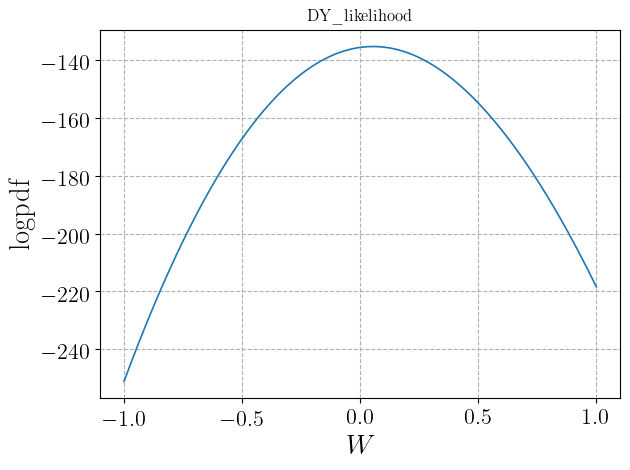

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Likelihood\figures\DY_likelihood_figure_par_1.pdf.


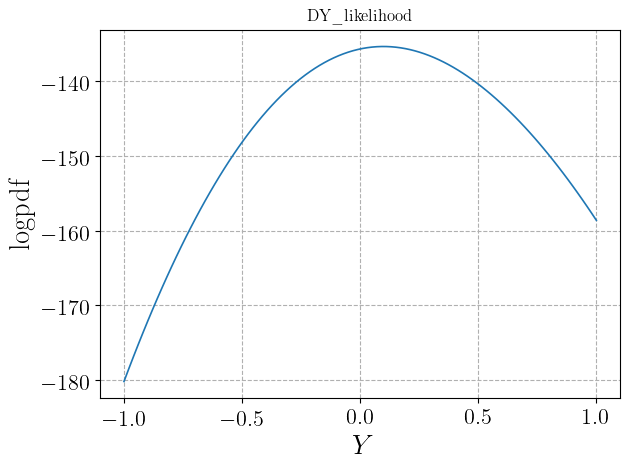

Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Likelihood\DY_likelihood.log updated in 0.0008903000000017869 s.


In [7]:
likelihood.plot_logpdf_par([[0,-1,1],[1,-1,1]],show_plot=True,overwrite=True)

In [8]:
likelihood.compute_maximum_logpdf(optimizer={"name": "scipy",
                                             "method": "Powell",
                                             "options": {"maxiter": 1000000,
                                                         "ftol": 0.00001}},
                                  force=True)
print(likelihood.logpdf_max["x"])
print(likelihood.logpdf_max["y"])

Maximum logpdf computed in 5.9606575999999905 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Likelihood\DY_likelihood.log updated in 0.0009658999999970774 s.
[ 9.05630605e-02  4.93276001e-02  6.98599076e-03 -9.80710709e-02
  2.08963709e-01  9.13645274e-02  4.77240713e-01  2.41406476e-02
  3.44957235e-01  5.06162327e-01 -6.71534492e-01  5.47325843e-01
  3.80392383e-01  6.40944149e-01 -1.01991772e-01 -4.67837195e-01
  5.67627465e-01 -6.01257541e-01 -3.64977428e-01  4.37081627e-01
 -3.34999758e-01  3.42885718e-02 -3.32534385e-02  2.99472117e-05
 -3.65002133e-02 -2.01271798e-02  3.96143394e-02 -8.54583232e-04
 -8.47824590e-03 -7.28342577e-03  1.83580451e-03  9.55858688e-03
 -1.69056698e-02  8.98430000e-03  1.19975729e-02 -1.87333817e-02
  8.29550662e-03  1.27870222e-02 -9.43827034e-03 -1.16948761e-02
 -7.10575804e-03  2.55429773e-03  8.97599194e-03 -2.34468406e-04
  2.67988761e-02 -6.22499613e-03  4.98516888e-0

In [9]:
likelihood.compute_maximum_logpdf(#pars_init = np.array([0.140939,-0.313946,-0.143445,-0.138227,0.59768,-0.286997,0.420411,0.449076,-0.130144,-0.0076716,-0.8774,-0.0593335,0.501207,0.302369,-0.0645044,0.350081,0.628708,0.567224,-0.264509,-0.531411,0.0847361,-0.0448937,-0.0496219,-0.000631942,0.000277163,0.00368429,-0.0209165,-0.00107792,0.0226095,0.0178477,-0.00281267,-0.0169268,0.01748,-0.00908985,-0.00955686,0.00514135,0.0243577,0.0211568]),
                                  optimizer={"name": "scipy",
                                             "method": "Powell",
                                             "options": {"maxiter": 1000000,
                                                         "ftol": 0.00001}},
                                  force=True)
print(likelihood.logpdf_max["x"])
print(likelihood.logpdf_max["y"])

Maximum logpdf computed in 5.9751136 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Likelihood\DY_likelihood.log updated in 0.0007530999999971755 s.
[ 9.05630605e-02  4.93276001e-02  6.98599076e-03 -9.80710709e-02
  2.08963709e-01  9.13645274e-02  4.77240713e-01  2.41406476e-02
  3.44957235e-01  5.06162327e-01 -6.71534492e-01  5.47325843e-01
  3.80392383e-01  6.40944149e-01 -1.01991772e-01 -4.67837195e-01
  5.67627465e-01 -6.01257541e-01 -3.64977428e-01  4.37081627e-01
 -3.34999758e-01  3.42885718e-02 -3.32534385e-02  2.99472117e-05
 -3.65002133e-02 -2.01271798e-02  3.96143394e-02 -8.54583232e-04
 -8.47824590e-03 -7.28342577e-03  1.83580451e-03  9.55858688e-03
 -1.69056698e-02  8.98430000e-03  1.19975729e-02 -1.87333817e-02
  8.29550662e-03  1.27870222e-02 -9.43827034e-03 -1.16948761e-02
 -7.10575804e-03  2.55429773e-03  8.97599194e-03 -2.34468406e-04
  2.67988761e-02 -6.22499613e-03  4.98516888e-03 -4.8580

In [12]:
likelihood.logpdf_max["y"]-10

-141.72081676402286

In [13]:
likelihood.compute_profiled_maxima_logpdf(pars=[0,1],pars_ranges=[[-1,1,30],[-1,1,30]],spacing="random",progressbar=True,verbose=2)
print(likelihood.logpdf_profiled_max["X"])
print(likelihood.logpdf_profiled_max["Y"])

FloatProgress(value=0.0, layout=Layout(height='14px', margin='-5px 0px -20px 0px', padding='0px', width='500px…

Total number of points: 900 .


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\scipy\optimize\optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\DY_likelihood.py:125: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(smooth_uniform(delta_SV,min_SV,max_SV,smooth_factor_SV)))
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\scipy\optimize\optimize.py:2371: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Likelihood\DY_likelihood.log updated in 0.0013474999996105907 s.
Log-pdf values lie in the range [ -207.0049308577154 , -131.73096996987394 ]
900 local maxima computed in 8230.173409800002 s.
[[-0.00845119 -0.95223776 -0.53666391 ... -0.06850502 -0.01745851
  -0.01272265]
 [ 0.79611472 -0.95223776  0.02483384 ... -0.04978634 -0.01583938
  -0.01512496]
 [-0.64248928 -0.95223776 -0.7868902  ... -0.10805488 -0.03317998
  -0.01816093]
 ...
 [ 0.99138529  0.97772199  0.53524466 ...  0.03380773  0.00540328
  -0.01528505]
 [ 0.98499064  0.97772199  0.53447748 ...  0.03400969  0.00565966
  -0.01509839]
 [ 0.72109964  0.97772199  0.53463068 ...  0.03695591  0.01324607
  -0.00867752]]
[-146.24071397803155 -135.48422167883442 -172.0827136941085
 -136.09809231768372 -160.29311221362647 -167.07188905781152
 -137.9133972894965 -160.88263447766374 -142.81939032006918
 -169.70324

In [18]:
len(likelihood.logpdf_profiled_max["Y"][likelihood.logpdf_profiled_max["Y"]>likelihood.logpdf_max["y"]-15])

591

In [19]:
X = likelihood.logpdf_profiled_max["X"][likelihood.logpdf_profiled_max["Y"]>likelihood.logpdf_max["y"]-15][0:200]
Y = likelihood.logpdf_profiled_max["Y"][likelihood.logpdf_profiled_max["Y"]>likelihood.logpdf_max["y"]-15][0:200]

In [21]:
likelihood.logpdf_profiled_max["X"] = X
likelihood.logpdf_profiled_max["Y"] = Y

In [22]:
likelihood.save_script()

Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Likelihood\DY_likelihood.log updated in 0.0008823000007396331 s.
File C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Likelihood\DY_likelihood_script.py correctly generated.


In [23]:
likelihood.save(overwrite=True)

Likelihood object saved to file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Likelihood\DY_likelihood.h5 in 0.04035219999968831 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Likelihood\DY_likelihood.log updated in 0.001164900000730995 s.


C:\Users\Admin\Anaconda3\envs\TensorFlow2-GPU\lib\site-packages\deepdish\io\hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


## Sampling

### Initialize Sampler from "likelihood_script_file"

In [24]:
sampler = DNNLikelihood.Sampler(new_sampler=True,
                                likelihood_script_file=r"C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Likelihood\DY_likelihood_script",#None,#
                                likelihood=None,#lik,#
                                nsteps_required=200000,
                                moves_str="emcee.moves.StretchMove(1.3)",
                                parallel_CPU=True,
                                vectorize=False,
                                output_folder="Sampler",
                                input_file=None,
                                verbose=1)

Likelihood object loaded in 0.027370400001018425 .
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Likelihood\DY_likelihood.log updated in 0.0012520000000222353 s.
Initialize backend in file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler_backend.h5 .
Number of available steps: 0. .
Created backend C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler_backend.h5 for chains DY_sampler in 0.29700899999988906 s.
Sampler object saved to file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.h5 in 0.005481399999553105 s.
Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.log saved in 0.0011088000010204269 s.


In [16]:
sampler.nsteps_required=200000

In [25]:
sampler.run_sampler(verbose=2)

Initial number of steps: 0 .
Running 44 parallel processes.


100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [2:01:17<00:00, 27.48it/s]


Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.log updated in 0.00105989999792655 s.
Done in 7295.592725600001 seconds.
Final number of steps: 200000. .


In [26]:
sampler.sampler.acceptance_fraction

array([0.375725, 0.37561 , 0.37564 , 0.375665, 0.37684 , 0.37668 ,
       0.376955, 0.3746  , 0.376525, 0.376675, 0.375875, 0.37548 ,
       0.37616 , 0.375505, 0.37744 , 0.378455, 0.377075, 0.37719 ,
       0.379715, 0.373405, 0.378035, 0.376915, 0.37501 , 0.375935,
       0.374295, 0.37604 , 0.376535, 0.37521 , 0.374225, 0.375365,
       0.3782  , 0.377685, 0.376735, 0.37445 , 0.37695 , 0.37352 ,
       0.37585 , 0.376385, 0.37466 , 0.375855, 0.375085, 0.37775 ,
       0.37649 , 0.374795, 0.374245, 0.374935, 0.377545, 0.37599 ,
       0.37458 , 0.375525, 0.37469 , 0.37586 , 0.375245, 0.376445,
       0.37475 , 0.37746 , 0.37689 , 0.376055, 0.373485, 0.376505,
       0.375715, 0.374585, 0.376535, 0.37649 , 0.374645, 0.374485,
       0.37502 , 0.3754  , 0.376885, 0.37499 , 0.376185, 0.37705 ,
       0.375745, 0.37681 , 0.37505 , 0.373035, 0.377615, 0.376175,
       0.37459 , 0.373785, 0.37563 , 0.37544 , 0.37641 , 0.37417 ,
       0.375275, 0.37803 , 0.377385, 0.376505, 0.37369 , 0.375

In [3]:
sampler = DNNLikelihood.Sampler(new_sampler=False,
                                likelihood_script_file=None,#"outfiles/ATLAS_sbottom_search_92_region_A_patch_sbottom_1400_450_60_likelihood_script",
                                likelihood=None,#lik,#
                                nsteps_required=100000,
                                moves_str="emcee.moves.StretchMove(1.3)",
                                parallel_CPU=True,
                                vectorize=False,
                                input_file=r"C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler",
                                verbose=1)

Sampler object loaded in 0.013566799999999546 .
Likelihood object loaded in 0.12409460000000117 .
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Likelihood\DY_likelihood.log updated in 0.0016876000000003444 s.
Initialize backend from file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler_backend.h5 .
Number of available steps: 100000. .
Loaded backend C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler_backend.h5 for chains DY_sampler in 0.04518930000000054 s.
Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.log updated in 0.002684000000002129 s.


In [47]:
sampler.nsteps_required = 200000

In [48]:
sampler.run_sampler()

  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]

Initial number of steps: 100000 .
Running 44 parallel processes.


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:22:17<00:00, 20.25it/s]


Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.log updated in 0.0027130000016768463 s.
Done in 4938.2227176000015 seconds.
Final number of steps: 200000. .


In [27]:
sampler.gelman_rubin(pars=[0,1],nsteps=[500,1000,5000,10000,50000,100000,200000])

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.log updated in 0.0017634999239817262 s.
Gelman-Rubin statistics for parameters [0 1] computed in 572.7018173999386 s.


array([[0.00000000e+00, 5.00000000e+02, 1.83981125e+00, 3.40491853e-01,
        1.01068855e-01],
       [0.00000000e+00, 1.00000000e+03, 1.59206920e+00, 2.70901576e-01,
        1.07262924e-01],
       [0.00000000e+00, 5.00000000e+03, 1.15750474e+00, 1.37373299e-01,
        1.02669864e-01],
       [0.00000000e+00, 1.00000000e+04, 1.07791583e+00, 1.08216052e-01,
        9.32127567e-02],
       [0.00000000e+00, 5.00000000e+04, 1.01482567e+00, 8.19046144e-02,
        7.95406552e-02],
       [0.00000000e+00, 1.00000000e+05, 1.00715875e+00, 7.83119794e-02,
        7.72081031e-02],
       [0.00000000e+00, 2.00000000e+05, 1.00342376e+00, 7.61721588e-02,
        7.56554024e-02],
       [1.00000000e+00, 5.00000000e+02, 1.87826138e+00, 6.13275269e-01,
        1.74809645e-01],
       [1.00000000e+00, 1.00000000e+03, 1.67861835e+00, 5.68881926e-01,
        2.02755157e-01],
       [1.00000000e+00, 5.00000000e+03, 1.16878287e+00, 3.48504449e-01,
        2.55418929e-01],
       [1.00000000e+00, 1.0000

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.log updated in 0.0016117999330163002 s.
Gelman-Rubin statistics for parameters [0] computed in 409.83635470003355 s.
Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_GR_Rc_0.pdf.


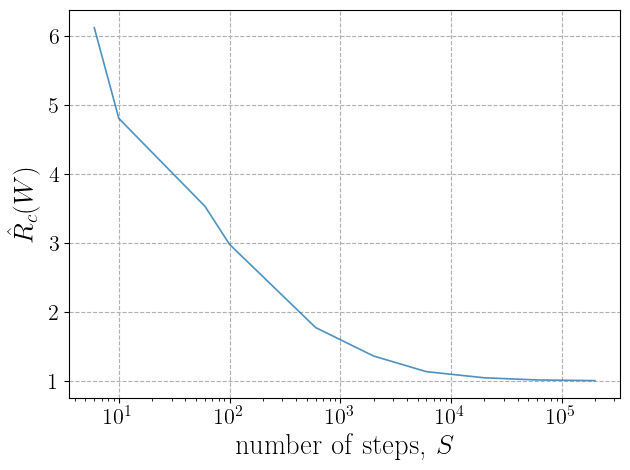

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_GR_sqrtVhat_0.pdf.


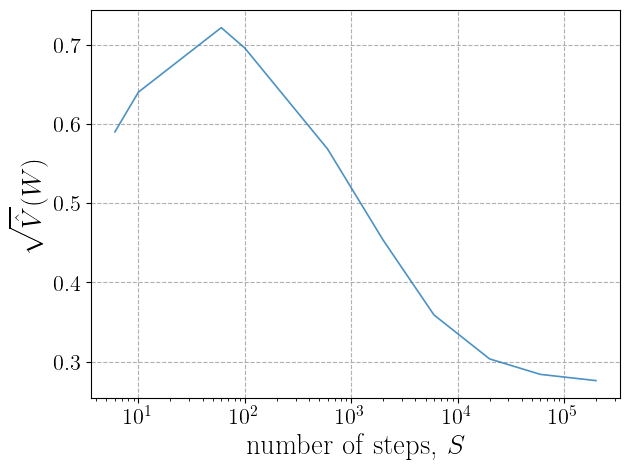

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_GR_sqrtW_0.pdf.


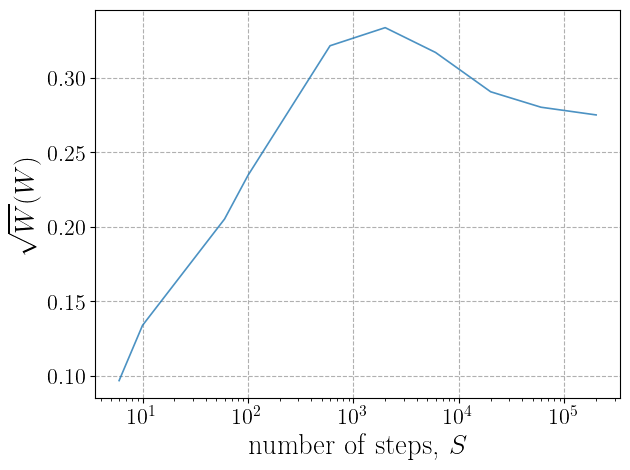

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.log updated in 0.0017433000029996037 s.
Gelman-Rubin statistics for parameters [1] computed in 417.0639220000012 s.
Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_GR_Rc_1.pdf.


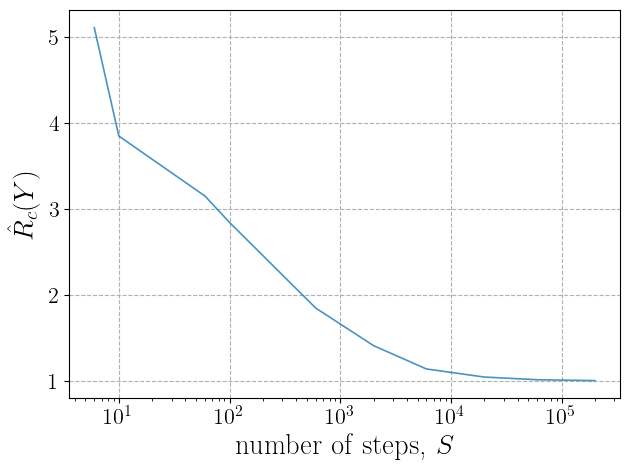

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_GR_sqrtVhat_1.pdf.


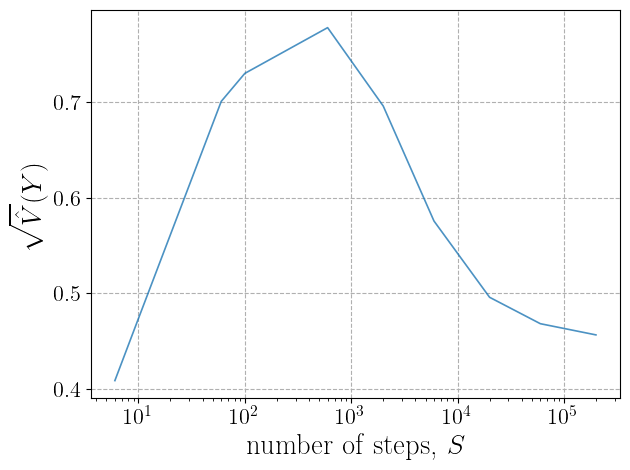

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_GR_sqrtW_1.pdf.


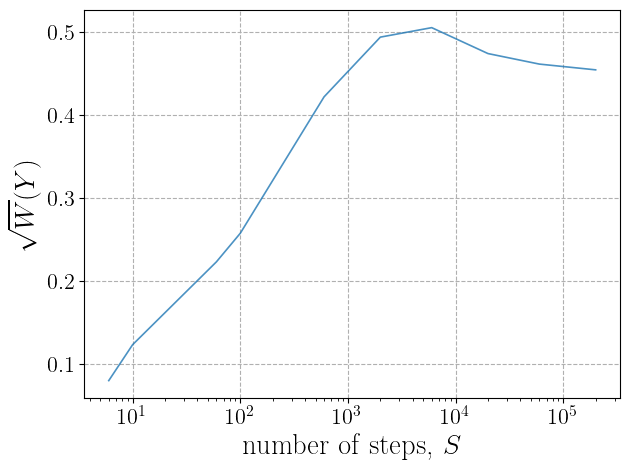

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.log updated in 0.0022421999601647258 s.
Gelman-Rubin statistics for parameters [2] computed in 427.18628080002964 s.
Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_GR_Rc_2.pdf.


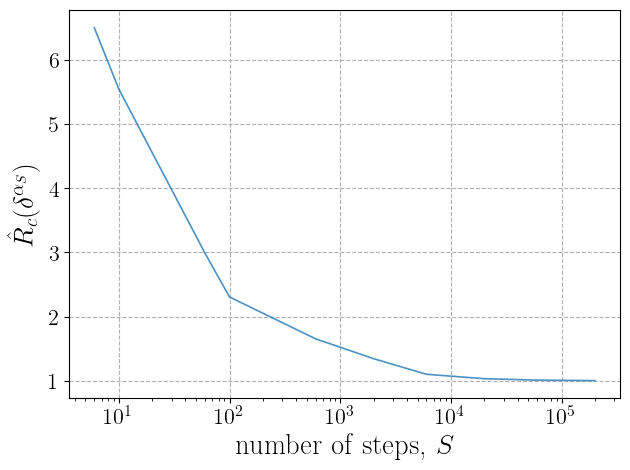

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_GR_sqrtVhat_2.pdf.


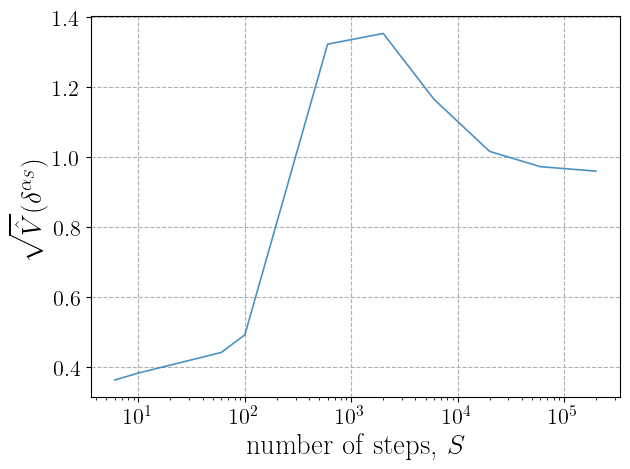

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_GR_sqrtW_2.pdf.


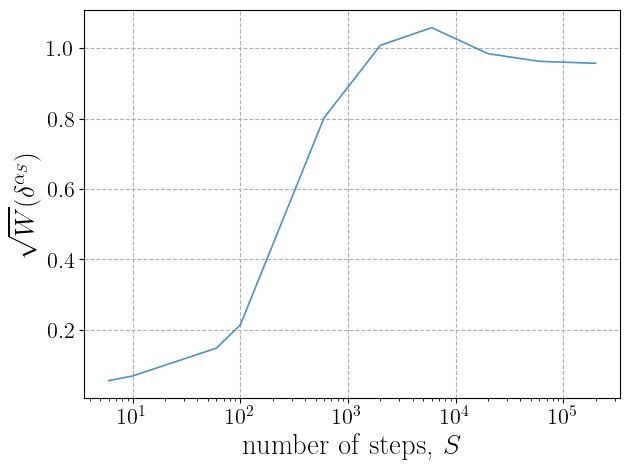

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.log updated in 0.0034606000408530235 s.
Gelman-Rubin statistics for parameters [3] computed in 418.5276278000092 s.
Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_GR_Rc_3.pdf.


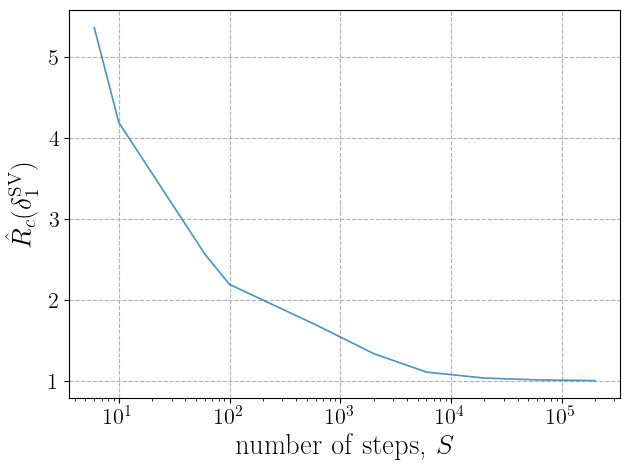

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_GR_sqrtVhat_3.pdf.


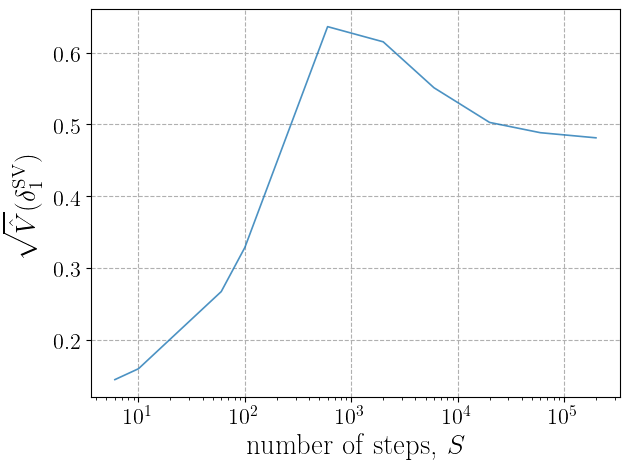

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_GR_sqrtW_3.pdf.


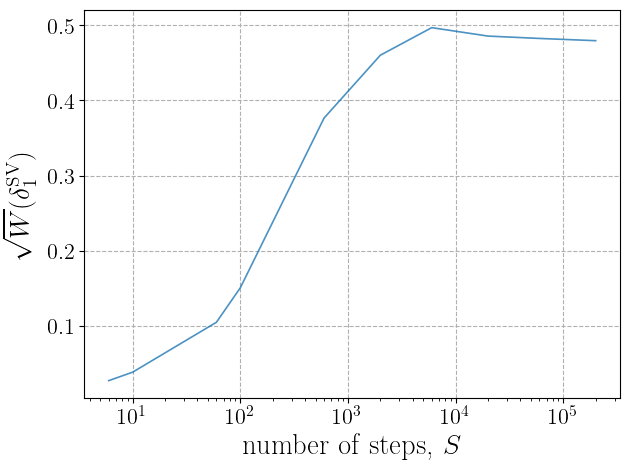

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.log updated in 0.0026144998846575618 s.
Gelman-Rubin statistics for parameters [20] computed in 415.41187900002114 s.
Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_GR_Rc_20.pdf.


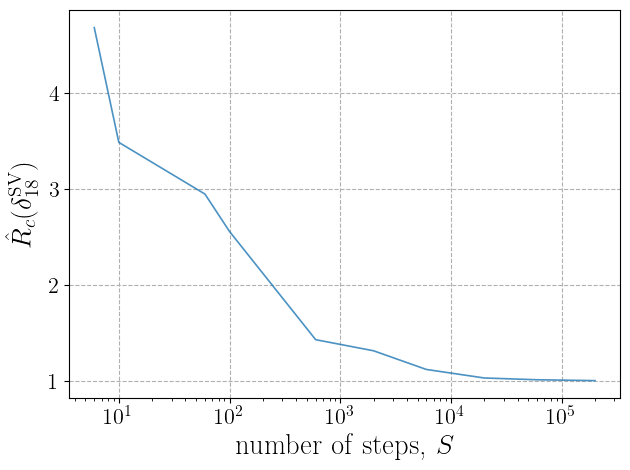

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_GR_sqrtVhat_20.pdf.


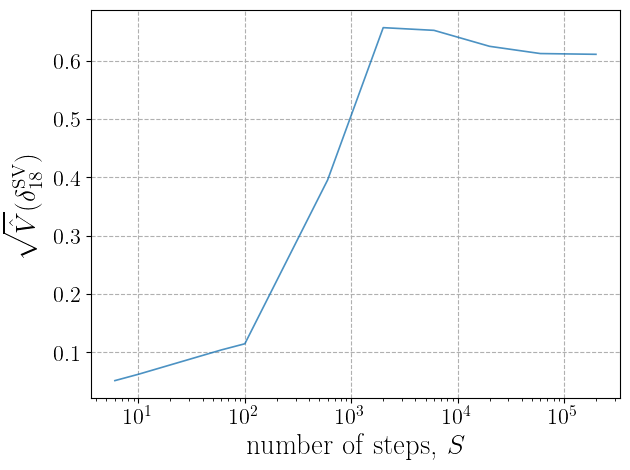

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_GR_sqrtW_20.pdf.


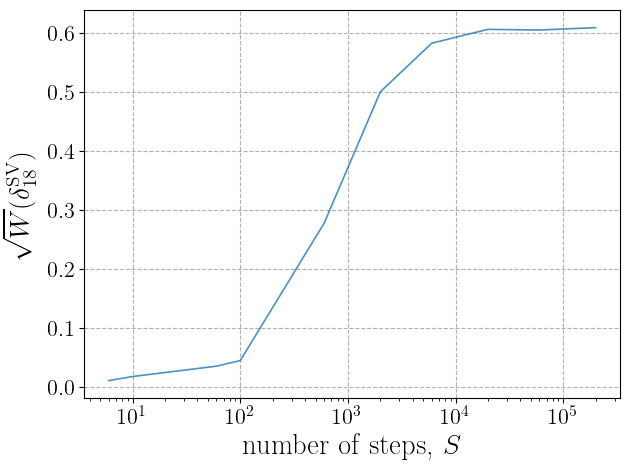

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.log updated in 0.0036612999392673373 s.


In [28]:
sampler.plot_gelman_rubin(pars=[0,1,2,3,20], npoints=10, show_plot=True)

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_distr_0.pdf.


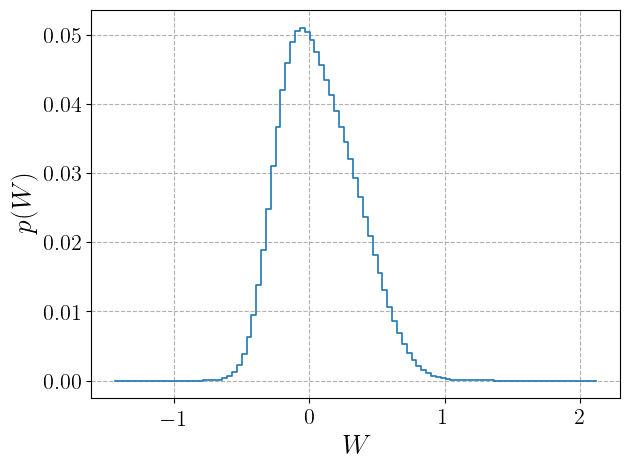

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_distr_1.pdf.


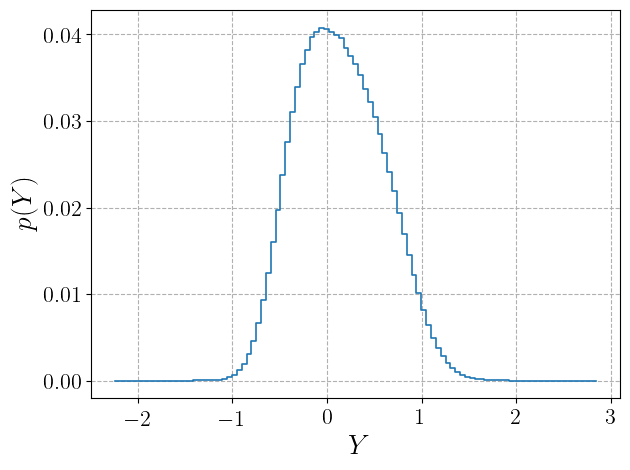

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_distr_2.pdf.


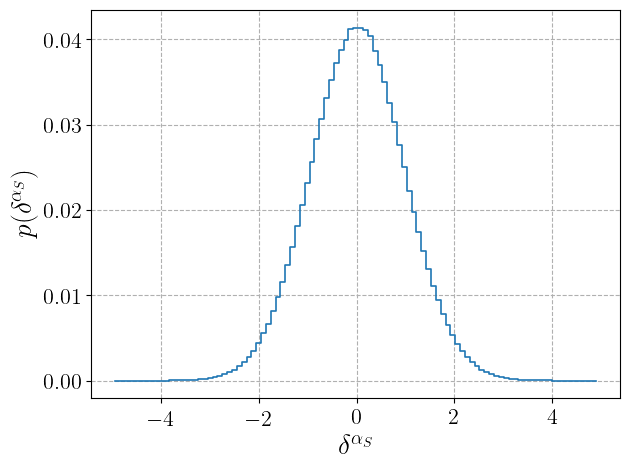

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_distr_3.pdf.


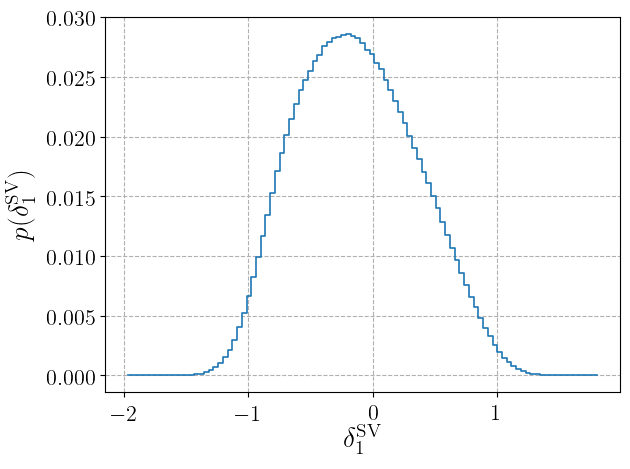

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_distr_20.pdf.


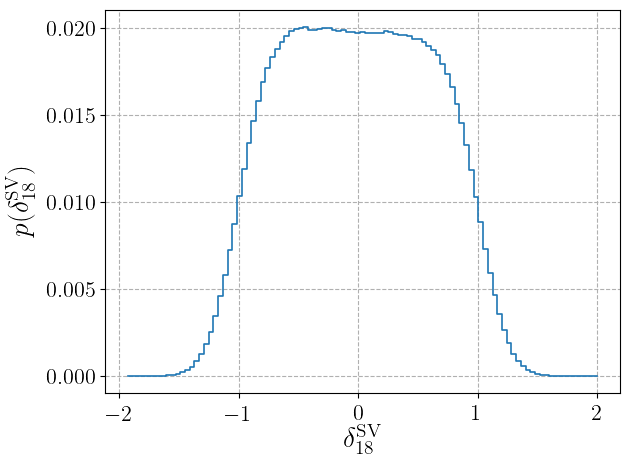

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.log updated in 0.0038613000651821494 s.


In [29]:
sampler.plot_dist(pars=[0,1,2,3,20],show_plot=True)

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_autocorr_0.pdf.


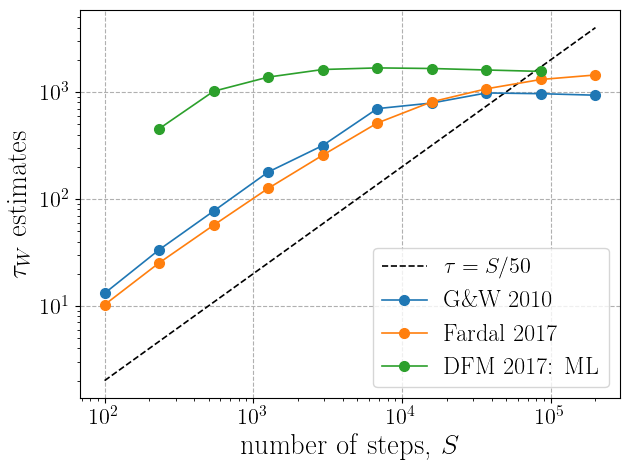

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_autocorr_1.pdf.


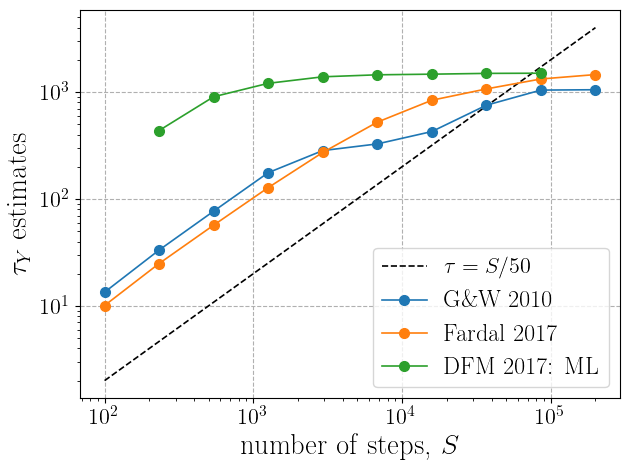

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_autocorr_2.pdf.


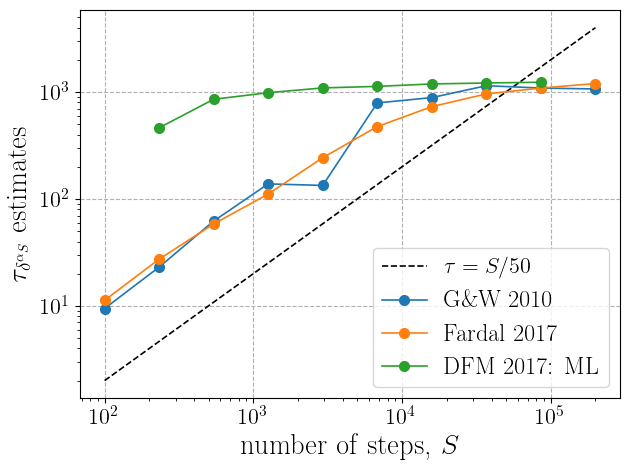

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_autocorr_3.pdf.


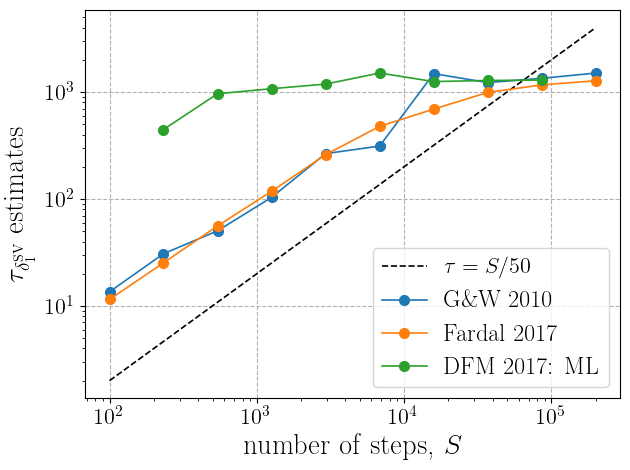

Bounds ( -5.0 , 5.0 ) delivered non-finite log-prior. Increasing bound to ( -10.0 , 10.0 ) and retrying.
Succeeded with bounds ( -10.0 , 10.0 ).
Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_autocorr_20.pdf.


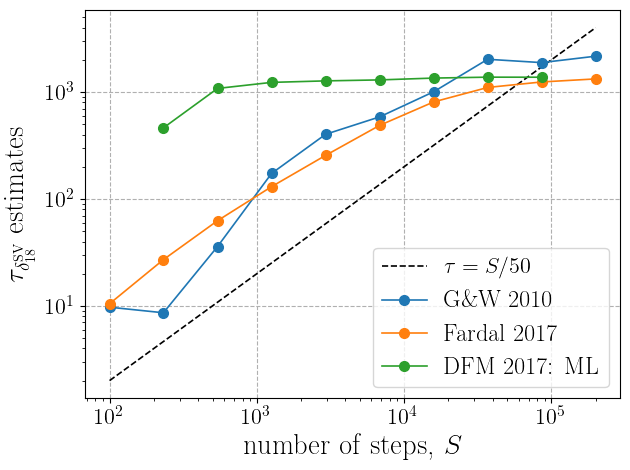

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.log updated in 0.004581799963489175 s.


In [30]:
sampler.plot_autocorr(pars=[0,1,2,3,20],show_plot=True)

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_chains_0.pdf.


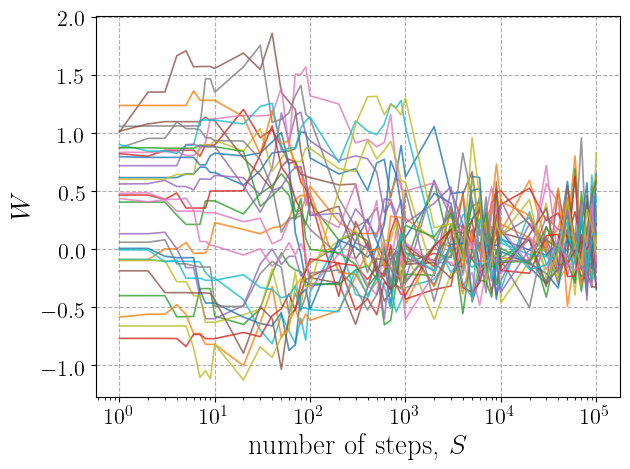

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_chains_1.pdf.


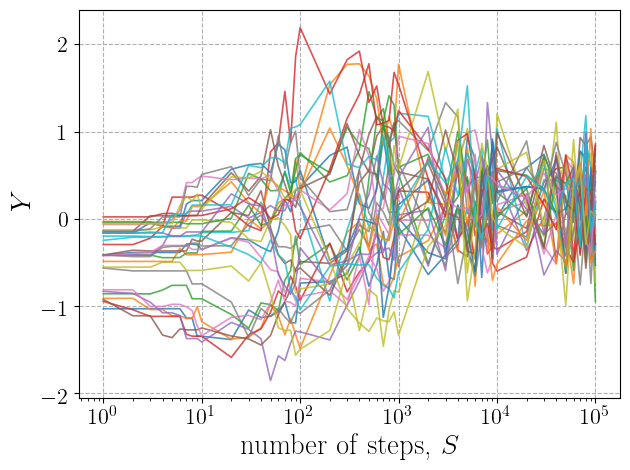

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_chains_2.pdf.


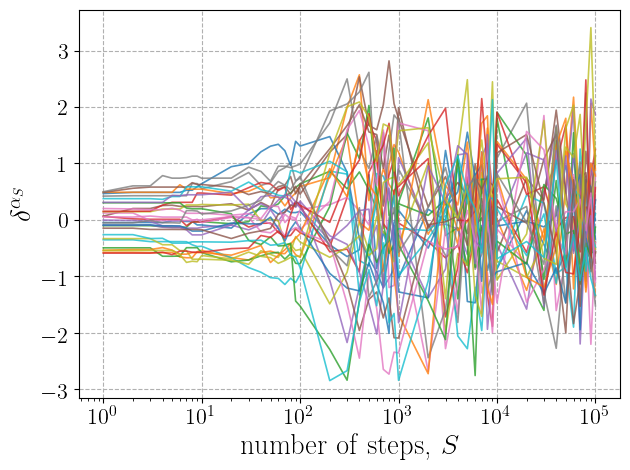

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_chains_3.pdf.


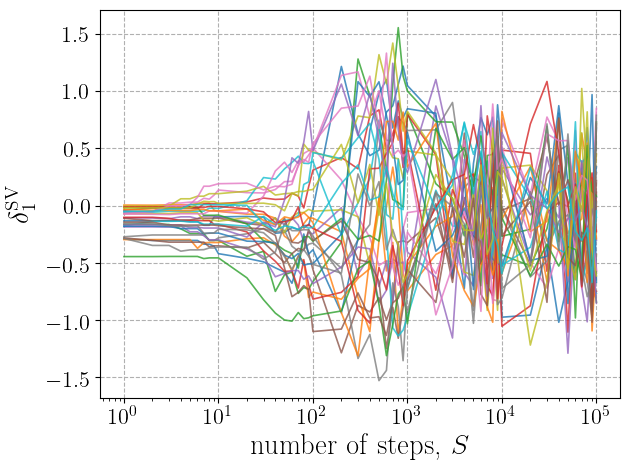

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_chains_20.pdf.


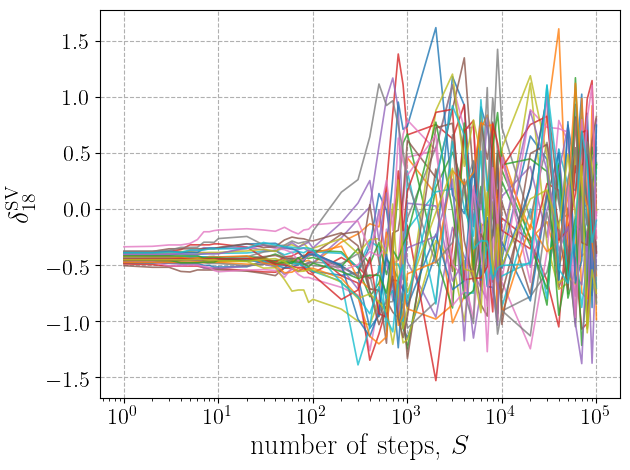

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.log updated in 0.004992400063201785 s.


In [31]:
sampler.plot_chains(pars=[0,1,2,3,20],n_chains=30,show_plot=True)

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\figures\DY_sampler_figure_chains_logpdf.pdf.


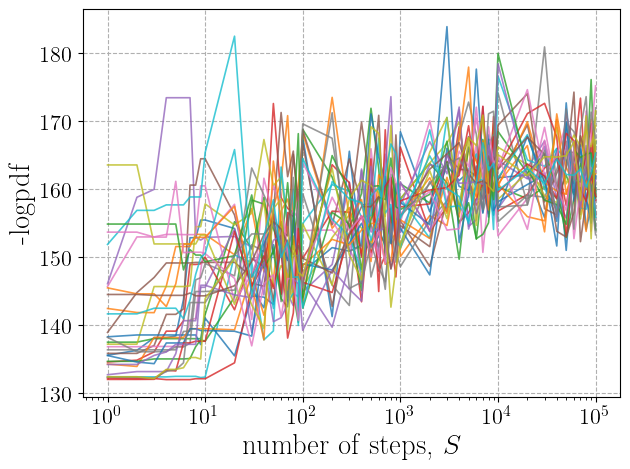

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.log updated in 0.003014399902895093 s.


In [32]:
sampler.plot_chains_logpdf(n_chains=30,show_plot=True)

In [33]:
[x.replace("C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\toy\\outfiles","") for x in sampler.figures_list]

['C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\Drell-Yan\\Sampler\\figures\\DY_sampler_figure_GR_Rc_0.pdf',
 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\Drell-Yan\\Sampler\\figures\\DY_sampler_figure_GR_sqrtVhat_0.pdf',
 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\Drell-Yan\\Sampler\\figures\\DY_sampler_figure_GR_sqrtW_0.pdf',
 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\Drell-Yan\\Sampler\\figures\\DY_sampler_figure_GR_Rc_1.pdf',
 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\Drell-Yan\\Sampler\\figures\\DY_sampler_figure_GR_sqrtVhat_1.pdf',
 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\Drell-Yan\\Sampler\\figures\\DY_sample

In [34]:
sampler.save(overwrite=True)

Sampler object saved to file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.h5 in 0.023540199967101216 s.
Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.log updated in 0.007292299997061491 s.


C:\Users\Admin\Anaconda3\envs\TensorFlow2-GPU\lib\site-packages\deepdish\io\hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


## Data object

In [29]:
100000*200/1000000

20.0

In [35]:
data = sampler.get_data_object(nsamples=1000000, 
                               burnin=100000,#"auto", 
                               thin="auto",
                               dtype='float64', 
                               test_fraction=0.3,
                               output_folder="Data")

Estimating optimal 'thin'. For very large chains this could take a while.
Thin automatically set to: 19 .
1000000 unique samples generated in 124.452979600057 s.
Data object saved to file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Data\DY_data_object.h5 in 0.082971700001508 s.
1000000 data samples (data_X, data_Y) saved to file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Data\DY_data_samples.h5 in 0.7629951001144946 s.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Data\DY_data.log saved in 0.005980200017802417 s.
Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\Drell-Yan\Sampler\DY_sampler.log updated in 0.01035919995047152 s.


In [ ]:
data = DNNLikelihood.Data(input_file = "Data/DY_data",
                          dtype = "float32",
                          load_on_RAM = True)

### Posterior

In [31]:
data.data_X[0:10]

array([[-3.36835741e-01,  6.40252086e-01, -7.67072384e-02,
         3.02531906e-01,  1.21004931e-01, -6.97593161e-01,
        -2.60521341e-01, -1.59184048e-01, -2.06496467e-01,
        -7.45060953e-01,  4.22240623e-01, -4.19082069e-01,
         7.70699839e-01, -6.56234920e-01,  9.70360763e-01,
         9.33121353e-01, -5.17467383e-01,  4.28329197e-01,
        -4.59350125e-01, -9.44133358e-01,  3.08666587e-01,
         6.70768564e-01, -6.23585850e-01, -4.55082508e-01,
         1.41082440e+00,  9.81325977e-01,  1.35058827e+00,
         3.12406797e-01, -3.36438958e-01, -2.40985148e-01,
        -9.16713504e-01,  1.08163387e+00, -1.65105258e+00,
         1.32100435e-01, -1.08850433e-01,  7.84070303e-01,
        -1.31164886e+00,  3.99273154e-01,  8.80672080e-02,
        -3.75113363e-01,  1.04741492e+00,  5.72302613e-01,
         1.34587720e+00,  4.54393292e-01,  3.97445545e-01,
         6.31134227e-01,  6.32827183e-01,  9.71698850e-01,
         4.46741055e-01, -5.62404130e-01, -8.01930303e-0

In [33]:
self = data
def plot_corners_1samp(self, X, W=None, pars=None, max_points=None, nbins=50, pars_labels=None,
                       ranges_extend=None, title = None, color="green",
                       plot_title="Params contours", legend_labels=None, 
                       figure_filename=None, show_plot=False, overwrite=False, verbose=None):
    verbose, verbose_sub = self.set_verbosity(verbose)
    plt.style.use(mplstyle_path)
    start = timer()
    linewidth = 1.3
    intervals = inference.CI_from_sigma([1, 2, 3])
    if ranges_extend is None:
        ranges = extend_corner_range(X, X, pars, 0)
    else:
        ranges = extend_corner_range(X, X, pars, ranges_extend)
    #pars_labels = self.__set_pars_labels(pars_labels)
    labels = np.array(pars_labels)[pars].tolist()
    if not overwrite:
        utils.check_rename_file(figure_filename)
    nndims = len(pars)
    if max_points is not None:
        if type(max_points) is list:
            nnn = np.min([len(X), max_points[0]])
        else:
            nnn = np.min([len(X), max_points])
    else:
        nnn = len(X)
    rnd_idx = np.random.choice(np.arange(len(X)), nnn, replace=False)
    samp = X[rnd_idx][:,pars]
    if W is not None:
        W = W[rnd_idx]
    try:
        HPDI
    except:
        print("Compiting HPDIs.")
        HPDI = [inference.HPDI(samp[:,i], intervals = intervals, weights=W, nbins=nbins, print_hist=False, optimize_binning=False) for i in range(nndims)]
    try:
        levels
    except:
        levels = np.array([[np.sort(inference.HPD_quotas(samp[:,[i,j]], nbins=nbins, intervals = inference.CI_from_sigma([1, 2, 3]), weights=W)).tolist() for j in range(nndims)] for i in range(nndims)])
    fig, axes = plt.subplots(nndims, nndims, figsize=(3*nndims, 3*nndims))
    figure = corner(samp, bins=nbins, weights=W, labels=[r"%s" % s for s in labels], 
                    fig=fig, max_n_ticks=6, color=color, plot_contours=True, smooth=True, 
                    smooth1d=True, range=ranges, plot_datapoints=True, plot_density=False, 
                    fill_contours=False, normalize1d=True, hist_kwargs={"color": color, "linewidth": "1.5"}, 
                    label_kwargs={"fontsize": 16}, show_titles=False, title_kwargs={"fontsize": 18}, 
                    levels_lists=levels, data_kwargs={"alpha": 1}, 
                    contour_kwargs={"linestyles": ["dotted", "dashdot", "dashed"][:len(HPDI[0])], "linewidths": [linewidth, linewidth, linewidth][:len(HPDI[0])]},
                    no_fill_contours=False, contourf_kwargs={"colors": ["white", "lightgreen", color], "alpha": 1})  
                    # , levels=(0.393,0.68,)) ,levels=[300],levels_lists=levels1)#,levels=[120])
    axes = np.array(figure.axes).reshape((nndims, nndims))
    for i in range(nndims):
        title_i = ""
        ax = axes[i, i]
        #ax.axvline(value1[i], color="green",alpha=1)
        #ax.axvline(value2[i], color="red",alpha=1)
        ax.grid(True, linestyle="--", linewidth=1, alpha=0.3)
        ax.tick_params(axis="both", which="major", labelsize=16)
        HPDI68 = HPDI[i][intervals[0]]["Intervals"]
        HPDI95 = HPDI[i][intervals[1]]["Intervals"]
        HPDI3s = HPDI[i][intervals[2]]["Intervals"]
        hists_1d = get_1d_hist(i, samp, nbins=nbins, ranges=ranges, weights=W, normalize1d=True)[0]  # ,intervals=HPDI681)
        for j in HPDI3s:
            #ax.fill_between(hists_1d_1[0], 0, hists_1d_1[1], where=(hists_1d_1[0]>=j[0])*(hists_1d_1[0]<=j[1]), facecolor="lightgreen", alpha=0.2)#facecolor=(255/255,89/255,71/255,.4))#
            ax.axvline(hists_1d[0][hists_1d[0] >= j[0]][0], color=color, alpha=1, linestyle=":", linewidth=linewidth)
            ax.axvline(hists_1d[0][hists_1d[0] <= j[1]][-1], color=color, alpha=1, linestyle=":", linewidth=linewidth)
        for j in HPDI95:
            #ax.fill_between(hists_1d_1[0], 0, hists_1d_1[1], where=(hists_1d_1[0]>=j[0])*(hists_1d_1[0]<=j[1]), facecolor="lightgreen", alpha=0.2)#facecolor=(255/255,89/255,71/255,.4))#
            ax.axvline(hists_1d[0][hists_1d[0] >= j[0]][0], color=color, alpha=1, linestyle="-.", linewidth=linewidth)
            ax.axvline(hists_1d[0][hists_1d[0] <= j[1]][-1], color=color, alpha=1, linestyle="-.", linewidth=linewidth)
        for j in HPDI68:
            #ax.fill_between(hists_1d_1[0], 0, hists_1d_1[1], where=(hists_1d_1[0]>=j[0])*(hists_1d_1[0]<=j[1]), facecolor="white", alpha=1)#facecolor=(0,1,0,.5))#
            ax.axvline(hists_1d[0][hists_1d[0] >= j[0]][0], color=color, alpha=1, linestyle="--", linewidth=linewidth)
            ax.axvline(hists_1d[0][hists_1d[0] <= j[1]][-1], color=color, alpha=1, linestyle="--", linewidth=linewidth)
            title_i = r"%s"%title + ": ["+"{0:1.2e}".format(j[0])+","+"{0:1.2e}".format(j[1])+"]"
        if i == 0:
            x1, x2, _, _ = ax.axis()
            ax.set_xlim(x1*1.3, x2)
        ax.set_title(title_i, fontsize=10)
    for yi in range(nndims):
        for xi in range(yi):
            ax = axes[yi, xi]
            if xi == 0:
                x1, x2, _, _ = ax.axis()
                ax.set_xlim(x1*1.3, x2)
            ax.grid(True, linestyle="--", linewidth=1)
            ax.tick_params(axis="both", which="major", labelsize=16)
    fig.subplots_adjust(top=0.85,wspace=0.25, hspace=0.25)
    fig.suptitle(r"%s" % (plot_title), fontsize=26)
    #fig.text(0.5 ,1, r"%s" % plot_title, fontsize=26)
    colors = [color, "black", "black", "black"]
    red_patch = matplotlib.patches.Patch(color=colors[0])  # , label="The red data")
    #blue_patch = matplotlib.patches.Patch(color=colors[1])  # , label="The blue data")
    line1 = matplotlib.lines.Line2D([0], [0], color=colors[0], lw=int(7+2*nndims))
    line2 = matplotlib.lines.Line2D([0], [0], color=colors[1], linewidth=3, linestyle="--")
    line3 = matplotlib.lines.Line2D([0], [0], color=colors[2], linewidth=3, linestyle="-.")
    line4 = matplotlib.lines.Line2D([0], [0], color=colors[3], linewidth=3, linestyle=":")
    lines = [line1, line2, line3, line4]
    fig.legend(lines, legend_labels, fontsize=int(7+2*nndims), loc="upper right")#(1/nndims*1.05,1/nndims*1.1))#transform=axes[0,0].transAxes)# loc=(0.53, 0.8))
    #plt.tight_layout()
    plt.savefig(figure_filename)#, dpi=200)  # ,dpi=200)
    utils.append_without_duplicate(self.figures_list, figure_filename)
    if show_plot:
        plt.show()
    plt.close()
    end = timer()
    timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S.%fZ")[:-3]
    self.log[timestamp] = {"action": "saved figure",
                           "file name": path.split(figure_filename)[-1],
                           "file path": figure_filename}
    print(r"%s" % figure_filename, "created and saved in", str(end-start), "s.", show=verbose)
    print("Plot done and saved in", end-start, "s.", show=verbose)

Compiting HPDIs.


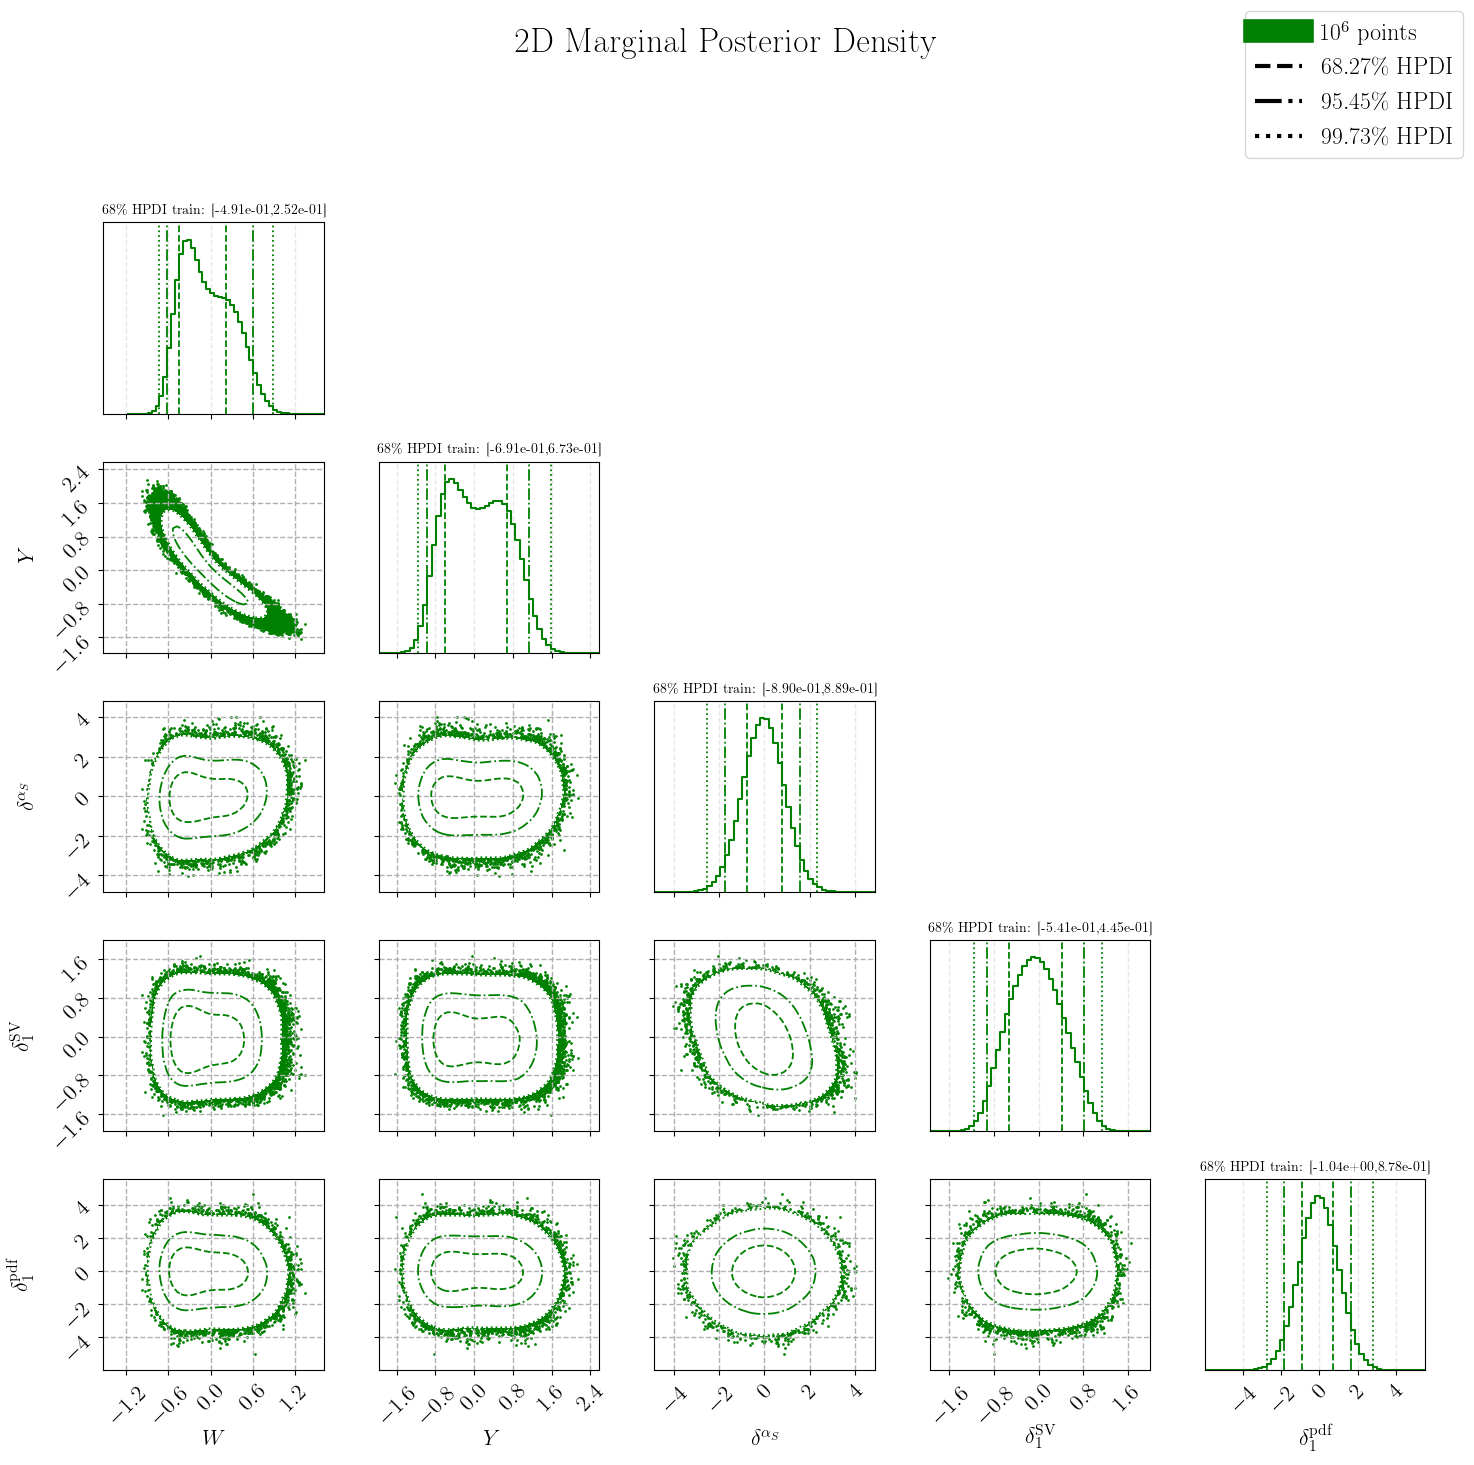

NameError: name 'datetime' is not defined

In [34]:
from matplotlib import pyplot as plt
import matplotlib
from timeit import default_timer as timer
from DNNLikelihood import inference
from DNNLikelihood import utils
from DNNLikelihood.corner import corner, extend_corner_range, get_1d_hist
import numpy as np
mplstyle_path = r"C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\source\DNNLikelihood\matplotlib.mplstyle"
self.figures_list = []
plot_corners_1samp(self, data.data_X, W=None, pars=[0,1,2,3,20], max_points=None, nbins=50, 
                   pars_labels=sampler.pars_labels,
                   ranges_extend=20, title = "$68\%$ HPDI train", color="green",
                   plot_title="2D Marginal Posterior Density", legend_labels=[r"$%s$ points" % utils.latex_float(len(data.data_X)),
                                                                r"$68.27\%$ HPDI", 
                                                                r"$95.45\%$ HPDI", 
                                                                r"$99.73\%$ HPDI"], 
                   figure_filename="Data/posterior1", show_plot=True, overwrite=True, verbose=None)

In [ ]:
self = sampler
def plot_corners_2samp(self, X1, X2, W1=None, W2=None, pars=None, max_points=None, nbins=50, pars_labels=None,
                       ranges_extend=None, title1 = None, title2 = None,
                       color1="green", color2="red", 
                       plot_title="Params contours", legend_labels=None, 
                       figure_filename=None, show_plot=False, overwrite=False, verbose=None):
    verbose, verbose_sub = self.set_verbosity(verbose)
    plt.style.use(mplstyle_path)
    start = timer()
    linewidth = 1.3
    intervals = inference.CI_from_sigma([1, 2, 3])
    if ranges_extend is None:
        ranges = extend_corner_range(X1, X2, pars, 0)
    else:
        ranges = extend_corner_range(X1, X2, pars, ranges_extend)
    pars_labels = self.__set_pars_labels(pars_labels)
    labels = np.array(pars_labels)[pars].tolist()
    if not overwrite:
        utils.check_rename_file(figure_filename)
    nndims = len(pars)
    if max_points is not None:
        if type(max_points) is list:
            nnn1 = np.min([len(X1), max_points[0]])
            nnn2 = np.min([len(X2), max_points[1]])
        else:
            nnn1 = np.min([len(X1), max_points])
            nnn2 = np.min([len(X2), max_points])
    else:
        nnn1 = len(X1)
        nnn2 = len(X2)
    rnd_idx_1 = np.random.choice(np.arange(len(X1)), nnn1, replace=False)
    rnd_idx_2 = np.random.choice(np.arange(len(X2)), nnn2, replace=False)
    samp1 = X1[rnd_idx_1][:,pars]
    samp2 = X2[rnd_idx_2][:,pars]
    if W1 is not None:
        W1 = W1[rnd_idx_1]
    if W2 is not None:
        W2 = W2[rnd_idx_2]
    print("Compiting HPDIs.")
    HPDI1 = [inference.HPDI(samp1[:,i], intervals = intervals, weights=W1, nbins=nbins, print_hist=False, reduce_binning=True) for i in range(nndims)]
    HPDI2 = [inference.HPDI(samp2[:,i], intervals = intervals, weights=W2, nbins=nbins, print_hist=False, reduce_binning=True) for i in range(nndims)]
    levels1 = np.array([[np.sort(inference.HPD_quotas(samp1[:,[i,j]], nbins=nbins, intervals = inference.CI_from_sigma([1, 2, 3]), weights=W1)).tolist() for j in range(nndims)] for i in range(nndims)])
    levels2 = np.array([[np.sort(inference.HPD_quotas(samp2[:, [i, j]], nbins=nbins, intervals=inference.CI_from_sigma(
        [1, 2, 3]), weights=W2)).tolist() for j in range(nndims)] for i in range(nndims)])
    fig, axes = plt.subplots(nndims, nndims, figsize=(3*nndims, 3*nndims))
    figure1 = corner(samp1, bins=nbins, weights=W1, labels=[r"%s" % s for s in labels], 
                     fig=fig, max_n_ticks=6, color=color1, plot_contours=True, smooth=True, 
                     smooth1d=True, range=ranges, plot_datapoints=True, plot_density=False, 
                     fill_contours=False, normalize1d=True, hist_kwargs={"color": color1, "linewidth": "1.5"}, 
                     label_kwargs={"fontsize": 16}, show_titles=False, title_kwargs={"fontsize": 18}, 
                     levels_lists=levels1, data_kwargs={"alpha": 1}, 
                     contour_kwargs={"linestyles": ["dotted", "dashdot", "dashed"][:len(HPDI1[0])], "linewidths": [linewidth, linewidth, linewidth][:len(HPDI1[0])]},
                     no_fill_contours=False, contourf_kwargs={"colors": ["white", "lightgreen", color1], "alpha": 1})  
                     # , levels=(0.393,0.68,)) ,levels=[300],levels_lists=levels1)#,levels=[120])
    figure2 = corner(samp2, bins=nbins, weights=W2, labels=[r"%s" % s for s in labels], 
                     fig=fig, max_n_ticks=6, color=color2, plot_contours=True, smooth=True, 
                     range=ranges, smooth1d=True, plot_datapoints=True, plot_density=False, 
                     fill_contours=False, normalize1d=True, hist_kwargs={"color": color2, "linewidth": "1.5"}, 
                     label_kwargs={"fontsize": 16}, show_titles=False, title_kwargs={"fontsize": 18}, levels_lists=levels2, data_kwargs={"alpha": 1}, 
                     contour_kwargs={"linestyles": ["dotted", "dashdot", "dashed"][0:len(HPDI2[0])], "linewidths": [linewidth, linewidth, linewidth][:len(HPDI2[0])]},
                     no_fill_contours=False, contourf_kwargs={"colors": ["white", "tomato", color2], "alpha": 1})  
                     # , quantiles = (0.16, 0.84), levels=(0.393,0.68,)), levels=[300],levels_lists=levels2)#,levels=[120])
    axes = np.array(figure1.axes).reshape((nndims, nndims))
    for i in range(nndims):
        ax = axes[i, i]
        title = ""
        #ax.axvline(value1[i], color="green",alpha=1)
        #ax.axvline(value2[i], color="red",alpha=1)
        ax.grid(True, linestyle="--", linewidth=1, alpha=0.3)
        ax.tick_params(axis="both", which="major", labelsize=16)
        HPDI681 = HPDI1[i][0]
        HPDI951 = HPDI1[i][1]
        HPDI3s1 = HPDI1[i][2]
        HPDI682 = HPDI2[i][0]
        HPDI952 = HPDI2[i][1]
        HPDI3s2 = HPDI2[i][2]
        hists_1d_1 = get_1d_hist(i, samp1, nbins=nbins, ranges=ranges, weights=W1, normalize1d=True)[0]  # ,intervals=HPDI681)
        hists_1d_2 = get_1d_hist(i, samp2, nbins=nbins, ranges=ranges, weights=W2, normalize1d=True)[0]  # ,intervals=HPDI682)
        for j in HPDI3s1:
            #ax.fill_between(hists_1d_1[0], 0, hists_1d_1[1], where=(hists_1d_1[0]>=j[0])*(hists_1d_1[0]<=j[1]), facecolor="lightgreen", alpha=0.2)#facecolor=(255/255,89/255,71/255,.4))#
            ax.axvline(hists_1d_1[0][hists_1d_1[0] >= j[0]][0], color=color1, alpha=1, linestyle=":", linewidth=linewidth)
            ax.axvline(hists_1d_1[0][hists_1d_1[0] <= j[1]][-1], color=color1, alpha=1, linestyle=":", linewidth=linewidth)
        for j in HPDI3s2:
            #ax.fill_between(hists_1d_2[0], 0, hists_1d_2[1], where=(hists_1d_2[0]>=j[0])*(hists_1d_2[0]<=j[1]), facecolor="tomato", alpha=0.2)#facecolor=(255/255,89/255,71/255,.4))#
            ax.axvline(hists_1d_2[0][hists_1d_2[0] >= j[0]][0], color=color2, alpha=1, linestyle=":", linewidth=linewidth)
            ax.axvline(hists_1d_2[0][hists_1d_2[0] <= j[1]][-1], color=color2, alpha=1, linestyle=":", linewidth=linewidth)
        for j in HPDI951:
            #ax.fill_between(hists_1d_1[0], 0, hists_1d_1[1], where=(hists_1d_1[0]>=j[0])*(hists_1d_1[0]<=j[1]), facecolor="lightgreen", alpha=0.2)#facecolor=(255/255,89/255,71/255,.4))#
            ax.axvline(hists_1d_1[0][hists_1d_1[0] >= j[0]][0], color=color1, alpha=1, linestyle="-.", linewidth=linewidth)
            ax.axvline(hists_1d_1[0][hists_1d_1[0] <= j[1]][-1], color=color1, alpha=1, linestyle="-.", linewidth=linewidth)
        for j in HPDI952:
            #ax.fill_between(hists_1d_2[0], 0, hists_1d_2[1], where=(hists_1d_2[0]>=j[0])*(hists_1d_2[0]<=j[1]), facecolor="tomato", alpha=0.2)#facecolor=(255/255,89/255,71/255,.4))#
            ax.axvline(hists_1d_2[0][hists_1d_2[0] >= j[0]][0], color=color2, alpha=1, linestyle="-.", linewidth=linewidth)
            ax.axvline(hists_1d_2[0][hists_1d_2[0] <= j[1]][-1], color=color2, alpha=1, linestyle="-.", linewidth=linewidth)
        for j in HPDI681:
            #ax.fill_between(hists_1d_1[0], 0, hists_1d_1[1], where=(hists_1d_1[0]>=j[0])*(hists_1d_1[0]<=j[1]), facecolor="white", alpha=1)#facecolor=(0,1,0,.5))#
            ax.axvline(hists_1d_1[0][hists_1d_1[0] >= j[0]][0], color=color1, alpha=1, linestyle="--", linewidth=linewidth)
            ax.axvline(hists_1d_1[0][hists_1d_1[0] <= j[1]][-1], color=color1, alpha=1, linestyle="--", linewidth=linewidth)
            title = title+r"%s"%title1 + ": ["+"{0:1.2e}".format(j[0])+","+"{0:1.2e}".format(j[1])+"]"
        title = title+"\n"
        for j in HPDI682:
            #ax.fill_between(hists_1d_2[0], 0, hists_1d_2[1], where=(hists_1d_2[0]>=j[0])*(hists_1d_2[0]<=j[1]), facecolor="white", alpha=1)#facecolor=(1,0,0,.4))#
            ax.axvline(hists_1d_2[0][hists_1d_2[0] >= j[0]][0], color=color2, alpha=1, linestyle="--", linewidth=linewidth)
            ax.axvline(hists_1d_2[0][hists_1d_2[0] <= j[1]][-1], color=color2, alpha=1, linestyle="--", linewidth=linewidth)
            title = title+r"%s"%title2 + ": ["+"{0:1.2e}".format(j[0])+","+"{0:1.2e}".format(j[1])+"]"
        if i == 0:
            x1, x2, _, _ = ax.axis()
            ax.set_xlim(x1*1.3, x2)
        ax.set_title(title, fontsize=10)
    for yi in range(nndims):
        for xi in range(yi):
            ax = axes[yi, xi]
            if xi == 0:
                x1, x2, _, _ = ax.axis()
                ax.set_xlim(x1*1.3, x2)
            ax.grid(True, linestyle="--", linewidth=1)
            ax.tick_params(axis="both", which="major", labelsize=16)
    fig.subplots_adjust(top=0.85,wspace=0.25, hspace=0.25)
    fig.suptitle(r"%s" % (plot_title), fontsize=26)
    #fig.text(0.5 ,1, r"%s" % plot_title, fontsize=26)
    colors = [color1, color2, "black", "black", "black"]
    red_patch = matplotlib.patches.Patch(color=colors[0])  # , label="The red data")
    blue_patch = matplotlib.patches.Patch(color=colors[1])  # , label="The blue data")
    line1 = matplotlib.lines.Line2D([0], [0], color=colors[0], lw=int(7+2*nndims))
    line2 = matplotlib.lines.Line2D([0], [0], color=colors[1], lw=int(7+2*nndims))
    line3 = matplotlib.lines.Line2D([0], [0], color=colors[2], linewidth=3, linestyle="--")
    line4 = matplotlib.lines.Line2D([0], [0], color=colors[3], linewidth=3, linestyle="-.")
    line5 = matplotlib.lines.Line2D([0], [0], color=colors[4], linewidth=3, linestyle=":")
    lines = [line1, line2, line3, line4, line5]
    fig.legend(lines, legend_labels, fontsize=int(7+2*nndims), loc="best")#(1/nndims*1.05,1/nndims*1.1))#transform=axes[0,0].transAxes)# loc=(0.53, 0.8))
    #plt.tight_layout()
    plt.savefig(figure_filename, dpi=50)  # ,dpi=200)
    utils.append_without_duplicate(self.figures_list, figure_filename)
    if show_plot:
        plt.show()
    plt.close()
    end = timer()
    timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S.%fZ")[:-3]
    self.log[timestamp] = {"action": "saved figure",
                           "file name": path.split(figure_filename)[-1],
                           "file path": figure_filename}
    print(r"%s" % figure_filename, "created and saved in", str(end-start), "s.", show=verbose)
    print("Plot done and saved in", end-start, "s.", show=verbose)

### Load and check loaded object

In [2]:
sampler_loaded = DNNLikelihood.Sampler(new_sampler=False,
                                       likelihood_script_file=None,#"outfiles/ATLAS_sbottom_search_92_region_A_patch_sbottom_1400_450_60_likelihood_script",
                                       likelihood=None,#lik,#
                                       nsteps_required=1000,
                                       moves_str=None,
                                       parallel_CPU=True,
                                       vectorize=False,
                                       input_file="toy/sampler/toy_sampler",
                                       verbose=1)

Sampler object loaded in 0.017349799999998083 .
Likelihood object loaded in 0.020522499999998445 .
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\likelihood\toy_likelihood.log updated in 0.006779200000000429 s.
Initialize backend from file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\sampler\toy_sampler_backend.h5 .
Number of available steps: 2000. .
Loaded backend C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\sampler\toy_sampler_backend.h5 for chains toy_sampler in 0.057131700000002894 s.
Specified number of steps nsteps is inconsitent with loaded backend. nsteps has been set to 2000 .
Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\sampler\toy_sampler.log updated in 0.0044618000000014035 s.


In [15]:
diffs = DNNLikelihood.utils.compare_objects(sampler,sampler_loaded,string="Sampler object",verbose=-1)

DIFFERENCE:  Sampler object - input_file : Values are None and C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\sampler\toy_sampler .

DIFFERENCE:  Sampler object - input_h5_file : Values are None and C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\sampler\toy_sampler.h5 .

DIFFERENCE:  Sampler object - input_log_file : Values are None and C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\sampler\toy_sampler.log .

DIFFERENCE:  Sampler object - new_sampler : Values are True and False .

DIFFERENCE:  Sampler object - sampler - _previous_state : Values are State([[-8.63617230e-02  4.81762977e-01  2.99676347e-01  2.31098991e-01
   5.99095911e-01 -2.45827481e-01 -5.16403362e-01  9.84639873e-01
   2.86167661e-01  7.67888604e-01  1.30905259e+00]
 [-1.97473250e-01  5.99581555e-01 -1.41578699e-01  6.30891308e-01
   4.93305389e-01 -1.5116

In [16]:
np.array(diffs)[:,0]

array(['Sampler object - input_file', 'Sampler object - input_h5_file',
       'Sampler object - input_log_file', 'Sampler object - new_sampler',
       'Sampler object - sampler - _previous_state',
       'Sampler object - sampler - _random',
       'Sampler object - sampler - pool'], dtype=object)

In [33]:
sampler.sampler._previous_state

State([[-2.77935796e-01 -6.51313342e-01 -1.18683866e-01  1.23346291e-01
  -7.12077702e-02  4.41041516e-01 -1.59785128e-01  9.24333627e-01
   9.44169085e-02  1.94049461e+00 -4.49403364e-01]
 [-2.88133020e-01  8.13522243e-02  1.69244584e-01 -1.14479829e-02
  -3.48126820e-02 -7.66392468e-01 -1.23150206e-01  3.89118897e-01
   1.37545218e-01  4.05972977e-01  7.32384006e-01]
 [ 3.73320798e-01 -9.39271255e-01 -1.34863168e+00 -3.45003660e-01
  -5.89115278e-01 -1.13850758e+00 -9.18590898e-01  1.08335201e+00
  -1.74187202e+00  9.88402583e-01  4.75036911e-01]
 [-3.25688031e-01 -2.05575215e-01  1.90765283e-01 -2.01683610e-01
   7.70991757e-01  2.27305685e-01  2.21924942e-01  2.73182570e-01
  -2.43540622e-01  9.53331888e-01 -3.14395925e-01]
 [ 8.40743177e-02 -5.45843473e-01 -1.20049929e-01 -4.41731025e-01
  -1.96800994e-01 -3.11647181e-01  1.75266832e-01  1.64788086e+00
  -4.73324301e-01  6.77482528e-01 -4.37904362e-01]
 [-2.58818129e-01 -2.04305897e-01  8.66231748e-02  6.47976881e-01
  -5.22404494

In [15]:
sampler_loaded.sampler._previous_state

State([[-2.77935796e-01 -6.51313342e-01 -1.18683866e-01  1.23346291e-01
  -7.12077702e-02  4.41041516e-01 -1.59785128e-01  9.24333627e-01
   9.44169085e-02  1.94049461e+00 -4.49403364e-01]
 [-2.88133020e-01  8.13522243e-02  1.69244584e-01 -1.14479829e-02
  -3.48126820e-02 -7.66392468e-01 -1.23150206e-01  3.89118897e-01
   1.37545218e-01  4.05972977e-01  7.32384006e-01]
 [ 3.73320798e-01 -9.39271255e-01 -1.34863168e+00 -3.45003660e-01
  -5.89115278e-01 -1.13850758e+00 -9.18590898e-01  1.08335201e+00
  -1.74187202e+00  9.88402583e-01  4.75036911e-01]
 [-3.25688031e-01 -2.05575215e-01  1.90765283e-01 -2.01683610e-01
   7.70991757e-01  2.27305685e-01  2.21924942e-01  2.73182570e-01
  -2.43540622e-01  9.53331888e-01 -3.14395925e-01]
 [ 8.40743177e-02 -5.45843473e-01 -1.20049929e-01 -4.41731025e-01
  -1.96800994e-01 -3.11647181e-01  1.75266832e-01  1.64788086e+00
  -4.73324301e-01  6.77482528e-01 -4.37904362e-01]
 [-2.58818129e-01 -2.04305897e-01  8.66231748e-02  6.47976881e-01
  -5.22404494

In [34]:
sampler.sampler._random

RandomState(MT19937) at 0x1AEA3158BF8

In [35]:
sampler_loaded.sampler._random

RandomState(MT19937) at 0x1AEA3158D08

## Data

### Initialize Data object from "Sampler" object

In [2]:
sampler_loaded = DNNLikelihood.Sampler(new_sampler=False,
                                       likelihood_script_file=None,#"outfiles/ATLAS_sbottom_search_92_region_A_patch_sbottom_1400_450_60_likelihood_script",
                                       likelihood=None,#lik,#
                                       nsteps_required=100000,
                                       moves_str=None,#"[(emcee.moves.StretchMove(), 0), (emcee.moves.GaussianMove(0.0002, mode='random',factor=None),1)]",
                                       parallel_CPU=True,
                                       vectorize=False,
                                       input_file="toy/sampler/toy_sampler",
                                       verbose=1)

Sampler object loaded in 0.012967699999999915 .
Likelihood object loaded in 0.017985600000000268 .
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\likelihood\toy_likelihood.log updated in 0.0045842999999994305 s.
Initialize backend from file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\sampler\toy_sampler_backend.h5 .
Number of available steps: 100000. .
Loaded backend C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\sampler\toy_sampler_backend.h5 for chains toy_sampler in 0.037910399999999456 s.
Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\sampler\toy_sampler.log updated in 0.0028918999999998363 s.


In [3]:
sampler_loaded.nsteps_required = 100000

In [4]:
sampler_loaded.run_sampler()

  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

Initial number of steps: 50000 .
Running 44 parallel processes.


100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [14:07<00:00, 59.00it/s]


Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\sampler\toy_sampler.log saved in 0.007500100000015664 s.
Done in 848.1485845 seconds.
Final number of steps: 100000. .


In [3]:
data = sampler_loaded.get_data_object(nsamples=100000, 
                                      burnin=700,#"auto", 
                                      thin=49,#"auto",
                                      dtype='float64', 
                                      test_fraction=0.3,
                                      output_folder="toy/data")

100000 unique samples generated in 5.4576548 s.
Data object saved to file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data\toy_data_object.h5 in 0.010168499999998915 s.
100000 data samples (data_X, data_Y) saved to file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data\toy_data_samples.h5 in 0.014592600000000289 s.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data\toy_data.log saved in 0.0009329999999998506 s.
Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\sampler\toy_sampler.log updated in 0.0032297999999997273 s.


C:\Users\Admin\Anaconda3\envs\TensorFlow2-GPU\lib\site-packages\deepdish\io\hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


### Initialize Data object from input arguments

In [4]:
data_X = data.data_X[:10000]
data_Y = data.data_Y[:10000]
dtype = ["float64","float32"]
pars_central = data.pars_central

In [5]:
data_new = DNNLikelihood.Data(name = "new_data",
                              data_X = data_X,
                              data_Y = data_Y,
                              dtype = ["float64","float32"],
                              pars_central = pars_central,
                              pars_pos_poi = [5],
                              pars_pos_nuis = None,
                              pars_labels = None,
                              pars_bounds = None,
                              test_fraction = 0.2,
                              load_on_RAM = False,
                              output_folder = "toy/data_new",
                              input_file = None,
                              verbose = True)

Only the positions of the parameters of interest have been specified. Assuming all other parameters are nuisance parameters.
Data json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data_new\new_data.json saved in 0.0010827999999918347 s.
Saved 10000 (data_X, data_Y) samples in data h5 file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data_new\new_data.h5 in 0.0035831999999942354 s.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data_new\new_data.log saved in 0.001257299999991801 s.


In [11]:
data_new.test_fraction = 0.3
data_new.define_test_fraction()

Data json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data_new\new_data.json updated in 0.0010630000000162454 s.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data_new\new_data.log updated in 0.0008820999999841206 s.


In [12]:
data_new.save(overwrite=True)

Data json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data_new\new_data.json updated in 0.001088900000013382 s.
Saved 100000 (data_X, data_Y) samples in data h5 file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data_new\new_data.h5 in 0.02080579999997667 s.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data_new\new_data.log updated in 0.0007633999999825392 s.


### Usage

In [5]:
data.generate_train_data(npoints_train=10000, npoints_val=5000, seed=1)
data.generate_test_data(npoints_test=5000)

Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.log saved in 0.0013630000030389056 s.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.log saved in 0.001633400002901908 s.
Generated 10000 (X_train, Y_train) samples and  5000 (X_val, Y_val) samples in 0.020758599999680882 s.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.log saved in 0.0011970000014116522 s.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.log saved in 0.0015146000005188398 s.
Added 5000 (X_test, Y_test) samples in 0.009003800001664786 s.


In [6]:
data.data_dictionary

{'X_train': array([[-2.8694883e-01,  4.3361101e-01, -4.6597528e-01, ...,
         -9.9797267e-01, -9.8734242e-01, -9.5092475e-01],
        [-1.4112572e-03, -1.3390638e-01, -4.4840363e-01, ...,
         -1.4975280e+00, -1.2390751e+00,  1.5396090e+00],
        [ 3.7207991e-01, -2.8658500e-01, -3.2123467e-01, ...,
         -9.0513098e-01, -6.3475698e-01,  7.9414111e-01],
        ...,
        [-3.9765928e-03, -4.5616624e-01, -2.9231158e-01, ...,
         -1.0422444e+00, -1.0298077e+00,  6.5625781e-01],
        [-6.0469884e-01,  8.8832384e-01,  3.8679966e-01, ...,
          6.8056661e-01, -1.1581110e+00,  1.3571256e+00],
        [-4.1338271e-01, -2.6408151e-01,  4.8945403e-01, ...,
         -7.6410377e-01, -1.5141882e+00, -4.5764816e-01]], dtype=float32),
 'Y_train': array([-52.884396, -55.569386, -54.26178 , ..., -52.6744  , -57.04926 ,
        -55.466824], dtype=float32),
 'X_val': array([[ 0.19161688, -0.45214146, -0.10997196, ..., -0.86869633,
         -1.1265236 ,  0.6219092 ],
       

In [6]:
sX, sY = data.define_scalers(data.data_dictionary["X_train"], data.data_dictionary["Y_train"], scalerX_bool=True, scalerY_bool=True)

Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.log saved in 0.0014631000012741424 s.


In [7]:
data.compute_sample_weights(data.data_dictionary["Y_train"], nbins=50, power=0.5)

Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\new_data.log saved in 0.0012109999999978527 s.


array([0.70231453, 0.89124505, 0.72738372, ..., 0.71332963, 1.16068553,
       0.89124505])

In [9]:
data.save()

The file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.json already exists. Renaming the old file.
Data json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.json saved in 0.0032635999999968135 s.
The file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.h5 already exists. Renaming the old file.


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\toy\\outfiles\\toy_data.h5'

### Attributes

In [4]:
sorted(data.__dict__.keys(),key=str.lower)

['data_dictionary',
 'data_X',
 'data_Y',
 'dtype_required',
 'dtype_stored',
 'input_file',
 'input_log_file',
 'input_object_h5_file',
 'input_samples_h5_file',
 'load_on_RAM',
 'log',
 'name',
 'ndims',
 'npoints',
 'output_folder',
 'output_log_file',
 'output_object_h5_file',
 'output_samples_h5_file',
 'pars_bounds',
 'pars_central',
 'pars_labels',
 'pars_labels_auto',
 'pars_pos_nuis',
 'pars_pos_poi',
 'test_fraction',
 'test_range',
 'train_range',
 'verbose']

### Load and check loaded object

In [4]:
data_loaded = DNNLikelihood.Data(input_file = "toy/data/toy_data",
                                 dtype = "float32",
                                 load_on_RAM = True)

Data object loaded in 0.032864000000000004 .
Samples loaded on RAM.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data\toy_data.log updated in 0.0009744999999981019 s.


In [7]:
diffs = DNNLikelihood.utils.compare_objects(data,data_loaded,string="Data object",verbose=-1)

Comparing obejects Data object .
DIFFERENCE:  Data object - dtype_required : Values are float64 and float32 .

DIFFERENCE:  Data object - input_file : Values are None and C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data\toy_data .

DIFFERENCE:  Data object - input_log_file : Values are None and C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data\toy_data.log .

DIFFERENCE:  Data object - input_object_h5_file : Values are None and C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data\toy_data_object.h5 .

DIFFERENCE:  Data object - input_samples_h5_file : Values are None and C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data\toy_data_samples.h5 .

DIFFERENCE:  Data object - load_on_RAM : Values are False and True .



In [8]:
np.array(diffs)[:,0]

array(['Data object - dtype_required', 'Data object - input_file',
       'Data object - input_log_file',
       'Data object - input_object_h5_file',
       'Data object - input_samples_h5_file', 'Data object - load_on_RAM'],
      dtype=object)

## DnnLik

### Initialize DNNLikelihood object

In [10]:
model_data_inputs = {"npoints": [10000, 3000, 5000],
                     "scalerX": True,
                     "scalerY": True,
                     "weighted": False}
model_define_inputs = {"hidden_layers": [[300, "selu"],
                                         [300, "relu"], 
                                         [300, "selu", "lecun_normal"], 
                                         [300, "relu", "glorot_uniform"]],
                                         "act_func_out_layer": "linear",
                                         "dropout_rate": 0,
                                         "batch_norm": True}
model_optimizer_inputs = {"name": "Adam",
                          "learning_rate": 0.001,
                          "beta_1": 0.9,
                          "beta_2": 0.999,
                          "amsgrad": False}
model_compile_inputs = {"loss": "mse", 
                        "metrics": ["mean_squared_error", "mae", "msle", "me"]}
model_callbacks_inputs = [{"name": "EarlyStopping",
                           "monitor": "loss",
                           "mode": "min",
                           "patience": 100,
                           "min_delta": 0.0001,
                           "restore_best_weights": True},
                          "TerminateOnNaN",
                          "PlotLossesKeras",
                          {"name": "ReduceLROnPlateau",
                           "monitor": "loss",
                           "mode": "min",
                           "factor": 0.2,
                           "min_lr": 0.00008,
                           "patience": 10,
                           "min_delta": 0.0001},
                          {"name": "ModelCheckpoint",
                           "filepath": "automatically set by the framework",
                           "monitor": "loss",
                           "mode": "min",
                           "save_best_only": True,
                           "save_freq": "epoch"}]
model_train_inputs={"epochs": 300,
                    "batch_size": 512}

In [11]:
dnnlikelihood = DNNLikelihood.DnnLik(name="DNNLikelihood_toy",
                                     data=None,
                                     input_data_file="toy/data/toy_data",
                                     load_on_RAM=False,
                                     seed=1,
                                     dtype=None,
                                     same_data=True,
                                     model_data_inputs=model_data_inputs,
                                     model_define_inputs=model_define_inputs,
                                     model_optimizer_inputs=model_optimizer_inputs,
                                     model_compile_inputs=model_compile_inputs,
                                     model_callbacks_inputs=model_callbacks_inputs,
                                     model_train_inputs=model_train_inputs,
                                     resources_inputs=None,
                                     output_folder="toy/dnnlikelihood",
                                     ensemble_name=None,
                                     input_summary_json_file=None,
                                     verbose=True)

TypeError: bad operand type for unary +: 'str'

### Usage

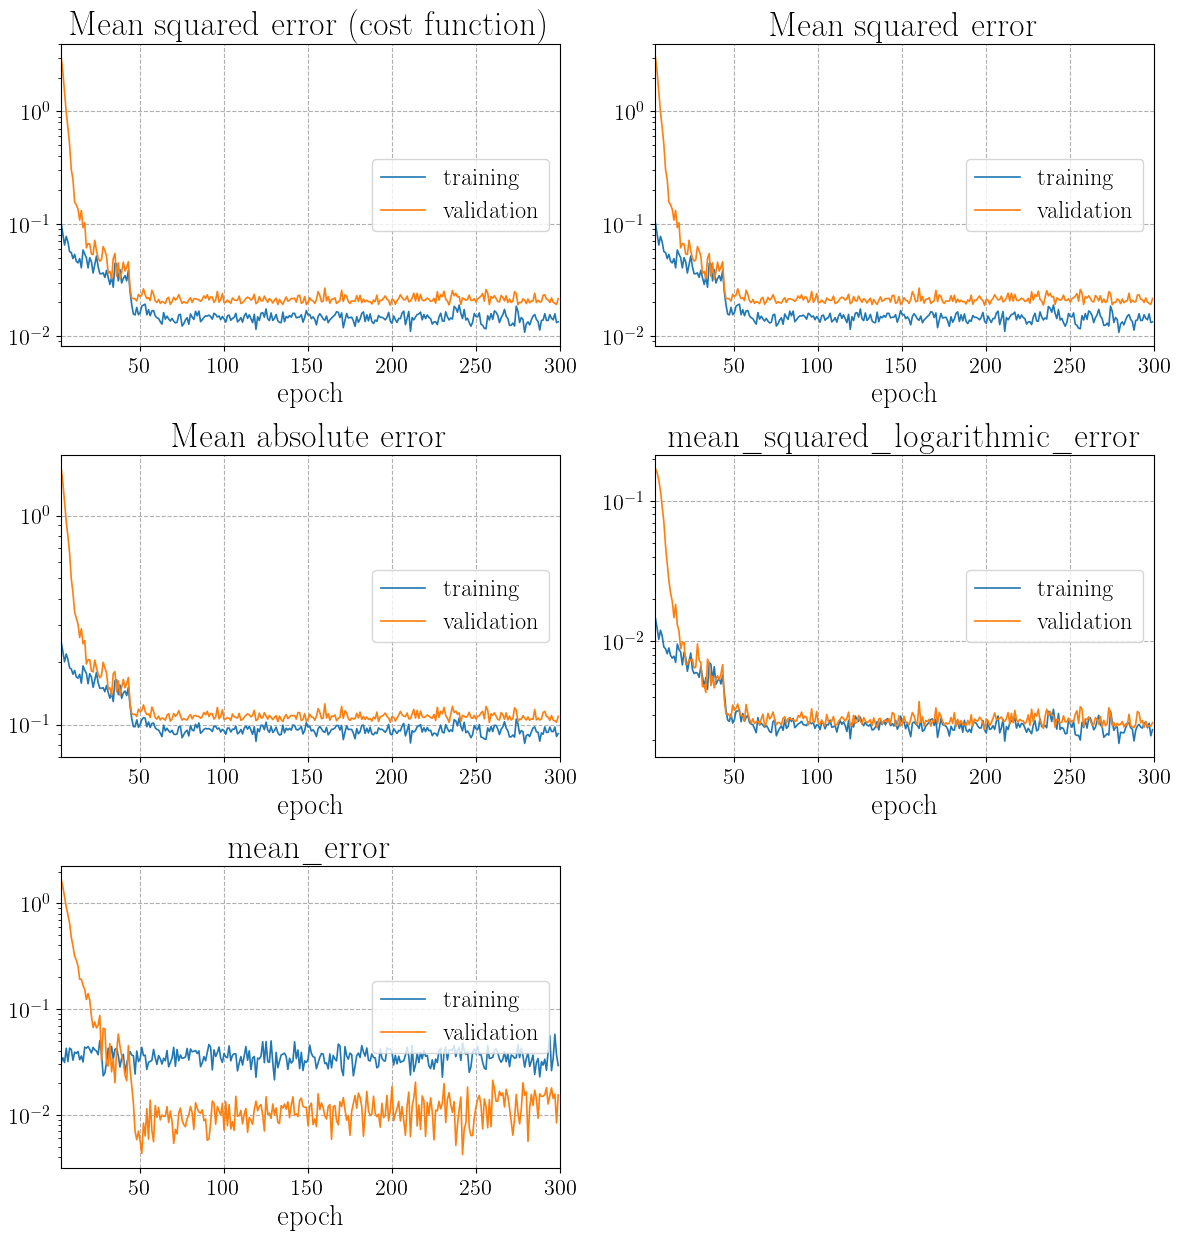

Mean squared error (cost function):
training   (min:    0.011, max:    1.138, cur:    0.013)
validation (min:    0.019, max:    6.538, cur:    0.022)

Mean squared error:
training   (min:    0.011, max:    1.138, cur:    0.013)
validation (min:    0.019, max:    6.538, cur:    0.022)

Mean absolute error:
training   (min:    0.081, max:    0.762, cur:    0.090)
validation (min:    0.102, max:    2.468, cur:    0.109)

mean_squared_logarithmic_error:
training   (min:    0.002, max:    0.115, cur:    0.002)
validation (min:    0.002, max:    0.174, cur:    0.003)

mean_error:
training   (min:    0.021, max:    0.058, cur:    0.029)
validation (min:    0.004, max:    2.465, cur:    0.015)
10000/10000 - 3s - loss: 0.0135 - mean_squared_error: 0.0135 - mean_absolute_error: 0.0905 - mean_squared_logarithmic_error: 0.0024 - mean_error: 0.0293 - val_loss: 0.0217 - val_mean_squared_error: 0.0217 - val_mean_absolute_error: 0.1095 - val_mean_squared_logarithmic_error: 0.0026 - val_mean_error: 0.0

The maximum opset needed by this model is only 9.


C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy_model.onnx created and saved. 0.2570810000000847 s.
C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy_history.json created and saved. 0.013928399999940666 s.
C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy_predictions.h5 created and saved. 0.002864100000010694 s.
DnnLik json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy_summary.json updated in 0.002217200000018238 s.
DnnLik scalers pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy_scalers.pickle saved in 0.0009483999999702064 s.
C:\Users\Admin\Dropbox\

In [4]:
dnnlikelihood.model_build(verbose=1,gpu="auto")
dnnlikelihood.model_train(verbose=2)
dnnlikelihood.save(overwrite=True,verbose=1)

Compute predictions
Generating test data
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data\toy_data.log updated in 0.00633499999992182 s.
Added 5000 (X_test, Y_test) samples in 0.10291689999996834 s.
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy.log updated in 0.0015057000000524567 s.
C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy_idx.h5 created and saved in 0.003516600000011749 s.
Evaluate all metrics on (scaled) train/val/test using best models
Scaling data.
10000/10000 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0354 - mean_squared_logarithmic_error: 4.0140e-04 - mean_error: 0.0047
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\to

C:\Users\Admin\Anaconda3\envs\TensorFlow2-GPU\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '0'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\Admin\Anaconda3\envs\TensorFlow2-GPU\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '0.5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\Admin\Anaconda3\envs\TensorFlow2-GPU\lib\site-packages\deepdish\io\hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series

C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy_predictions.h5 created and saved. 0.34159090000002834 s.
Making plots.


C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\source\DNNLikelihood\dnn_likelihood.py:2672: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.legend([r"training", r"validation"])


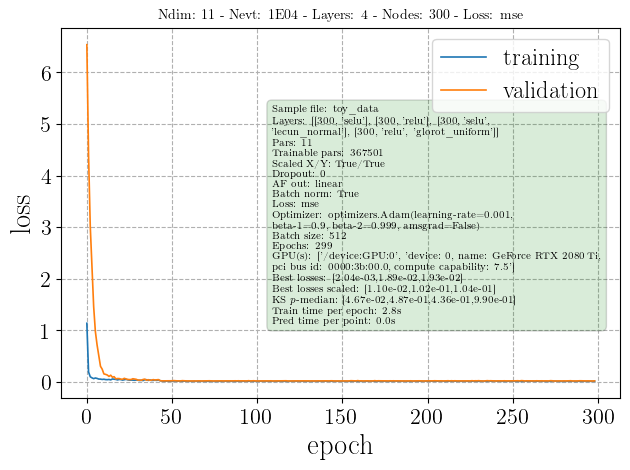

C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\figures\DNNLikelihood_toy_figure_training_history_loss.pdf created and saved in 5.291553000000022 s.


C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\source\DNNLikelihood\dnn_likelihood.py:2672: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.legend([r"training", r"validation"])


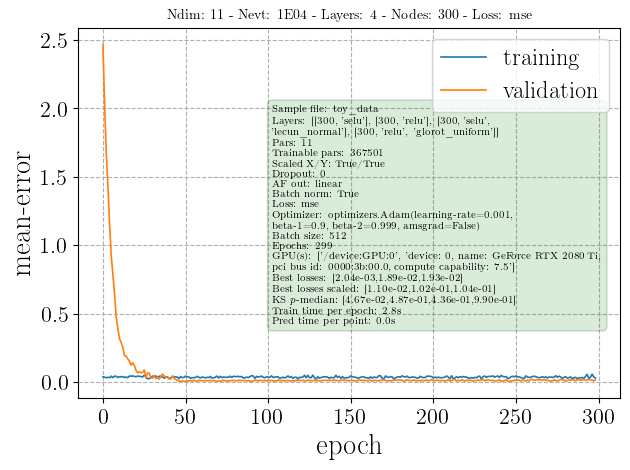

C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\figures\DNNLikelihood_toy_figure_training_history_mean_error.pdf created and saved in 0.6092012000000295 s.
Scaling data.
1000/1000 [==============================] - 0s 96us/sample
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy.log updated in 0.0017580999999609048 s.


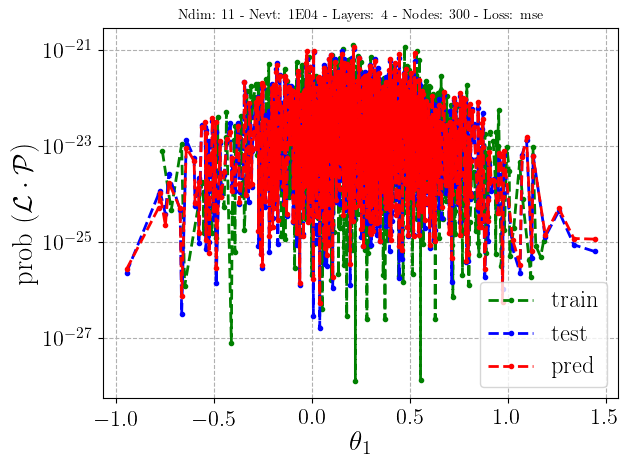

C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\figures\DNNLikelihood_toy_figure_par_lik_coverage_0.pdf created and saved in 0.9360402999999451 s.
Scaling data.
1000/1000 [==============================] - 0s 96us/sample
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy.log updated in 0.002051100000016959 s.


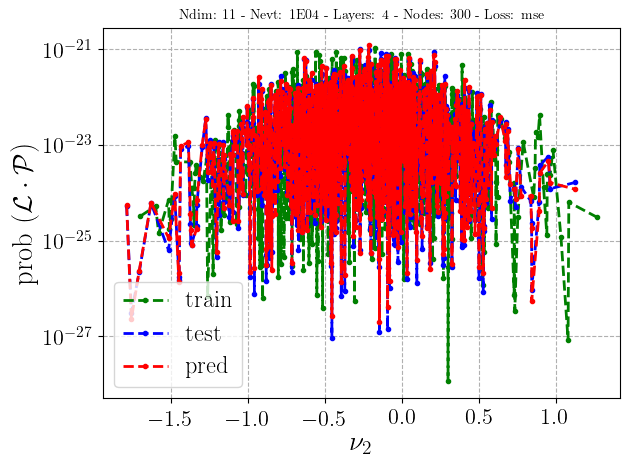

C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\figures\DNNLikelihood_toy_figure_par_lik_coverage_2.pdf created and saved in 0.9190242999999327 s.
Scaling data.
1000/1000 [==============================] - 0s 97us/sample
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy.log updated in 0.0024318000000675966 s.


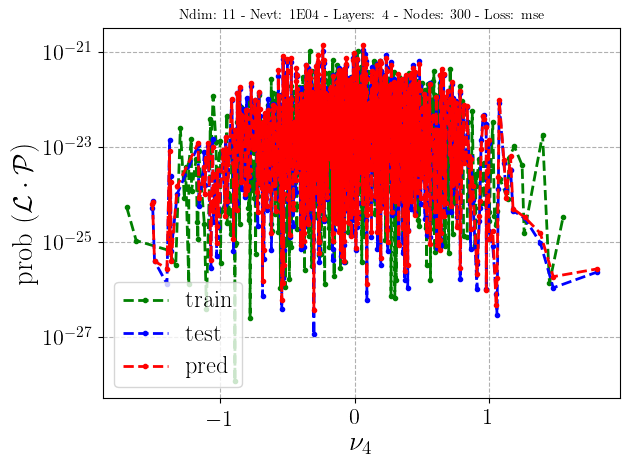

C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\figures\DNNLikelihood_toy_figure_par_lik_coverage_4.pdf created and saved in 0.892300500000033 s.
Scaling data.


1000/1000 [==============================] - 0s 96us/sample
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy.log updated in 0.0019632999999430467 s.


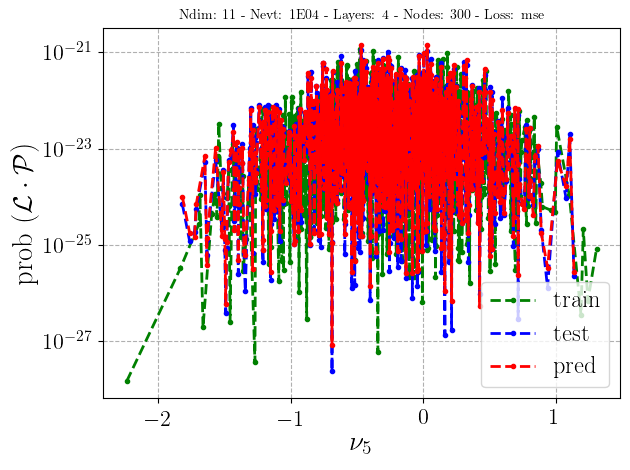

C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\figures\DNNLikelihood_toy_figure_par_lik_coverage_5.pdf created and saved in 0.89007509999999 s.
Scaling data.


1000/1000 [==============================] - 0s 94us/sample
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy.log updated in 0.0019323000000213142 s.


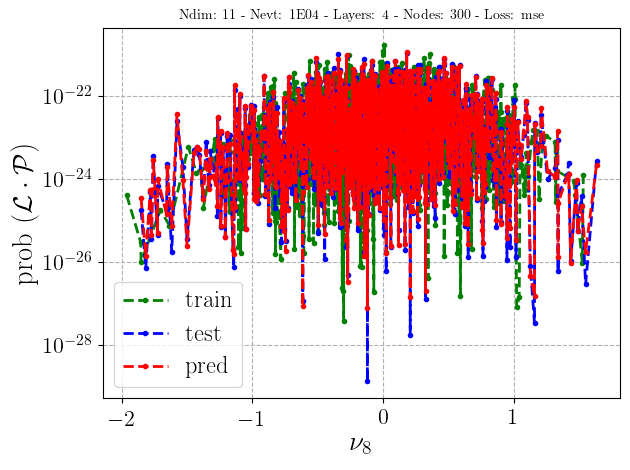

C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\figures\DNNLikelihood_toy_figure_par_lik_coverage_8.pdf created and saved in 0.8686351999999715 s.
Scaling data.


5000/5000 [==============================] - 0s 24us/sample
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy.log updated in 0.002300000000104774 s.


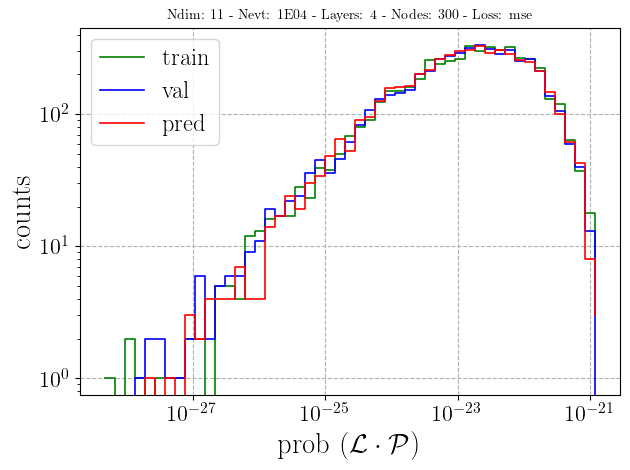

C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\figures\DNNLikelihood_toy_figure_lik_distribution.pdf created and saved in 0.8788031000000274 s.


C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\source\DNNLikelihood\dnn_likelihood.py:2936: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  line5 = matplotlib.lines.Line2D([0], [0], color=colors[4], linewidth=3, linestyle=":")


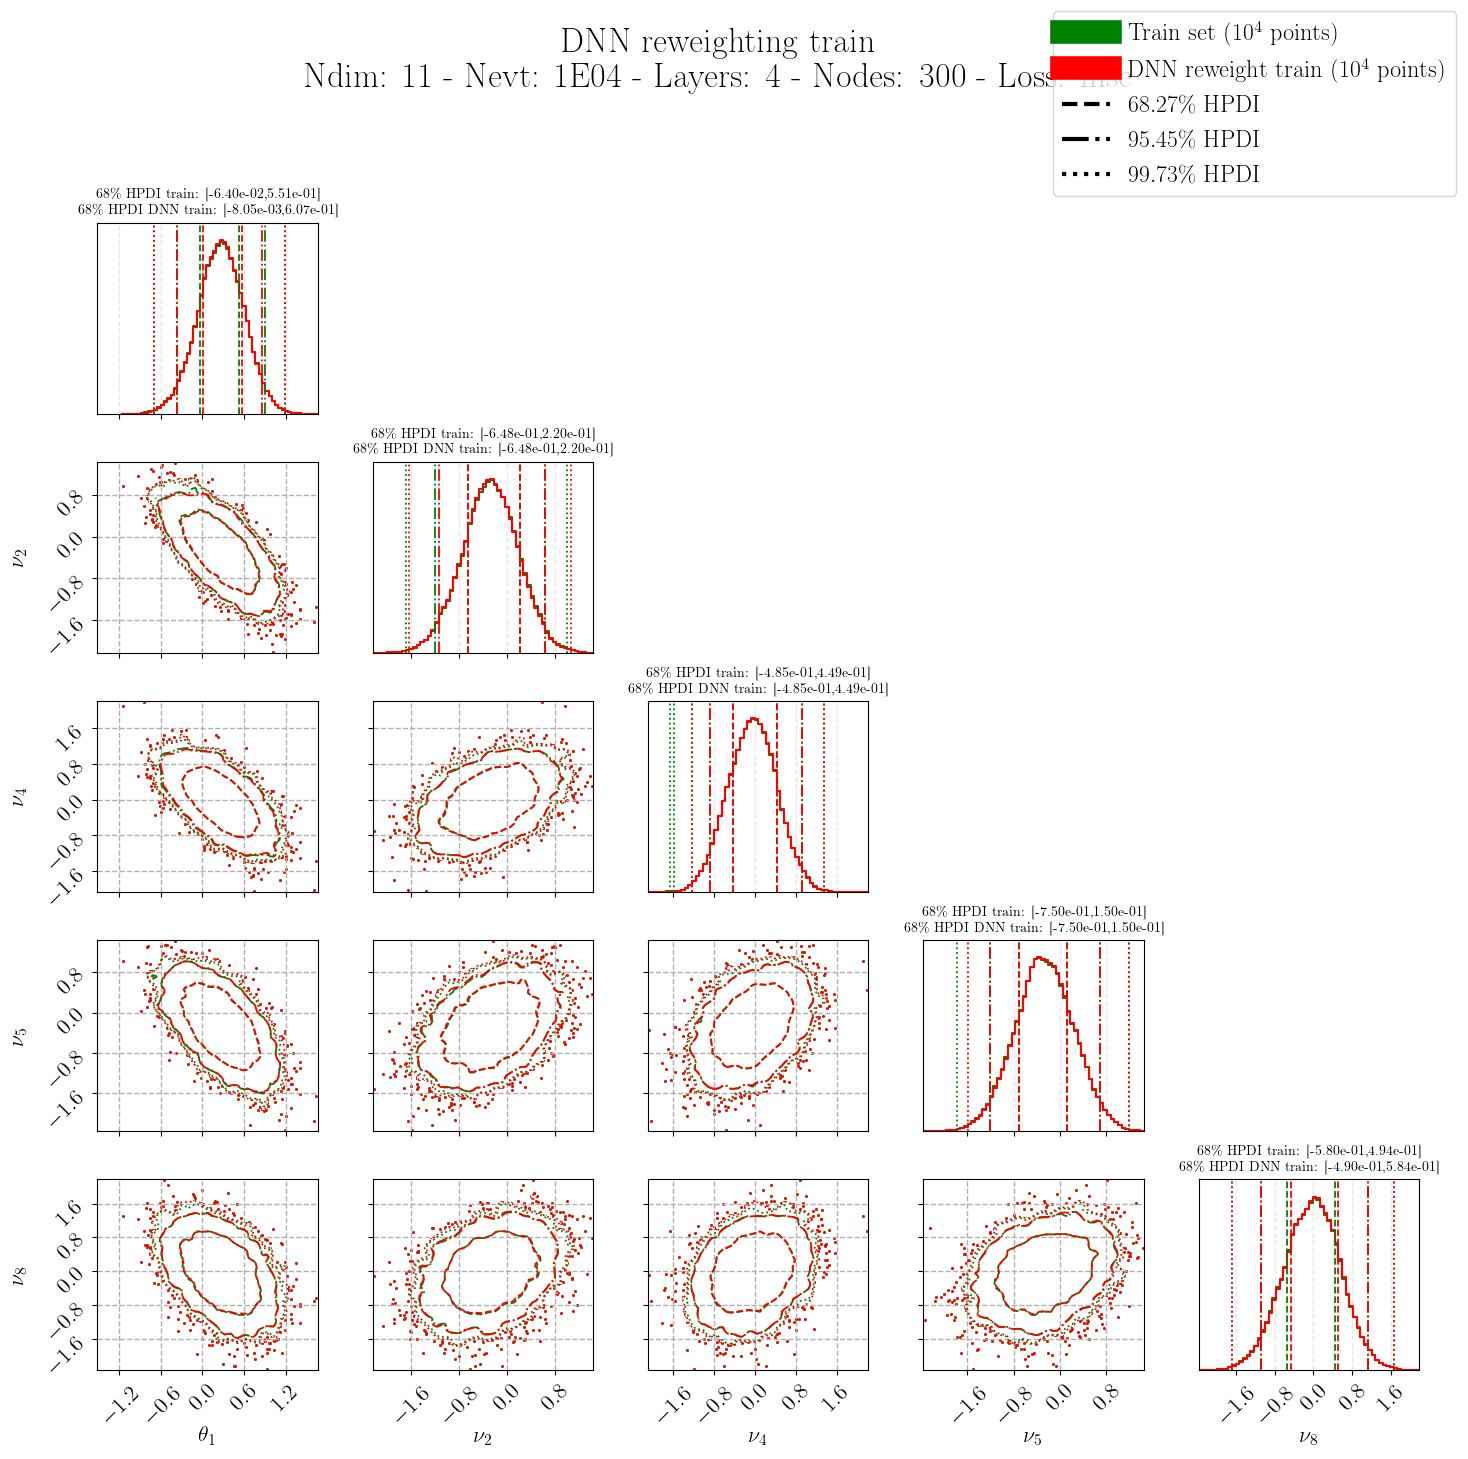

C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\figures\DNNLikelihood_toy_figure_corner_pars_train.pdf created and saved in 5.390223600000013 s.
Plot done and saved in 5.390223600000013 s.


C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\source\DNNLikelihood\dnn_likelihood.py:2936: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  line5 = matplotlib.lines.Line2D([0], [0], color=colors[4], linewidth=3, linestyle=":")


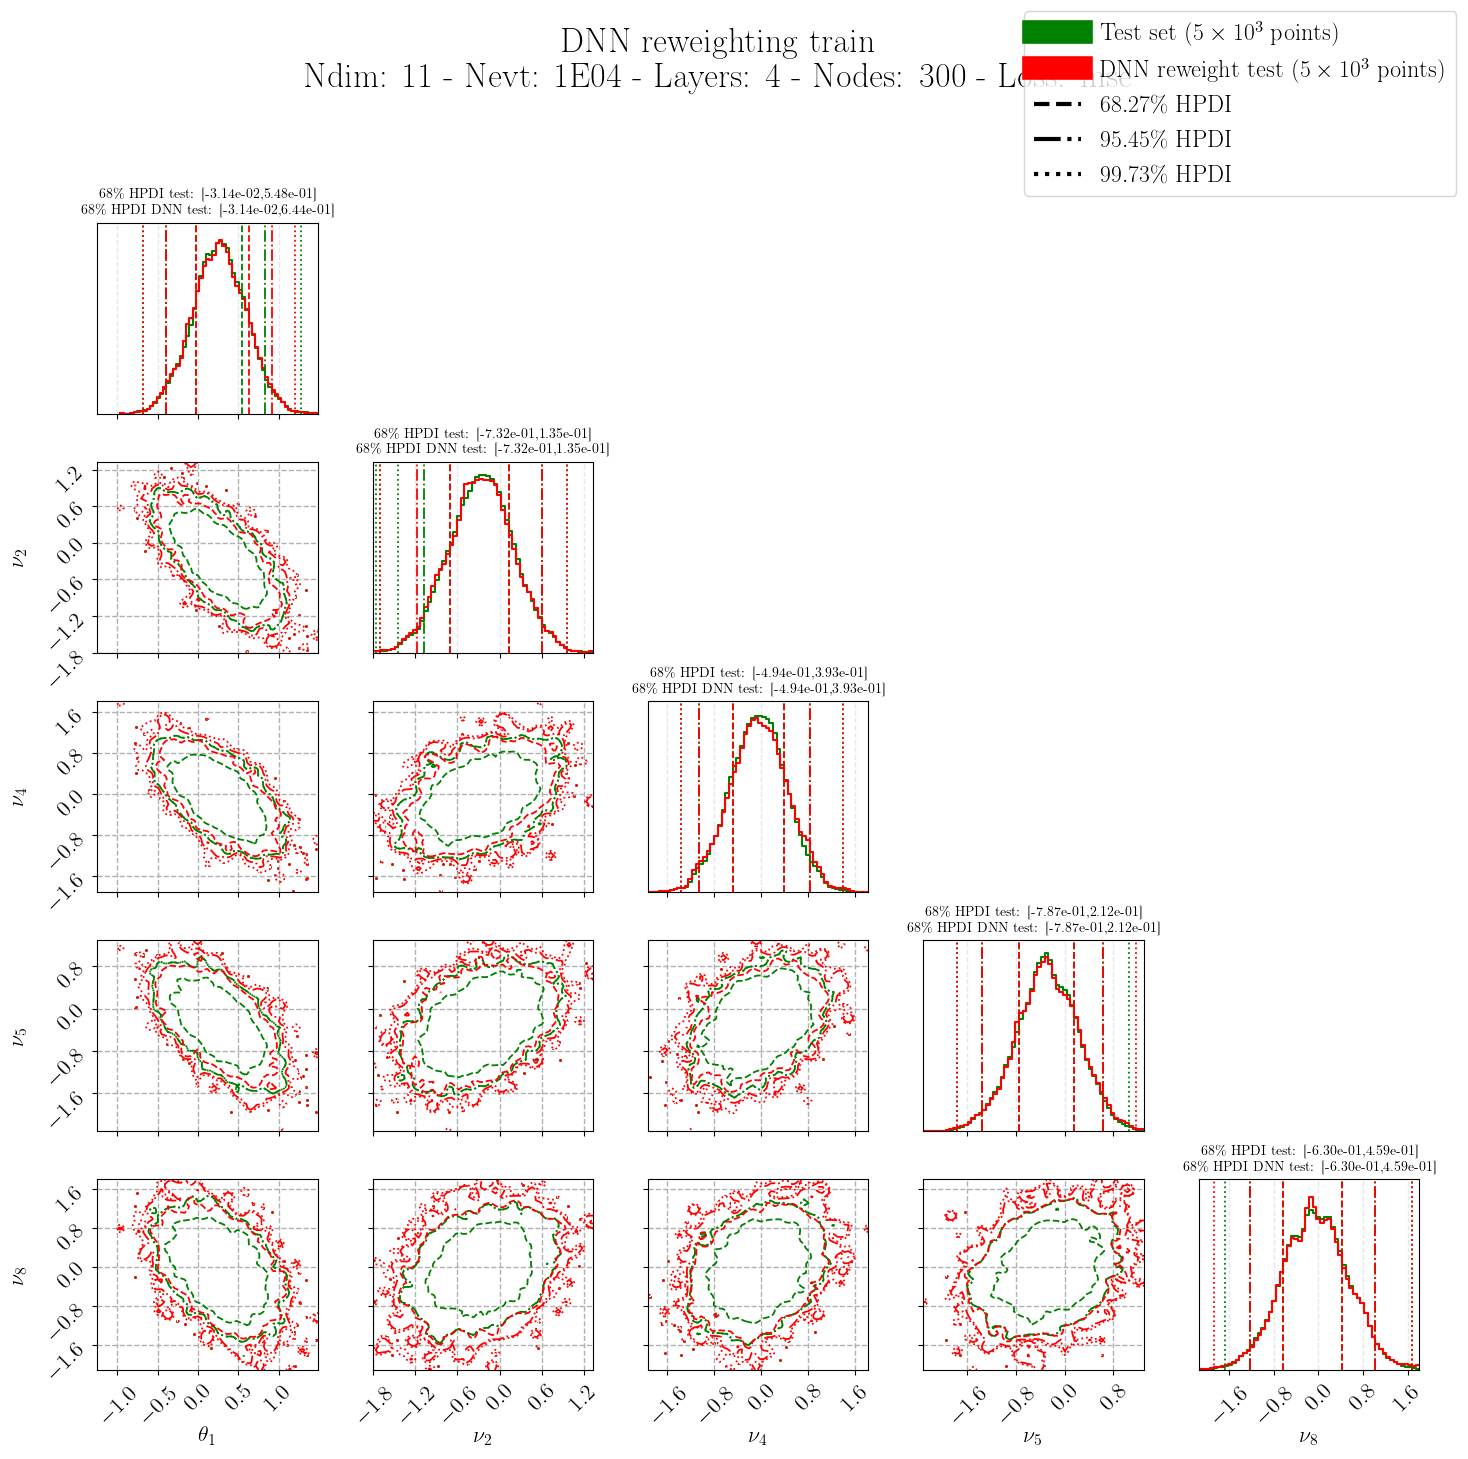

C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\figures\DNNLikelihood_toy_figure_corner_pars_test.pdf created and saved in 3.5905774000000292 s.
Plot done and saved in 3.5905774000000292 s.


C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\source\DNNLikelihood\dnn_likelihood.py:2936: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  line5 = matplotlib.lines.Line2D([0], [0], color=colors[4], linewidth=3, linestyle=":")


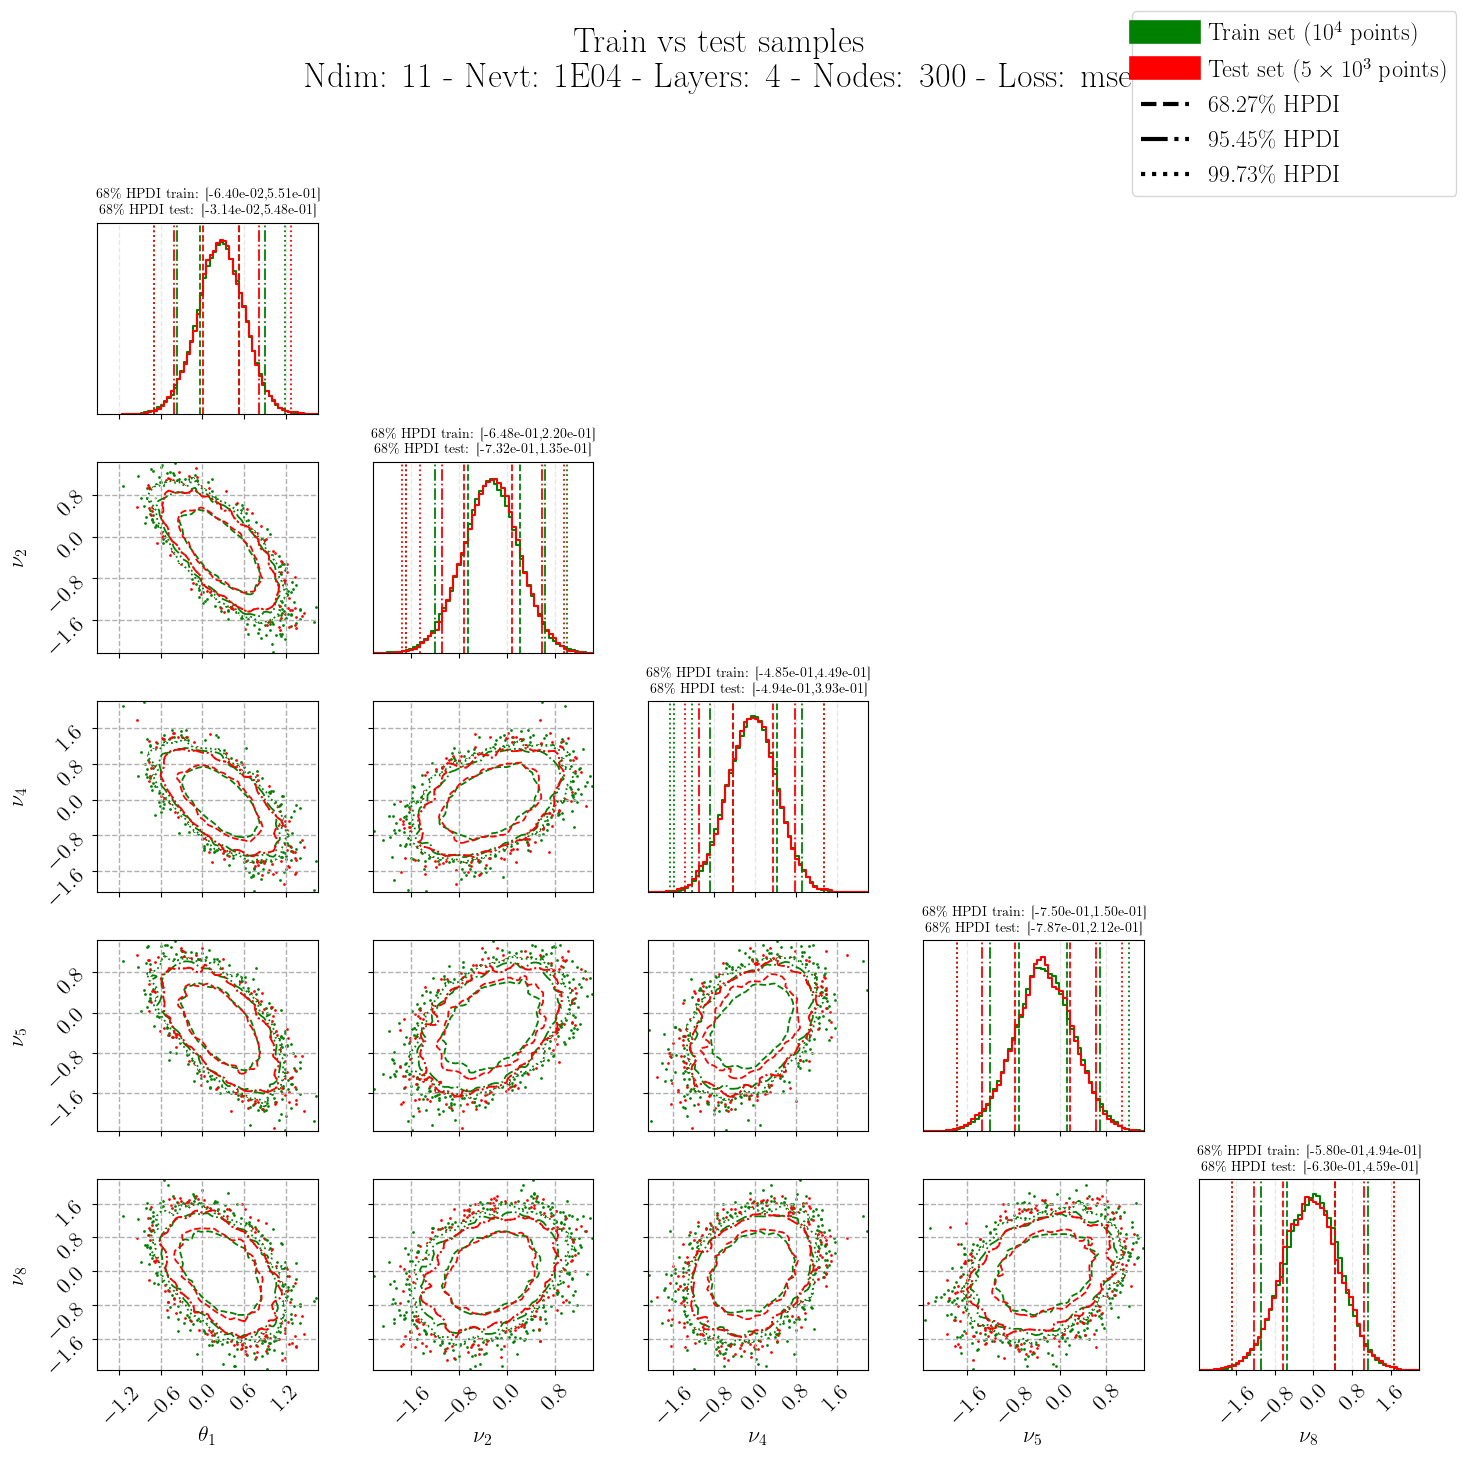

C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\figures\DNNLikelihood_toy_figure_corner_pars_train_vs_test.pdf created and saved in 3.440635400000019 s.
Plot done and saved in 3.440635400000019 s.
All plots done in 23.719130500000006 s.
DnnLik json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy_summary.json updated in 0.0030629999999973734 s.
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy.log updated in 0.0021894999999858555 s.
All predictions done in 26.5563439 s.


In [5]:
dnnlikelihood.model_compute_predictions(pars=[0,2,4,5,8],
                                        model_predict_kwargs = {"x_boundaries": "original",
                                                                "y_boundaries": False,
                                                                "save_log": False},
                                        HPDI_kwargs = {"nbins": 25, 
                                                       "print_hist": False, 
                                                       "optimize_binning": True},
                                        plot_training_history_kwargs = {"metrics": ["loss", "me"], 
                                                                        "yscale": "linear", 
                                                                        "show_plot": True},
                                        plot_pars_coverage_kwargs = {"loglik": False, 
                                                                     "show_plot": True},
                                        plot_lik_distribution_kwargs = {"loglik": False, 
                                                                        "show_plot": True},
                                        plot_corners_2samp_kwargs = {"ranges_extend": 1.3, 
                                                                     "max_points": 100000, 
                                                                     "nbins": 60, 
                                                                     "show_plot": True},
                                        overwrite=True,verbose=2)

In [9]:
DNNLikelihood.utils.show_figures(DNNLikelihood.figures_list)

File C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\DNNLikelihood_toy\figures\DNNLikelihood_toy_figure_training_history_loss.pdf opened.
File C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\DNNLikelihood_toy\figures\DNNLikelihood_toy_figure_training_history_mean_error.pdf opened.
File C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\DNNLikelihood_toy\figures\DNNLikelihood_toy_figure_par_lik_coverage_0.pdf opened.
File C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\DNNLikelihood_toy\figures\DNNLikelihood_toy_figure_par_lik_coverage_2.pdf opened.
File C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\DNNLikelihood_toy\figures\DNNLikelihood_toy_figure_par_lik_coverage_4.pdf opened.
File C:\Users\Admi

### DNNLikelihood optimization

In [2]:
likelihood = DNNLikelihood.Lik(input_file="toy/likelihood/toy_likelihood")

Likelihood object loaded in 0.03338290000000654 .
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\likelihood\toy_likelihood.log updated in 0.015197200000002908 s.


In [3]:
dnnlikelihood = DNNLikelihood.DnnLik(input_summary_json_file="toy/dnnlikelihood/DNNLikelihood_toy_summary.json")

When providing DNNLik input folder all arguments but data, load_on_RAM and dtype are ignored and the object is constructed from saved data.
DnnLik summary json and log files loaded in 0.028954900000002226 .
88 CPU cores available
2 GPUs available
2 GPUs have been set:
['/device:GPU:0', 'device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:3b:00.0, compute capability: 7.5']
['/device:GPU:1', 'device: 1, name: GeForce RTX 2080 Ti, pci bus id: 0000:af:00.0, compute capability: 7.5'] .
Data object loaded in 0.030072300000000496 .
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data\toy_data.log updated in 0.01800110000000643 s.
Optimizer set to: optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
Loss set to: mse
Setting metrics
	Added metric: mean_squared_error
	Added metric: mae
	Added metric: msle
	Added metric: me
Setting callbacks
	Added callback: callbacks.TerminateOnNaN()
	Added callback:

#### Maximum

In [4]:
pred_true = likelihood.logpdf_max
pred_true

{'x': array([ 0.16424556,  0.11806981, -0.16477222,  0.18111454,  0.0451869 ,
        -0.17593865, -0.63625975,  0.21211625,  0.05270314,  0.22437827,
         0.41013542]),
 'y': -47.327515722445376}

In [5]:
dnnlikelihood.compute_maximum_model(pars_init=None,
                                    maxiter=1000,
                                    tolerance=0.0001,
                                    optimizer="scipy",
                                    scipy_options = {},
                                    run_length = 500,
                                    x_boundaries=False,
                                    y_boundaries=False,
                                    verbose=True)

Optimizing with scipy.optimize.
Optimized in 22.529590900000002 s.
C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy_predictions.h5 created and saved. 0.006132700000001989 s.
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy.log updated in 0.0051968000000002235 s.


C:\Users\Admin\Anaconda3\envs\TensorFlow2-GPU\lib\site-packages\deepdish\io\hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


In [6]:
pred_scipy = dnnlikelihood.predictions["logpdf_max_model"]
pred_scipy

{'x': array([ 0.19882229,  0.05735696, -0.27460288,  0.11020181, -0.04740441,
        -0.23898896, -0.77330874,  0.06797323, -0.0281022 ,  0.4063194 ,
         0.18027659]),
 'y': -46.76636903106823}

In [7]:
dnnlikelihood.compute_maximum_sample(sample="train")
dnnlikelihood.compute_maximum_sample(sample="val")
dnnlikelihood.compute_maximum_sample(sample="test")
pred_sample_train = dnnlikelihood.predictions["logpdf_max_sample"]["train"]
pred_sample_val = dnnlikelihood.predictions["logpdf_max_sample"]["val"]
pred_sample_test = dnnlikelihood.predictions["logpdf_max_sample"]["test"]
pred_sample_train

Generating train data
Loaded train data corresponding to existing indices.
Loaded val data corresponding to existing indices.
Loaded test data corresponding to existing indices.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data\toy_data.log updated in 0.0072297999999975104 s.
Added 0 (X_train, Y_train) samples and 0 (X_val, Y_val) samples in 17.712354499999996 s.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data\toy_data.log updated in 0.006954999999997824 s.
Standard scalers defined in 0.00361029999999829 s.
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy.log updated in 0.00514739999999847 s.
C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy_predictions.h5 create

C:\Users\Admin\Anaconda3\envs\TensorFlow2-GPU\lib\site-packages\deepdish\io\hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


{'x': array([[ 0.08698804,  0.29559388, -0.14635887,  0.21775062,  0.00315389,
          0.02070223, -0.49371608,  0.12132646,  0.00691965,  0.27585515,
          0.8825509 ]]),
 'y': -47.81433625247069}

In [8]:
dnnlikelihood.predictions["logpdf_max_sample"]

{'train': {'x': array([[ 0.08698804,  0.29559388, -0.14635887,  0.21775062,  0.00315389,
           0.02070223, -0.49371608,  0.12132646,  0.00691965,  0.27585515,
           0.8825509 ]]),
  'y': -47.81433625247069},
 'val': {'x': array([[ 0.2283035 ,  0.04903611, -0.06307599,  0.27502294, -0.09851763,
           0.11658634, -0.78581302,  0.0386628 ,  0.11909441,  0.16596801,
           0.70872174]]),
  'y': -48.14157435220222},
 'test': {'x': array([[ 0.35053853, -0.12113747, -0.50983476,  0.0193016 ,  0.08170186,
          -0.04785679, -0.95380178,  0.09094061,  0.01623899, -0.18527396,
           0.28128841]]),
  'y': -48.194210145139465}}

In [9]:
res_sample_val

{'x': array([[ 0.2283035 ,  0.04903611, -0.06307599,  0.27502294, -0.09851763,
          0.11658634, -0.78581302,  0.0386628 ,  0.11909441,  0.16596801,
          0.70872174]]),
 'y': -48.14157435220222}

In [10]:
res_sample_test

{'x': array([[ 0.35053853, -0.12113747, -0.50983476,  0.0193016 ,  0.08170186,
         -0.04785679, -0.95380178,  0.09094061,  0.01623899, -0.18527396,
          0.28128841]]),
 'y': -48.194210145139465}

In [11]:
dnnlikelihood.compute_maximum_model(pars_init=None,
                                    maxiter=1000,
                                    tolerance=0.0001,
                                    optimizer = {"name": "SGD",
                                                 "learning_rate": 1},
                                                 #"beta_1": 0.9,
                                                 #"beta_2": 0.999,
                                                 #"amsgrad": False},
                                    scipy_options = {},
                                    run_length = 10,
                                    x_boundaries=False, 
                                    y_boundaries=False,
                                    verbose=True)

Optimizing with tensorflow.
Step: 0 Value: -62.933470481465086 -- Step: 10 Value: -62.185604480419485 -- % Variation 0.0118834381025572
Step: 10 Value: -62.185604480419485 -- Step: 20 Value: -62.210785607043206 -- % Variation -0.00040493498188395063
Optimizer learning rate reduced from <tf.Variable 'SGD/learning_rate:0' shape=() dtype=int32, numpy=1> to tf.Tensor(0.5, shape=(), dtype=float64) .
Step: 20 Value: -62.210785607043206 -- Step: 30 Value: -46.85939459790348 -- % Variation 0.24676414000150024
Step: 30 Value: -46.85939459790348 -- Step: 40 Value: -46.69726273319293 -- % Variation 0.003459964988916148
Step: 40 Value: -46.69726273319293 -- Step: 50 Value: -46.73487854699098 -- % Variation -0.000805525026444655
Optimizer learning rate reduced from tf.Tensor(0.5, shape=(), dtype=float64) to tf.Tensor(0.25, shape=(), dtype=float64) .
Step: 50 Value: -46.73487854699098 -- Step: 60 Value: -46.695260925306656 -- % Variation 0.0008477099527387638
Step: 60 Value: -46.695260925306656 -- S

C:\Users\Admin\Anaconda3\envs\TensorFlow2-GPU\lib\site-packages\deepdish\io\hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


In [12]:
pred_tf = dnnlikelihood.predictions["logpdf_max_model"]
pred_tf

{'x': array([ 0.28088226, -0.03141221, -0.25232621, -0.01968224, -0.04758103,
        -0.27115472, -0.84841364,  0.04318725, -0.08048605,  0.21456802,
         0.2399032 ]),
 'y': -46.69427713819975}

In [13]:
print("Prediction true:",pred_true)
print("Prediction scipy:",pred_scipy)
print("Prediction tensorflow:",pred_tf)
print("Prediction sample train:",pred_sample_train)
print("Prediction sample val:",pred_sample_val)
print("Prediction sample test:",pred_sample_test)

Prediction true: {'x': array([ 0.16424556,  0.11806981, -0.16477222,  0.18111454,  0.0451869 ,
       -0.17593865, -0.63625975,  0.21211625,  0.05270314,  0.22437827,
        0.41013542]), 'y': -47.327515722445376}
Prediction scipy: {'x': array([ 0.19882229,  0.05735696, -0.27460288,  0.11020181, -0.04740441,
       -0.23898896, -0.77330874,  0.06797323, -0.0281022 ,  0.4063194 ,
        0.18027659]), 'y': -46.76636903106823}
Prediction tensorflow: {'x': array([ 0.28088226, -0.03141221, -0.25232621, -0.01968224, -0.04758103,
       -0.27115472, -0.84841364,  0.04318725, -0.08048605,  0.21456802,
        0.2399032 ]), 'y': -46.69427713819975}
Prediction sample train: {'x': array([[ 0.08698804,  0.29559388, -0.14635887,  0.21775062,  0.00315389,
         0.02070223, -0.49371608,  0.12132646,  0.00691965,  0.27585515,
         0.8825509 ]]), 'y': -47.81433625247069}
Prediction sample val: {'x': array([[ 0.2283035 ,  0.04903611, -0.06307599,  0.27502294, -0.09851763,
         0.11658634, -

#### Profiled maximum

In [4]:
likelihood.compute_profiled_maxima_logpdf([0,4],
                                          [[0.1,0.1,1],[-0.2,-0.2,1]],
                                          spacing="grid",
                                          append=True,
                                          progressbar=True,
                                          verbose=True)

FloatProgress(value=0.0, layout=Layout(height='14px', margin='-5px 0px -20px 0px', padding='0px', width='500px…

Total number of points: 1 .
New values have been appended to the existing ones.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\likelihood\toy_likelihood.log updated in 0.006517500000001064 s.
Log-pdf values lie in the range [ -47.69321701804566 , 53.00439212392412 ]
1 local maxima computed in 0.0499401000000006 s.


In [5]:
pred_true = {"x": likelihood.logpdf_profiled_max["X"][-1],"y": likelihood.logpdf_profiled_max["Y"][-1]}
pred_true

{'x': array([ 0.1       ,  0.1780383 , -0.10421814,  0.23939997, -0.2       ,
        -0.11858472, -0.57929249,  0.26421793,  0.10170857,  0.26755054,
         0.44274742]),
 'y': -47.69321701804566}

In [20]:
dnnlikelihood.compute_profiled_maxima_sample(sample = "train", 
                                             pars_fixed_pos=[0,4],
                                             pars_ranges=[[0.1,0.1,1],[-0.2,-0.2,1]],
                                             spacing="grid",
                                             binwidths = "auto",
                                             x_boundaries=False,
                                             progressbar=True,
                                             verbose=None)
dnnlikelihood.compute_profiled_maxima_sample(sample = "val", 
                                             pars_fixed_pos=[0,4],
                                             pars_ranges=[[0.1,0.1,1],[-0.2,-0.2,1]],
                                             spacing="grid",
                                             binwidths = "auto",
                                             x_boundaries=False,
                                             progressbar=True,
                                             verbose=None)
dnnlikelihood.compute_profiled_maxima_sample(sample = "test", 
                                             pars_fixed_pos=[0,4],
                                             pars_ranges=[[0.1,0.1,1],[-0.2,-0.2,1]],
                                             spacing="grid",
                                             binwidths = "auto",
                                             x_boundaries=False,
                                             progressbar=True,
                                             verbose=None)

FloatProgress(value=0.0, layout=Layout(height='14px', margin='-5px 0px -20px 0px', padding='0px', width='500px…

Total number of points: 1 .
Optimizing for parameters: [0, 4]  - values: [0.1, -0.2] .
C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy_predictions.h5 created and saved. 0.023136700000577548 s.
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy.log updated in 0.009636699999646225 s.


FloatProgress(value=0.0, layout=Layout(height='14px', margin='-5px 0px -20px 0px', padding='0px', width='500px…

Total number of points: 1 .
Optimizing for parameters: [0, 4]  - values: [0.1, -0.2] .
C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy_predictions.h5 created and saved. 0.01659289999952307 s.
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy.log updated in 0.01053550000051473 s.


FloatProgress(value=0.0, layout=Layout(height='14px', margin='-5px 0px -20px 0px', padding='0px', width='500px…

Total number of points: 1 .
Optimizing for parameters: [0, 4]  - values: [0.1, -0.2] .
C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy_predictions.h5 created and saved. 0.016085799999927985 s.
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy.log updated in 0.009772700000212353 s.


In [8]:
pred_sample_train = {"x": dnnlikelihood.predictions["logpdf_profiled_max_sample"]["train"]["X"][-1],"y": dnnlikelihood.predictions["logpdf_profiled_max_sample"]["train"]["Y"][-1]}
pred_sample_val = {"x": dnnlikelihood.predictions["logpdf_profiled_max_sample"]["val"]["X"][-1],"y": dnnlikelihood.predictions["logpdf_profiled_max_sample"]["val"]["Y"][-1]}
pred_sample_test = {"x": dnnlikelihood.predictions["logpdf_profiled_max_sample"]["test"]["X"][-1],"y": dnnlikelihood.predictions["logpdf_profiled_max_sample"]["test"]["Y"][-1]}
pred_sample_train

{'x': array([[ 0.10720644, -0.2908174 ,  0.07421829,  0.0210962 , -0.20358521,
          0.1578017 , -0.57736188,  0.7181108 , -0.10184147,  0.01004289,
          1.4346049 ]]),
 'y': -50.98520682947154}

In [9]:
pred_sample_val

{'x': array([[ 0.11726191,  0.20475587, -0.36487216,  0.51653339, -0.19413979,
         -0.59861261, -0.87768645,  0.25660868, -0.47059683,  1.28660974,
          0.81933319]]),
 'y': -51.41355768542996}

In [10]:
pred_sample_test

{'x': array([[ 0.09285557,  0.16421932,  0.3062742 ,  0.07311025, -0.19015589,
          0.11201214, -0.10016511, -0.16912999, -0.65479104, -0.8260118 ,
          0.37426936]]),
 'y': -52.51284989147578}

In [11]:
dnnlikelihood.compute_profiled_maximum_model(pars_init=None,
                                             pars_fixed_pos=[0,4], 
                                             pars_fixed_val=[0.1,-0.2],
                                             maxiter=1000,
                                             tolerance=0.0001,
                                             optimizer="scipy",
                                             scipy_options={},
                                             run_length=500,
                                             x_boundaries="original",
                                             y_boundaries=False,
                                             save=True,
                                             verbose=True)

Optimizing with scipy.optimize.
Optimized in 27.2277488 s.
C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy_predictions.h5 created and saved. 0.01644720000000177 s.
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy.log updated in 0.009398700000005533 s.


In [12]:
pred_scipy = {"x": dnnlikelihood.predictions["logpdf_profiled_max_model"]["X"][-1],"y": dnnlikelihood.predictions["logpdf_profiled_max_model"]["Y"][-1]}
pred_scipy

{'x': array([ 0.1       ,  0.03886474, -0.11085741,  0.11626273, -0.2       ,
        -0.19664248, -0.7720168 ,  0.20362765, -0.05546239,  0.46041593,
         0.27776862]),
 'y': -47.16316824189733}

In [13]:
dnnlikelihood.compute_profiled_maximum_model(pars_init=None,
                                             pars_fixed_pos=[0,4], 
                                             pars_fixed_val=[0.1,-0.2],
                                             maxiter=1000,
                                             tolerance=0.0001,
                                             optimizer = {"name": "SGD",
                                                          "learning_rate": 1},
                                             scipy_options={},
                                             run_length=10,
                                             x_boundaries=False,
                                             y_boundaries=False,
                                             save=True,
                                             verbose=True)

Optimizing with tensorflow.
Step: 0 Value: -49.376067189813796 -- Step: 10 Value: -47.696935564600864 -- % Variation 0.03400699409205548
Step: 10 Value: -47.696935564600864 -- Step: 20 Value: -47.515350844604114 -- % Variation 0.003807052127087084
Step: 20 Value: -47.515350844604114 -- Step: 30 Value: -47.67037091614645 -- % Variation -0.0032625260844505134
Optimizer learning rate reduced from <tf.Variable 'SGD/learning_rate:0' shape=() dtype=int32, numpy=1> to tf.Tensor(0.5, shape=(), dtype=float64) .
Step: 30 Value: -47.67037091614645 -- Step: 40 Value: -47.40215054414269 -- % Variation 0.005626563562418424
Step: 40 Value: -47.40215054414269 -- Step: 50 Value: -47.32660977010339 -- % Variation 0.0015936149135039237
Step: 50 Value: -47.32660977010339 -- Step: 60 Value: -47.56274296569612 -- % Variation -0.0049894382196354935
Optimizer learning rate reduced from tf.Tensor(0.5, shape=(), dtype=float64) to tf.Tensor(0.25, shape=(), dtype=float64) .
Step: 60 Value: -47.56274296569612 -- S

In [14]:
pred_tf = {"x": dnnlikelihood.predictions["logpdf_profiled_max_model"]["X"][-1],"y": dnnlikelihood.predictions["logpdf_profiled_max_model"]["Y"][-1]}
pred_tf

{'x': array([ 0.1       ,  0.24766671, -0.10233271,  0.29014834, -0.2       ,
        -0.07248728, -0.66040112,  0.30509353, -0.00531554,  0.08678832,
         0.65342668]),
 'y': -47.22255396282903}

In [19]:
print("Prediction true:",pred_true)
print("Prediction scipy:",pred_scipy)
print("Prediction tensorflow:",pred_tf)
print("Prediction sample train:",pred_sample_train)
print("Prediction sample val:",pred_sample_val)
print("Prediction sample test:",pred_sample_test)

Prediction true: {'x': array([ 0.1       ,  0.1780383 , -0.10421814,  0.23939997, -0.2       ,
       -0.11858472, -0.57929249,  0.26421793,  0.10170857,  0.26755054,
        0.44274742]), 'y': -47.69321701804566}
Prediction scipy: {'x': array([ 0.1       ,  0.03886474, -0.11085741,  0.11626273, -0.2       ,
       -0.19664248, -0.7720168 ,  0.20362765, -0.05546239,  0.46041593,
        0.27776862]), 'y': -47.16316824189733}
Prediction tensorflow: {'x': array([ 0.1       ,  0.24766671, -0.10233271,  0.29014834, -0.2       ,
       -0.07248728, -0.66040112,  0.30509353, -0.00531554,  0.08678832,
        0.65342668]), 'y': -47.22255396282903}
Prediction sample train: {'x': array([[ 0.10720644, -0.2908174 ,  0.07421829,  0.0210962 , -0.20358521,
         0.1578017 , -0.57736188,  0.7181108 , -0.10184147,  0.01004289,
         1.4346049 ]]), 'y': -50.98520682947154}
Prediction sample val: {'x': array([[ 0.11726191,  0.20475587, -0.36487216,  0.51653339, -0.19413979,
        -0.59861261, -0

#### Profiled maxima

In [4]:
likelihood.logpdf_profiled_max = {}

In [5]:
likelihood.compute_profiled_maxima_logpdf([0,4],
                                          [[0.,0.5,10],[-0.5,-0.5,10]],
                                          spacing="grid",
                                          append=True,
                                          progressbar=True,
                                          verbose=True)

FloatProgress(value=0.0, layout=Layout(height='14px', margin='-5px 0px -20px 0px', padding='0px', width='500px…

Total number of points: 100 .
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\likelihood\toy_likelihood.log updated in 0.01139720000000466 s.
Log-pdf values lie in the range [ -49.236186396559404 , -47.90817920287794 ]
100 local maxima computed in 7.330285899999993 s.


In [6]:
pred_true = {"x": likelihood.logpdf_profiled_max["X"],"y": likelihood.logpdf_profiled_max["Y"]}
pred_true

{'x': array([[ 0.00000000e+00,  2.70918175e-01, -1.03919044e-02, ...,
          1.77985670e-01,  3.34878684e-01,  4.93804624e-01],
        [ 5.55555556e-02,  2.19388324e-01, -6.24511483e-02, ...,
          1.35610796e-01,  2.97451116e-01,  4.65395323e-01],
        [ 1.11111111e-01,  1.67683159e-01, -1.14676515e-01, ...,
          9.32328110e-02,  2.60076971e-01,  4.37096548e-01],
        ...,
        [ 3.88888889e-01, -9.34760443e-02, -3.78285297e-01, ...,
         -1.18633829e-01,  7.40083647e-02,  2.97288887e-01],
        [ 4.44444444e-01, -1.46234884e-01, -4.31501102e-01, ...,
         -1.60988088e-01,  3.69724708e-02,  2.69669508e-01],
        [ 5.00000000e-01, -1.99169294e-01, -4.84880646e-01, ...,
         -2.03331038e-01,  1.46369024e-08,  2.42171140e-01]]),
 'y': array([-49.236186396559404, -48.90489061961986, -48.62087440776412,
        -48.38410337551423, -48.19454975102051, -48.05219226473567,
        -47.957016040752215, -47.90901248915789, -47.90817920287794,
        -47.9

In [7]:
dnnlikelihood.compute_profiled_maxima_sample(sample = "train", 
                                             pars_fixed_pos=[0,4],
                                             pars_ranges=[[0.,0.5,10],[-0.5,-0.5,10]],
                                             spacing="grid",
                                             binwidths = "auto",
                                             x_boundaries=False,
                                             progressbar=True,
                                             verbose=False)
dnnlikelihood.compute_profiled_maxima_sample(sample = "val", 
                                             pars_fixed_pos=[0,4],
                                             pars_ranges=[[0.,0.5,10],[-0.5,-0.5,10]],
                                             spacing="grid",
                                             binwidths = "auto",
                                             x_boundaries=False,
                                             progressbar=True,
                                             verbose=False)
dnnlikelihood.compute_profiled_maxima_sample(sample = "test", 
                                             pars_fixed_pos=[0,4],
                                             pars_ranges=[[0.,0.5,10],[-0.5,-0.5,10]],
                                             spacing="grid",
                                             binwidths = "auto",
                                             x_boundaries=False,
                                             progressbar=True,
                                             verbose=False)

FloatProgress(value=0.0, layout=Layout(height='14px', margin='-5px 0px -20px 0px', padding='0px', width='500px…

Loaded train data corresponding to existing indices.
Loaded val data corresponding to existing indices.
Loaded test data corresponding to existing indices.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data\toy_data.log updated in 0.011754599999989068 s.
Added 0 (X_train, Y_train) samples and 0 (X_val, Y_val) samples in 32.9700148 s.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data\toy_data.log updated in 0.01063040000002502 s.
Standard scalers defined in 0.004906099999999469 s.
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy.log updated in 0.12990930000000844 s.


FloatProgress(value=0.0, layout=Layout(height='14px', margin='-5px 0px -20px 0px', padding='0px', width='500px…

FloatProgress(value=0.0, layout=Layout(height='14px', margin='-5px 0px -20px 0px', padding='0px', width='500px…

Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data\toy_data.log updated in 0.01843410000003587 s.
Added 0 (X_test, Y_test) samples in 0.008572300000025734 s.
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy.log updated in 0.19749250000000984 s.


In [8]:
pred_sample_train = {"x": dnnlikelihood.predictions["logpdf_profiled_max_sample"]["train"]["X"],"y": dnnlikelihood.predictions["logpdf_profiled_max_sample"]["train"]["Y"]}
pred_sample_val = {"x": dnnlikelihood.predictions["logpdf_profiled_max_sample"]["val"]["X"],"y": dnnlikelihood.predictions["logpdf_profiled_max_sample"]["val"]["Y"]}
pred_sample_test = {"x": dnnlikelihood.predictions["logpdf_profiled_max_sample"]["test"]["X"],"y": dnnlikelihood.predictions["logpdf_profiled_max_sample"]["test"]["Y"]}
pred_sample_train

{'x': array([[[-0.0145428 ,  0.12603662, -0.33751362, ...,  0.21988327,
           0.53668785,  0.06084872]],
 
        [[ 0.06071252,  0.30491402,  0.2325726 , ...,  0.45912746,
           0.53468313,  0.64757342]],
 
        [[ 0.11064339,  0.0860172 ,  0.14425775, ..., -0.50507112,
           0.73961727,  0.46752309]],
 
        ...,
 
        [[ 0.39347302, -0.78172295, -0.2610527 , ...,  0.21306486,
          -0.3365555 , -1.10186975]],
 
        [[ 0.45155173,  0.13170468, -0.44550687, ..., -0.08282317,
           0.05114843,  0.96313713]],
 
        [[ 0.49725276, -0.44475307, -0.85120046, ..., -0.52462859,
           0.27108067,  0.44950097]]]),
 'y': array([-51.2121746 , -50.23757385, -50.16015449, -49.0762991 ,
        -50.09830933, -49.56320721, -49.9635359 , -53.81824405,
        -50.99721362, -50.58166823, -51.2121746 , -50.23757385,
        -50.16015449, -49.0762991 , -50.09830933, -49.56320721,
        -49.9635359 , -53.81824405, -50.99721362, -50.58166823,
        -51.2

In [28]:
pred_sample_val

{'x': array([[[ 8.46671230e-04,  7.13431746e-01, -8.62657710e-03, ...,
           4.68012458e-01,  3.00498136e-01,  5.77228168e-01]],
 
        [[ 7.49042489e-02, -4.55605085e-02,  3.22897947e-01, ...,
          -4.25336882e-01,  1.02322541e+00,  1.29795484e+00]],
 
        [[ 9.79294726e-02,  4.65855078e-01,  1.64840320e-01, ...,
           3.62324994e-01,  9.39337241e-02, -1.08060229e-01]],
 
        ...,
 
        [[ 3.82199262e-01,  1.92872075e-01, -4.16138529e-01, ...,
          -5.13694653e-01, -2.29925723e-02,  8.96916131e-01]],
 
        [[ 4.64680055e-01,  2.09687764e-01, -2.08453237e-01, ...,
           3.13333052e-01,  7.19245936e-02, -1.50813947e-01]],
 
        [[ 5.10666609e-01, -3.60946741e-01, -3.21518005e-01, ...,
           2.50636510e-01,  4.15609480e-02, -8.44454034e-01]]]),
 'y': array([-50.7992526 , -52.13053538, -50.14246185, -50.27812022,
        -49.86356791, -51.32302688, -50.83082411, -49.78399828,
        -51.47336315, -50.97918722, -50.7992526 , -52.1305353

In [30]:
pred_sample_test

{'x': array([[[-0.01578961, -0.04532741, -0.06591715, ..., -0.22358591,
           0.69929989, -0.35946516]],
 
        [[ 0.06898254, -0.03481341,  0.25099167, ..., -0.06683163,
           0.1658674 ,  0.4464373 ]],
 
        [[ 0.12283222,  0.68516382,  0.02074669, ..., -0.12608662,
           0.91677581,  0.63109026]],
 
        ...,
 
        [[ 0.38125193,  0.44369631, -0.61765285, ...,  0.1309882 ,
          -0.02644712,  0.44738809]],
 
        [[ 0.43839442,  0.06186537, -0.06894632, ..., -0.43459765,
           0.22703354, -1.01037129]],
 
        [[ 0.50472724, -0.02582876, -0.36764461, ...,  0.20541148,
          -0.23966159,  0.14303763]]]),
 'y': array([-53.69584169, -51.40272831, -54.13608565, -50.94334753,
        -51.78398705, -51.86500874, -51.28288682, -51.21846531,
        -51.1893898 , -49.29998014, -53.69584169, -51.40272831,
        -54.13608565, -50.94334753, -51.78398705, -51.86500874,
        -51.28288682, -51.21846531, -51.1893898 , -49.29998014,
        -53.6

In [9]:
dnnlikelihood.compute_profiled_maxima_model(pars_init=None,
                                            pars_fixed_pos=[0,4], 
                                            pars_ranges=[[0.,0.5,10],[-0.5,-0.5,10]],
                                            maxiter=1000,
                                            tolerance=0.0001,
                                            optimizer = "scipy",
                                            scipy_options={},
                                            run_length=500,
                                            x_boundaries=False,
                                            y_boundaries=False,
                                            spacing="grid",
                                            progressbar=True,
                                            verbose=-1)

FloatProgress(value=0.0, layout=Layout(height='14px', margin='-5px 0px -20px 0px', padding='0px', width='500px…

Total number of points: 100 .
Optimizing for parameters: [0, 4]  - values: [0.0, -0.5] .
Optimizing for parameters: [0, 4]  - values: [0.05555555555555555, -0.5] .
Optimizing for parameters: [0, 4]  - values: [0.1111111111111111, -0.5] .
Optimizing for parameters: [0, 4]  - values: [0.16666666666666666, -0.5] .
Optimizing for parameters: [0, 4]  - values: [0.2222222222222222, -0.5] .
Optimizing for parameters: [0, 4]  - values: [0.2777777777777778, -0.5] .
Optimizing for parameters: [0, 4]  - values: [0.3333333333333333, -0.5] .
Optimizing for parameters: [0, 4]  - values: [0.38888888888888884, -0.5] .
Optimizing for parameters: [0, 4]  - values: [0.4444444444444444, -0.5] .
Optimizing for parameters: [0, 4]  - values: [0.5, -0.5] .
Optimizing for parameters: [0, 4]  - values: [0.0, -0.5] .
Optimizing for parameters: [0, 4]  - values: [0.05555555555555555, -0.5] .
Optimizing for parameters: [0, 4]  - values: [0.1111111111111111, -0.5] .
Optimizing for parameters: [0, 4]  - values: [0.1

In [6]:
dnnlikelihood.predictions["logpdf_profiled_max_model"]

{'x': [[0.1,
   0.030906086366194963,
   -0.1661511330391287,
   0.15888770165207222,
   -0.1,
   -0.19055685307503986,
   -0.6962150320373939,
   0.1888114684792814,
   -0.028425538667039934,
   0.5025352582526009,
   0.22552418769399907],
  [0.1,
   0.1435644991032969,
   -0.14593812982796503,
   0.13331402631992195,
   0.2,
   -0.15352579536612346,
   -0.7376948565843451,
   0.08285437627087228,
   -0.07587462442338798,
   0.1536147148338416,
   0.14546799711179695],
  [0.1,
   0.1365277423233002,
   -0.2225915005910181,
   0.22160416515947073,
   -0.1,
   -0.04301472243785512,
   -0.46944112898169105,
   0.3097508784374119,
   0.07913129319950574,
   -0.028006720246256805,
   0.49732404616984105],
  [0.1,
   0.049972382664222346,
   -0.22369458684149315,
   0.13137459109077976,
   0.2,
   -0.09060452316059847,
   -0.6446448950919199,
   0.18299556400598177,
   0.015379239223004444,
   0.1714878646658481,
   0.08117892376618635],
  [0.0,
   0.18466998820066088,
   0.0673268664883710

In [6]:
dnnlikelihood.compute_profiled_maxima_model(pars_init=None,
                                            pars_fixed_pos=[0,4], 
                                            pars_ranges=[[0.,0.5,10],[-0.5,-0.5,10]],
                                            maxiter=1000,
                                            tolerance=0.0001,
                                            optimizer = {"name": "SGD",
                                                         "learning_rate": 1},
                                            scipy_options={},
                                            run_length=20,
                                            x_boundaries=False,
                                            y_boundaries=False,
                                            spacing="grid",
                                            verbose=-1)

FloatProgress(value=0.0, layout=Layout(height='14px', margin='-5px 0px -20px 0px', padding='0px', width='500px…

Total number of points: 9 .
Optimizing for parameters: [0, 4]  - values: [0.0, -1.0] .
Optimizing for parameters: [0, 4]  - values: [1.0, -1.0] .
Optimizing for parameters: [0, 4]  - values: [2.0, -1.0] .
Optimizing for parameters: [0, 4]  - values: [0.0, 0.0] .
Optimizing for parameters: [0, 4]  - values: [1.0, 0.0] .
Optimizing for parameters: [0, 4]  - values: [2.0, 0.0] .
Optimizing for parameters: [0, 4]  - values: [0.0, 1.0] .
Optimizing for parameters: [0, 4]  - values: [1.0, 1.0] .
Optimizing for parameters: [0, 4]  - values: [2.0, 1.0] .
Profiled minima for 9 points computed in 24.774286000000075 s.


### Attributes

In [16]:
DNNLikelihood.data_input_filename

'outfiles/toy_data'

In [15]:
sorted(DNNLikelihood.__dict__.keys(),key=str.lower)

['_DnnLik__model_callbacks_inputs',
 '_DnnLik__model_compile_inputs',
 '_DnnLik__model_data_inputs',
 '_DnnLik__model_define_inputs',
 '_DnnLik__model_optimizer_inputs',
 '_DnnLik__model_train_inputs',
 '_DnnLik__resources_inputs',
 'act_func_out_layer',
 'active_gpus',
 'available_cpu_cores',
 'available_gpus',
 'batch_norm',
 'batch_size',
 'callbacks',
 'callbacks_strings',
 'data',
 'data_input_filename',
 'dropout_rate',
 'dtype',
 'ensemble_folder',
 'ensemble_name',
 'epochs_available',
 'epochs_required',
 'figure_base_filename',
 'figure_corner_pars_test_file',
 'figure_corner_pars_train_file',
 'figure_corner_pars_train_vs_test_file',
 'figure_lik_distribution_file',
 'figure_loglik_distribution_file',
 'figure_plot_losses_keras_file',
 'figures_folder',
 'figures_list',
 'pars_labels_auto',
 'gpu_mode',
 'hid_layers',
 'history',
 'idx_test',
 'idx_train',
 'idx_val',
 'input_files_base_name',
 'input_history_json_file',
 'input_idx_h5_file',
 'input_log_file',
 'input_predi

### Load and check loaded object

In [2]:
dnnlikelihood_loaded = DNNLikelihood.DnnLik(name=None,
                                            data=None,
                                            input_data_file=None,
                                            load_on_RAM=False,
                                            seed=None,
                                            dtype=None,
                                            same_data=None,
                                            model_data_inputs=None,
                                            model_define_inputs=None,
                                            model_optimizer_inputs=None,
                                            model_compile_inputs=None,
                                            model_callbacks_inputs=None,
                                            model_train_inputs=None,
                                            resources_inputs=None,
                                            output_folder=None,
                                            ensemble_name=None,
                                            input_summary_json_file="toy/dnnlikelihood/DNNLikelihood_toy_summary.json",
                                            verbose=True)

When providing DNNLik input folder all arguments but data, load_on_RAM and dtype are ignored and the object is constructed from saved data.
DnnLik summary json and log files loaded in 0.013777599999999168 .
88 CPU cores available
2 GPUs available
2 GPUs have been set:
['/device:GPU:0', 'device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:3b:00.0, compute capability: 7.5']
['/device:GPU:1', 'device: 1, name: GeForce RTX 2080 Ti, pci bus id: 0000:af:00.0, compute capability: 7.5'] .
Data object loaded in 0.025841599999999687 .
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\data\toy_data.log updated in 0.001232700000002751 s.
Optimizer set to: optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
Loss set to: mse
Setting metrics
	Added metric: mean_squared_error
	Added metric: mae
	Added metric: msle
	Added metric: me
Setting callbacks
	Added callback: callbacks.TerminateOnNaN()
	Added callback

In [5]:
diffs = DNNLikelihood.utils.compare_objects(dnnlikelihood,dnnlikelihood_loaded,string="DNNLikelihood object",verbose=False)

DIFFERENCE:  DNNLikelihood object - input_files_base_name : Values are None and C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy .

DIFFERENCE:  DNNLikelihood object - input_history_json_file : Values are None and C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy_history.json .

DIFFERENCE:  DNNLikelihood object - input_idx_h5_file : Values are None and C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy_idx.h5 .

DIFFERENCE:  DNNLikelihood object - input_log_file : Values are None and C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\toy\dnnlikelihood\DNNLikelihood_toy.log .

DIFFERENCE:  DNNLikelihood object - input_predictions_json_file : Values are None and C:\Users\Admin\Dropbox\Work\09_

In [6]:
np.array(diffs)[:,0]

array(['DNNLikelihood object - input_files_base_name',
       'DNNLikelihood object - input_history_json_file',
       'DNNLikelihood object - input_idx_h5_file',
       'DNNLikelihood object - input_log_file',
       'DNNLikelihood object - input_predictions_json_file',
       'DNNLikelihood object - input_scalers_pickle_file',
       'DNNLikelihood object - input_summary_json_file',
       'DNNLikelihood object - input_tf_model_h5_file'], dtype=object)

In [14]:
import os
print("a"+os.linesep+"b")

a
b


In [16]:
"a\r\nb"

'a\r\nb'

In [5]:
DNNLikelihood_loaded.optimizer

In [14]:
DNNLikelihood_loaded.generate_train_data()
DNNLikelihood_loaded.generate_test_data()

Loaded train data corresponding to existing indices.
Loaded val data corresponding to existing indices.
Loaded test data corresponding to existing indices.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.log updated in 0.01721940000061295 s.
Added 0 (X_train, Y_train) samples and 0 (X_val, Y_val) samples in 16.104298999999628 s.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.log updated in 0.01815800000076706 s.
Standard scalers defined in 0.0031261000003723893 s.
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\DNNLikelihood_toy\DNNLikelihood_toy.log updated in 0.0030351000004884554 s.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.log updated in 0.018153699999857054 s

In [52]:
dictionary = DNNLikelihood.utils.dic_minus_keys(dnnlikelihood.__dict__, ["input_files_base_name","input_history_json_file",
                                                         "input_idx_h5_file","input_log_file",
                                                         "input_predictions_json_file",
                                                         "input_scalers_pickle_file","input_summary_json_file",
                                                         "input_tf_model_h5_file","log"])
dictionary_loaded = dnnlikelihood_loaded.__dict__
dictionary_keys = list(dictionary.keys()).sort()
dictionary_loaded_keys = list(dictionary_loaded.keys()).sort()
print(dictionary_keys == dictionary_loaded_keys)
for k in dictionary.keys():
    #print(dictionary[k])
    #print(dictionary_loaded[k])
    #if np.all(dictionary[k] != dictionary_loaded[k]):
    try:
        if np.all(dictionary[k] != dictionary_loaded[k]):
            if isinstance(dictionary[k],np.ndarray):
                if np.shape(np.all(dictionary[k] != dictionary_loaded[k]))!=():
                    print([k,dictionary[k],dictionary_loaded[k]])
            else:
                print([k,dictionary[k],dictionary_loaded[k]])#,isinstance(dictionary[k],np.ndarray))
    except Exception as e: # work on python 2.x
        print('Error: '+ str(e))
        print(["EXCEPTION",k,dictionary[k],dictionary_loaded[k]])

True
['data', <DNNLikelihood.data.Data object at 0x0000029AEED5BD88>, <DNNLikelihood.data.Data object at 0x0000029AA79EDE88>]
['optimizer', <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000029AA79A2248>, <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000029AA79E7CC8>]
['metrics', [<function mean_squared_error at 0x0000029AA15D3678>, <function mean_absolute_error at 0x0000029AA15F8318>, <function mean_squared_logarithmic_error at 0x0000029AA15F8438>, <bound method DnnLik.mean_error of <DNNLikelihood.dnn_likelihood.DNNLikelihood object at 0x0000029AA799DB08>>], [<function mean_squared_error at 0x0000029AA15D3678>, <function mean_absolute_error at 0x0000029AA15F8318>, <function mean_squared_logarithmic_error at 0x0000029AA15F8438>, <bound method DnnLik.mean_error of <DNNLikelihood.dnn_likelihood.DNNLikelihood object at 0x0000029AA79E5148>>]]
['callbacks', [<tensorflow.python.keras.callbacks.TerminateOnNaN object at 0x0000029AA79A2448>, <livelossplot.tf_keras.P

In [44]:
np.shape(np.all(np.array([], dtype="int32") == np.array([], dtype="int32")))==()

True

In [7]:
dictionary = DNNLikelihood.utils.dic_minus_keys(dnnlikelihood.data.__dict__, ["log",
                                                                              "data_dictionary"])
dictionary_loaded = dnnlikelihood_loaded.data.__dict__
dictionary_keys = list(dictionary.keys()).sort()
dictionary_loaded_keys = list(dictionary_loaded.keys()).sort()
print(dictionary_keys == dictionary_loaded_keys)
for k in dictionary.keys():
    #print(dictionary[k])
    #print(dictionary_loaded[k])
    #if np.all(dictionary[k] != dictionary_loaded[k]):
    try:
        if np.all(dictionary[k] != dictionary_loaded[k]):
            print([k,dictionary[k],dictionary_loaded[k]])
    except Exception as e: # work on python 2.x
        print('Error: '+ str(e))
        print(["EXCEPTION",k,dictionary[k],dictionary_loaded[k]])

True


In [8]:
dictionary = dnnlikelihood.optimizer.__dict__
dictionary_loaded = dnnlikelihood_loaded.optimizer.__dict__
dictionary_keys = list(dictionary.keys()).sort()
dictionary_loaded_keys = list(dictionary_loaded.keys()).sort()
print(dictionary_keys == dictionary_loaded_keys)
for k in dictionary.keys():
    #print(dictionary[k])
    #print(dictionary_loaded[k])
    #if np.all(dictionary[k] != dictionary_loaded[k]):
    try:
        if np.all(dictionary[k] != dictionary_loaded[k]):
            print([k,dictionary[k],dictionary_loaded[k]])
    except Exception as e: # work on python 2.x
        print('Error: '+ str(e))
        print(["EXCEPTION",k,dictionary[k],dictionary_loaded[k]])

True


In [9]:
for i in range(len(dnnlikelihood.metrics)):
    dictionary = dnnlikelihood.metrics[i].__dict__
    dictionary_loaded = dnnlikelihood_loaded.metrics[i].__dict__
    dictionary_keys = list(dictionary.keys()).sort()
    dictionary_loaded_keys = list(dictionary_loaded.keys()).sort()
    print(dictionary_keys == dictionary_loaded_keys)
    for k in dictionary.keys():
        #print(dictionary[k])
        #print(dictionary_loaded[k])
        #if np.all(dictionary[k] != dictionary_loaded[k]):
        try:
            if np.all(dictionary[k] != dictionary_loaded[k]):
                print([k,dictionary[k],dictionary_loaded[k]])
        except Exception as e: # work on python 2.x
            print('Error: '+ str(e))
            print(["EXCEPTION",k,dictionary[k],dictionary_loaded[k]])

True
True
True
True


In [10]:
for i in range(len(dnnlikelihood.callbacks)):
    dictionary = DNNLikelihood.utils.dic_minus_keys(dnnlikelihood.callbacks[i].__dict__, ["log",
                                                                                  "data_dictionary"])
    dictionary_loaded = dnnlikelihood_loaded.callbacks[i].__dict__
    dictionary_keys = list(dictionary.keys()).sort()
    dictionary_loaded_keys = list(dictionary_loaded.keys()).sort()
    print(dictionary_keys == dictionary_loaded_keys)
    for k in dictionary.keys():
        #print(dictionary[k])
        #print(dictionary_loaded[k])
        #if np.all(dictionary[k] != dictionary_loaded[k]):
        try:
            if np.all(dictionary[k] != dictionary_loaded[k]):
                print([k,dictionary[k],dictionary_loaded[k]])
        except Exception as e: # work on python 2.x
            print('Error: '+ str(e))
            print(["EXCEPTION",k,dictionary[k],dictionary_loaded[k]])

True
True
['liveplot', <livelossplot.generic_plot.PlotLosses object at 0x0000029AA79A2408>, <livelossplot.generic_plot.PlotLosses object at 0x0000029AA79E7E08>]
True
True
['monitor_op', <function ReduceLROnPlateau._reset.<locals>.<lambda> at 0x0000029AA79A8288>, <function ReduceLROnPlateau._reset.<locals>.<lambda> at 0x0000029AA79A84C8>]
True


In [16]:
dictionary = dnnlikelihood.callbacks[1].__dict__["liveplot"].__dict__
dictionary_loaded = dnnlikelihood_loaded.callbacks[1].__dict__["liveplot"].__dict__
dictionary_keys = list(dictionary.keys()).sort()
dictionary_loaded_keys = list(dictionary_loaded.keys()).sort()
print(dictionary_keys == dictionary_loaded_keys)
for k in dictionary.keys():
    #print(dictionary[k])
    #print(dictionary_loaded[k])
    #if np.all(dictionary[k] != dictionary_loaded[k]):
    try:
        if np.all(dictionary[k] != dictionary_loaded[k]):
            print([k,dictionary[k],dictionary_loaded[k]])
    except Exception as e: # work on python 2.x
        print('Error: '+ str(e))
        print(["EXCEPTION",k,dictionary[k],dictionary_loaded[k]])

True


In [21]:
dictionary = dnnlikelihood.callbacks[3].__dict__["monitor_op"].__dict__
dictionary_loaded = dnnlikelihood_loaded.callbacks[3].__dict__["monitor_op"].__dict__
dictionary_keys = list(dictionary.keys()).sort()
dictionary_loaded_keys = list(dictionary_loaded.keys()).sort()
print(dictionary_keys == dictionary_loaded_keys)
for k in dictionary.keys():
    #print(dictionary[k])
    #print(dictionary_loaded[k])
    #if np.all(dictionary[k] != dictionary_loaded[k]):
    try:
        if np.all(dictionary[k] != dictionary_loaded[k]):
            print([k,dictionary[k],dictionary_loaded[k]])
    except Exception as e: # work on python 2.x
        print('Error: '+ str(e))
        print(["EXCEPTION",k,dictionary[k],dictionary_loaded[k]])

True


### Checks on loaded object

In [6]:
DNNLikelihood_loaded.epochs_required=400

In [7]:
DNNLikelihood_loaded.model_build(verbose=1,gpu="auto")
DNNLikelihood_loaded.model_train(verbose=2)
DNNLikelihood_loaded.model_store(overwrite=True,verbose=1)

Model already built.
Generating train data
Loaded train data corresponding to existing indices.
Loaded val data corresponding to existing indices.
Loaded test data corresponding to existing indices.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.log updated in 0.014486199999993232 s.
Added 0 (X_train, Y_train) samples and 0 (X_val, Y_val) samples in 17.018838800000026 s.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.log updated in 0.016066700000010314 s.
Standard scalers defined in 0.002987699999977167 s.
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\DNNLikelihood_toy\DNNLikelihood_toy.log updated in 0.00307250000000181 s.
Scaling training data.
[<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]
S

Epoch 25/100
10000/10000 - 0s - loss: 0.0152 - mean_squared_error: 0.0152 - mean_squared_logarithmic_error: 0.0028 - mean_error: 0.0364 - R2_metric: 0.9845 - val_loss: 0.0130 - val_mean_squared_error: 0.0130 - val_mean_squared_logarithmic_error: 0.0019 - val_mean_error: 0.0076 - val_R2_metric: 0.9867
Epoch 26/100
10000/10000 - 0s - loss: 0.0152 - mean_squared_error: 0.0152 - mean_squared_logarithmic_error: 0.0030 - mean_error: 0.0312 - R2_metric: 0.9849 - val_loss: 0.0134 - val_mean_squared_error: 0.0134 - val_mean_squared_logarithmic_error: 0.0020 - val_mean_error: 0.0086 - val_R2_metric: 0.9862
Epoch 27/100
10000/10000 - 0s - loss: 0.0171 - mean_squared_error: 0.0171 - mean_squared_logarithmic_error: 0.0031 - mean_error: 0.0490 - R2_metric: 0.9826 - val_loss: 0.0131 - val_mean_squared_error: 0.0131 - val_mean_squared_logarithmic_error: 0.0021 - val_mean_error: 0.0042 - val_R2_metric: 0.9865
Epoch 28/100
10000/10000 - 0s - loss: 0.0155 - mean_squared_error: 0.0155 - mean_squared_logar

Epoch 53/100
10000/10000 - 0s - loss: 0.0151 - mean_squared_error: 0.0151 - mean_squared_logarithmic_error: 0.0029 - mean_error: 0.0363 - R2_metric: 0.9845 - val_loss: 0.0133 - val_mean_squared_error: 0.0133 - val_mean_squared_logarithmic_error: 0.0020 - val_mean_error: 0.0067 - val_R2_metric: 0.9864
Epoch 54/100
10000/10000 - 0s - loss: 0.0156 - mean_squared_error: 0.0156 - mean_squared_logarithmic_error: 0.0030 - mean_error: 0.0386 - R2_metric: 0.9839 - val_loss: 0.0144 - val_mean_squared_error: 0.0144 - val_mean_squared_logarithmic_error: 0.0022 - val_mean_error: 0.0068 - val_R2_metric: 0.9852
Epoch 55/100
10000/10000 - 0s - loss: 0.0194 - mean_squared_error: 0.0194 - mean_squared_logarithmic_error: 0.0035 - mean_error: 0.0437 - R2_metric: 0.9807 - val_loss: 0.0134 - val_mean_squared_error: 0.0134 - val_mean_squared_logarithmic_error: 0.0020 - val_mean_error: 0.0083 - val_R2_metric: 0.9863
Epoch 56/100
10000/10000 - 0s - loss: 0.0169 - mean_squared_error: 0.0169 - mean_squared_logar

Epoch 81/100
10000/10000 - 0s - loss: 0.0160 - mean_squared_error: 0.0160 - mean_squared_logarithmic_error: 0.0031 - mean_error: 0.0253 - R2_metric: 0.9839 - val_loss: 0.0145 - val_mean_squared_error: 0.0145 - val_mean_squared_logarithmic_error: 0.0023 - val_mean_error: 0.0077 - val_R2_metric: 0.9851
Epoch 82/100
10000/10000 - 0s - loss: 0.0186 - mean_squared_error: 0.0186 - mean_squared_logarithmic_error: 0.0034 - mean_error: 0.0450 - R2_metric: 0.9813 - val_loss: 0.0129 - val_mean_squared_error: 0.0129 - val_mean_squared_logarithmic_error: 0.0020 - val_mean_error: 0.0093 - val_R2_metric: 0.9867
Epoch 83/100
10000/10000 - 0s - loss: 0.0156 - mean_squared_error: 0.0156 - mean_squared_logarithmic_error: 0.0030 - mean_error: 0.0381 - R2_metric: 0.9842 - val_loss: 0.0158 - val_mean_squared_error: 0.0158 - val_mean_squared_logarithmic_error: 0.0026 - val_mean_error: 0.0065 - val_R2_metric: 0.9838
Epoch 84/100
10000/10000 - 0s - loss: 0.0139 - mean_squared_error: 0.0139 - mean_squared_logar

C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\source\DNNLikelihood\DnnLik.py:1572: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5_out = h5py.File(self.output_idx_h5_file)
The maximum opset needed by this model is only 9.


C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\DNNLikelihood_toy\DNNLikelihood_toy_model.onnx created and saved. 0.18516360000000986 s.
C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\DNNLikelihood_toy\DNNLikelihood_toy_history.json created and saved. 0.018682899999987512 s.
DnnLik json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\DNNLikelihood_toy\DNNLikelihood_toy_summary.json updated in 0.0018737999999984822 s.
DnnLik scalers pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\DNNLikelihood_toy\DNNLikelihood_toy_scalerX.pickle saved in 0.0008029999999905613 s.
C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\DNNLikelihood_toy\DNNLikelihood_toy_model_graph.pdf  created and saved

In [ ]:
DNNLikelihood_loaded.fig

### Plots debug

In [137]:
def plot_corners_2samp(self, X1, X2, W1=None, W2=None, pars=None, max_points=None, nbins=50, pars_labels=None,
                     HPDI1_dic={"sample": "train", "type": "true"}, HPDI2_dic={"sample": "test", "type": "true"},
                     ranges_extend=None, title1 = None, title2 = None,
                     color1="green", color2="red", 
                     plot_title="Params contours", legend_labels=None, 
                     figure_filename=None, show_plot=False, overwrite=False, verbose=None):
        verbose, verbose_sub = self.set_verbosity(verbose)
        plt.style.use(mplstyle_path)
        start = timer()
        linewidth = 1.3
        intervals = inference.CI_from_sigma([1, 2, 3])
        if ranges_extend is None:
            ranges = extend_corner_range(X1, X2, pars, 0)
        else:
            ranges = extend_corner_range(X1, X2, pars, ranges_extend)
        pars_labels = self._DnnLik__set_pars_labels(pars_labels)
        labels = np.array(pars_labels)[pars].tolist()
        if not overwrite:
            utils.check_rename_file(figure_filename)
        nndims = len(pars)
        if max_points is not None:
            if type(max_points) is list:
                nnn1 = np.min(len(X1), max_points[0])
                nnn2 = np.min(len(X2), max_points[1])
            else:
                nnn1 = np.min(len(X1), max_points)
                nnn2 = np.min(len(X2), max_points)
        else:
            nnn1 = len(X1)
            nnn2 = len(X2)
        rnd_idx_1 = np.random.choice(np.arange(len(X1)), nnn1, replace=False)
        rnd_idx_2 = np.random.choice(np.arange(len(X2)), nnn2, replace=False)
        samp1 = X1[rnd_idx_1][:,pars]
        samp2 = X2[rnd_idx_2][:,pars]
        if W1 is not None:
            W1 = W1[rnd_idx_1]
        if W2 is not None:
            W2 = W2[rnd_idx_2]
        try:
            HPDI1 = [[self.predictions['HPDI'][str(par)][HPDI1_dic["type"]][HPDI1_dic["sample"]][str(interval)]["Intervals"] for interval in intervals] for par in pars]
            HPDI2 = [[self.predictions['HPDI'][str(par)][HPDI2_dic["type"]][HPDI2_dic["sample"]][str(interval)]["Intervals"] for interval in intervals] for par in pars]
            #print(np.shape(HPDI1),np.shape(HPDI2))
        except:
            print("HPDI not present in predictions. Computing them.")
            HPDI1 = [inference.HPDI(samp1[:,i], intervals = intervals, weights=W1, nbins=nbins, print_hist=False, reduce_binning=True) for i in range(nndims)]
            HPDI2 = [inference.HPDI(samp2[:,i], intervals = intervals, weights=W2, nbins=nbins, print_hist=False, reduce_binning=True) for i in range(nndims)]
        levels1 = np.array([[np.sort(inference.HPD_quotas(samp1[:,[i,j]], nbins=nbins, intervals = inference.CI_from_sigma([1, 2, 3]), weights=W1)).tolist() for j in range(nndims)] for i in range(nndims)])
        levels2 = np.array([[np.sort(inference.HPD_quotas(samp2[:, [i, j]], nbins=nbins, intervals=inference.CI_from_sigma(
            [1, 2, 3]), weights=W2)).tolist() for j in range(nndims)] for i in range(nndims)])
        fig, axes = plt.subplots(nndims, nndims, figsize=(3*nndims, 3*nndims))
        figure1 = corner(samp1, bins=nbins, weights=W1, labels=[r"%s" % s for s in labels], 
                         fig=fig, max_n_ticks=6, color=color1, plot_contours=True, smooth=True, 
                         smooth1d=True, range=ranges, plot_datapoints=True, plot_density=False, 
                         fill_contours=False, normalize1d=True, hist_kwargs={"color": color1, "linewidth": "1.5"}, 
                         label_kwargs={"fontsize": 16}, show_titles=False, title_kwargs={"fontsize": 18}, 
                         levels_lists=levels1, data_kwargs={"alpha": 1}, 
                         contour_kwargs={"linestyles": ["dotted", "dashdot", "dashed"][:len(HPDI1[0])], "linewidths": [linewidth, linewidth, linewidth][:len(HPDI1[0])]},
                         no_fill_contours=False, contourf_kwargs={"colors": ["white", "lightgreen", color1], "alpha": 1})  
                         # , levels=(0.393,0.68,)) ,levels=[300],levels_lists=levels1)#,levels=[120])
        figure2 = corner(samp2, bins=nbins, weights=W2, labels=[r"%s" % s for s in labels], 
                         fig=fig, max_n_ticks=6, color=color2, plot_contours=True, smooth=True, 
                         range=ranges, smooth1d=True, plot_datapoints=True, plot_density=False, 
                         fill_contours=False, normalize1d=True, hist_kwargs={"color": color2, "linewidth": "1.5"}, 
                         label_kwargs={"fontsize": 16}, show_titles=False, title_kwargs={"fontsize": 18}, levels_lists=levels2, data_kwargs={"alpha": 1}, 
                         contour_kwargs={"linestyles": ["dotted", "dashdot", "dashed"][0:len(HPDI2[0])], "linewidths": [linewidth, linewidth, linewidth][:len(HPDI2[0])]},
                         no_fill_contours=False, contourf_kwargs={"colors": ["white", "tomato", color2], "alpha": 1})  
                         # , quantiles = (0.16, 0.84), levels=(0.393,0.68,)), levels=[300],levels_lists=levels2)#,levels=[120])
        axes = np.array(figure1.axes).reshape((nndims, nndims))
        for i in range(nndims):
            ax = axes[i, i]
            title = ""
            #ax.axvline(value1[i], color="green",alpha=1)
            #ax.axvline(value2[i], color="red",alpha=1)
            ax.grid(True, linestyle="--", linewidth=1, alpha=0.3)
            ax.tick_params(axis="both", which="major", labelsize=16)
            HPI681 = HPDI1[i][0]
            HPI951 = HPDI1[i][1]
            HPI3s1 = HPDI1[i][2]
            HPI682 = HPDI2[i][0]
            HPI952 = HPDI2[i][1]
            HPI3s2 = HPDI2[i][2]
            hists_1d_1 = get_1d_hist(i, samp1, nbins=nbins, ranges=ranges, weights=W1, normalize1d=True)[0]  # ,intervals=HPI681)
            hists_1d_2 = get_1d_hist(i, samp2, nbins=nbins, ranges=ranges, weights=W2, normalize1d=True)[0]  # ,intervals=HPI682)
            for j in HPI3s1:
                #ax.fill_between(hists_1d_1[0], 0, hists_1d_1[1], where=(hists_1d_1[0]>=j[0])*(hists_1d_1[0]<=j[1]), facecolor="lightgreen", alpha=0.2)#facecolor=(255/255,89/255,71/255,.4))#
                ax.axvline(hists_1d_1[0][hists_1d_1[0] >= j[0]][0], color=color1, alpha=1, linestyle=":", linewidth=linewidth)
                ax.axvline(hists_1d_1[0][hists_1d_1[0] <= j[1]][-1], color=color1, alpha=1, linestyle=":", linewidth=linewidth)
            for j in HPI3s2:
                #ax.fill_between(hists_1d_2[0], 0, hists_1d_2[1], where=(hists_1d_2[0]>=j[0])*(hists_1d_2[0]<=j[1]), facecolor="tomato", alpha=0.2)#facecolor=(255/255,89/255,71/255,.4))#
                ax.axvline(hists_1d_2[0][hists_1d_2[0] >= j[0]][0], color=color2, alpha=1, linestyle=":", linewidth=linewidth)
                ax.axvline(hists_1d_2[0][hists_1d_2[0] <= j[1]][-1], color=color2, alpha=1, linestyle=":", linewidth=linewidth)
            for j in HPI951:
                #ax.fill_between(hists_1d_1[0], 0, hists_1d_1[1], where=(hists_1d_1[0]>=j[0])*(hists_1d_1[0]<=j[1]), facecolor="lightgreen", alpha=0.2)#facecolor=(255/255,89/255,71/255,.4))#
                ax.axvline(hists_1d_1[0][hists_1d_1[0] >= j[0]][0], color=color1, alpha=1, linestyle="-.", linewidth=linewidth)
                ax.axvline(hists_1d_1[0][hists_1d_1[0] <= j[1]][-1], color=color1, alpha=1, linestyle="-.", linewidth=linewidth)
            for j in HPI952:
                #ax.fill_between(hists_1d_2[0], 0, hists_1d_2[1], where=(hists_1d_2[0]>=j[0])*(hists_1d_2[0]<=j[1]), facecolor="tomato", alpha=0.2)#facecolor=(255/255,89/255,71/255,.4))#
                ax.axvline(hists_1d_2[0][hists_1d_2[0] >= j[0]][0], color=color2, alpha=1, linestyle="-.", linewidth=linewidth)
                ax.axvline(hists_1d_2[0][hists_1d_2[0] <= j[1]][-1], color=color2, alpha=1, linestyle="-.", linewidth=linewidth)
            for j in HPI681:
                #ax.fill_between(hists_1d_1[0], 0, hists_1d_1[1], where=(hists_1d_1[0]>=j[0])*(hists_1d_1[0]<=j[1]), facecolor="white", alpha=1)#facecolor=(0,1,0,.5))#
                ax.axvline(hists_1d_1[0][hists_1d_1[0] >= j[0]][0], color=color1, alpha=1, linestyle="--", linewidth=linewidth)
                ax.axvline(hists_1d_1[0][hists_1d_1[0] <= j[1]][-1], color=color1, alpha=1, linestyle="--", linewidth=linewidth)
                title = title+r"%s"%title1 + ": ["+"{0:1.2e}".format(j[0])+","+"{0:1.2e}".format(j[1])+"]"
            title = title+"\n"
            for j in HPI682:
                #ax.fill_between(hists_1d_2[0], 0, hists_1d_2[1], where=(hists_1d_2[0]>=j[0])*(hists_1d_2[0]<=j[1]), facecolor="white", alpha=1)#facecolor=(1,0,0,.4))#
                ax.axvline(hists_1d_2[0][hists_1d_2[0] >= j[0]][0], color=color2, alpha=1, linestyle="--", linewidth=linewidth)
                ax.axvline(hists_1d_2[0][hists_1d_2[0] <= j[1]][-1], color=color2, alpha=1, linestyle="--", linewidth=linewidth)
                title = title+r"%s"%title2 + ": ["+"{0:1.2e}".format(j[0])+","+"{0:1.2e}".format(j[1])+"]"
            if i == 0:
                x1, x2, _, _ = ax.axis()
                ax.set_xlim(x1*1.3, x2)
            ax.set_title(title, fontsize=10)
        for yi in range(nndims):
            for xi in range(yi):
                ax = axes[yi, xi]
                if xi == 0:
                    x1, x2, _, _ = ax.axis()
                    ax.set_xlim(x1*1.3, x2)
                ax.grid(True, linestyle="--", linewidth=1)
                ax.tick_params(axis="both", which="major", labelsize=16)
        fig.subplots_adjust(top=0.85,wspace=0.25, hspace=0.25)
        fig.suptitle(r"%s" % plot_title, fontsize=26)
        #fig.text(0.5 ,1, r"%s" % plot_title, fontsize=26)
        colors = [color1, color2, "black", "black", "black"]
        red_patch = matplotlib.patches.Patch(color=colors[0])  # , label="The red data")
        blue_patch = matplotlib.patches.Patch(color=colors[1])  # , label="The blue data")
        line1 = matplotlib.lines.Line2D([0], [0], color=colors[0], lw=int(7+2*nndims))
        line2 = matplotlib.lines.Line2D([0], [0], color=colors[1], lw=int(7+2*nndims))
        line3 = matplotlib.lines.Line2D([0], [0], color=colors[2], linewidth=3, linestyle="--")
        line4 = matplotlib.lines.Line2D([0], [0], color=colors[3], linewidth=3, linestyle="-.")
        line5 = matplotlib.lines.Line2D([0], [0], color=colors[4], linewidth=3, linestyle=":")
        lines = [line1, line2, line3, line4, line5]
        fig.legend(lines, legend_labels, fontsize=int(7+2*nndims), loc="best")#(1/nndims*1.05,1/nndims*1.1))#transform=axes[0,0].transAxes)# loc=(0.53, 0.8))
        #plt.tight_layout()
        plt.savefig(figure_filename, dpi=50)  # ,dpi=200)
        if show_plot:
            plt.show()
        plt.close()
        end = timer()
        timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S.%fZ")[:-3]
        self.log[timestamp] = {"action": "saved figure",
                               "file name": path.split(figure_filename)[-1],
                               "file path": figure_filename}
        print(r"%s" % figure_filename, "created and saved in", str(end-start), "s.", show=verbose)
        print("Plot done and saved in", end-start, "s.", show=verbose)

In [ ]:
ax = plt.axes()
            #x1, x2, y1, y2 = plt.axis()
            plt.text(0.967, 0.2, r"%s" % self.summary_text, fontsize=7, bbox=dict(facecolor="green", alpha=0.15,
                                                                              edgecolor="black", boxstyle="round,pad=0.5"), ha="right", ma="left", transform=ax.transAxes)

Scaling data.
10000/10000 [==============================] - 0s 6us/sample
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\DNNLikelihood_toy\DNNLikelihood_toy.log updated in 0.025148099994112272 s.
Scaling data.
3000/3000 [==============================] - 0s 5us/sample
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\DNNLikelihood_toy\DNNLikelihood_toy.log updated in 0.022984899995208252 s.
Scaling data.
5000/5000 [==============================] - 0s 5us/sample
DnnLik log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\DNNLikelihood_toy\DNNLikelihood_toy.log updated in 0.020634499996958766 s.
The file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\DNNLikelihood_toy\figures\DNNLikelihood_toy_figure_corner_pars_train.

C:\Users\Admin\Anaconda3\envs\TensorFlow2-GPU\lib\site-packages\ipykernel_launcher.py:135: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


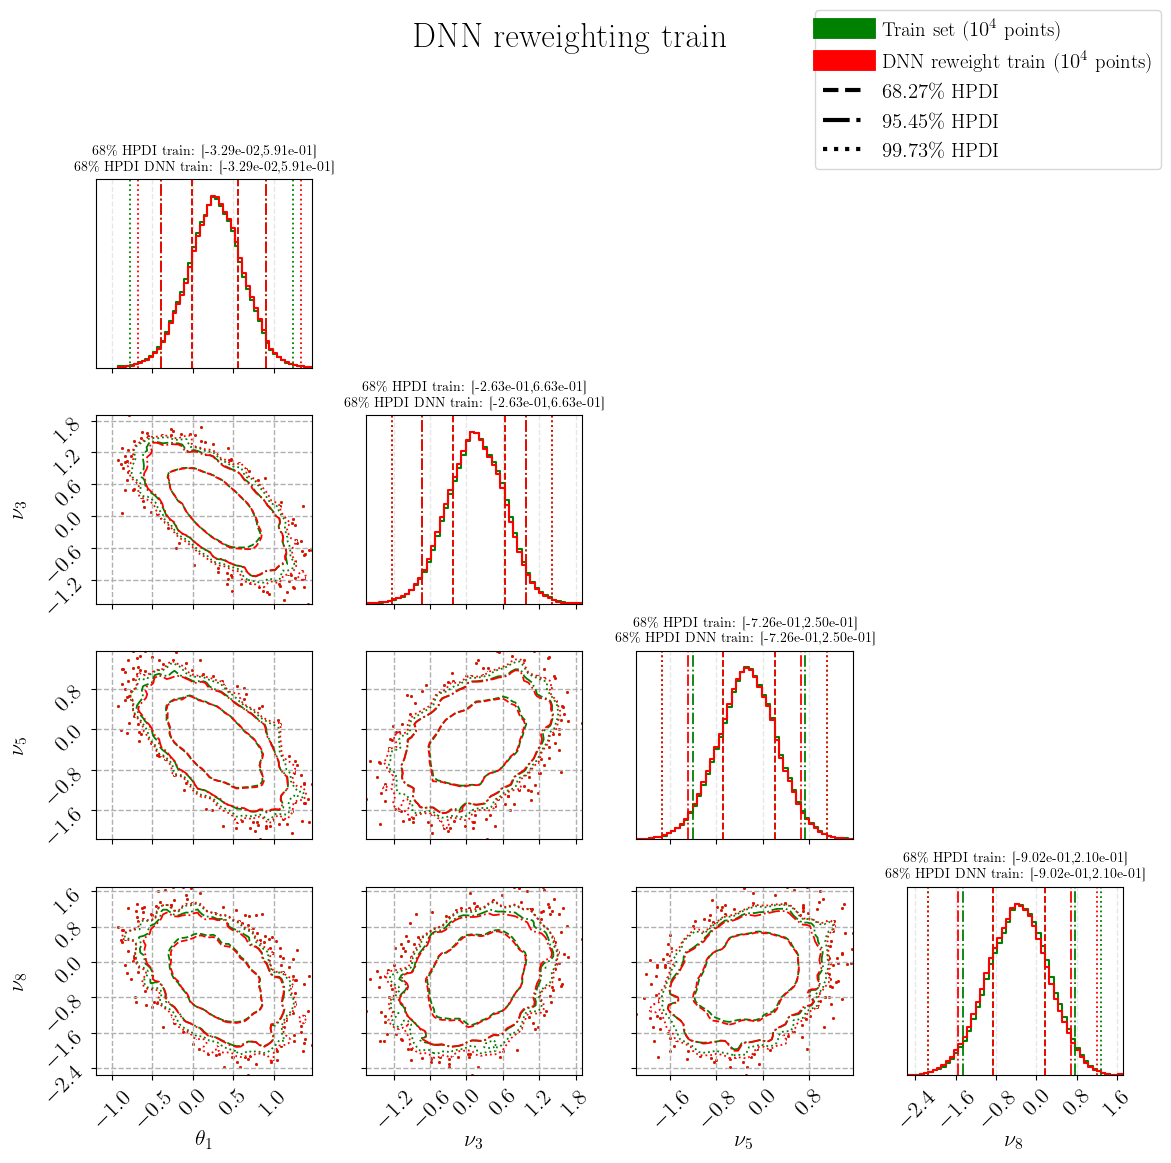

C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\DNNLikelihood_toy\figures\DNNLikelihood_toy_figure_corner_pars_train.pdf created and saved in 2.6057434999966063 s.
Plot done and saved in 2.6057434999966063 s.


In [138]:
import matplotlib.pyplot as plt
import matplotlib
from timeit import default_timer as timer
import seaborn as sns
from os import path
from datetime import datetime
from decimal import Decimal
from DNNLikelihood import inference, utils
from DNNLikelihood.show_prints import print
from DNNLikelihood.corner import extend_corner_range, corner, get_1d_hist
mplstyle_path = path.join(r"C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\source\DNNLikelihood\matplotlib.mplstyle")
sns.set()
kubehelix = sns.color_palette("cubehelix", 30)
reds = sns.color_palette("Reds", 30)
greens = sns.color_palette("Greens", 30)
blues = sns.color_palette("Blues", 30)
self = DNNLikelihood
verbose_sub = True
Y_pred_train, _ = self.model_predict(self.X_train, batch_size=self.batch_size,verbose=verbose_sub)
Y_pred_val, _ = self.model_predict(self.X_val, batch_size=self.batch_size,verbose=verbose_sub)
Y_pred_test, prediction_time = self.model_predict(self.X_test, batch_size=self.batch_size,verbose=verbose_sub)
[Y_train_exp, Y_val_exp, Y_test_exp, Y_pred_train_exp, Y_pred_val_exp, Y_pred_test_exp] = [np.exp(Y) for Y in [self.Y_train, self.Y_val, self.Y_test, Y_pred_train, Y_pred_val, Y_pred_test]]
[W_train, W_val, W_test] = [DNNLikelihood.utils.normalize_weights(W) for W in [Y_pred_train_exp/Y_train_exp, Y_pred_val_exp/Y_val_exp, Y_pred_test_exp/Y_test_exp]]
intervals = DNNLikelihood.inference.CI_from_sigma([1, 2, 3])
HPDI1_dic={"sample": "train", "type": "true"}
HPDI2_dic={"sample": "train", "type": "pred"}
pars=[0,3,5,8]
nndims = len(pars)
nbins = 50
samp1 = self.X_train[:,pars]
samp2 = self.X_train[:,pars]
W1 = None
W2 = W_train
ranges = DNNLikelihood.corner.extend_corner_range(self.X_train, self.X_train, pars, 0)
HPDI1 = [[self.predictions['HPDI'][str(par)][HPDI1_dic["type"]][HPDI1_dic["sample"]][str(interval)]["Intervals"] for interval in intervals] for par in pars]
HPDI2 = [[self.predictions['HPDI'][str(par)][HPDI2_dic["type"]][HPDI2_dic["sample"]][str(interval)]["Intervals"] for interval in intervals] for par in pars]
jtplot.reset()
plot_corners_2samp(self, self.X_train, self.X_train, W1=None, W2=W_train,
                                HPDI1_dic={"sample": "train", "type": "true"}, HPDI2_dic={"sample": "train", "type": "pred"},
                                pars = pars, pars_labels = "original",
                                title1 = "$68\%$ HPDI train", title2 = "$68\%$ HPDI DNN train",
                                color1 = "green", color2 = "red",
                                plot_title = "DNN reweighting train",
                                legend_labels = [r"Train set ($%s$ points)" % latex_float(len(self.X_train)),
                                                 r"DNN reweight train ($%s$ points)" % latex_float(len(self.X_train)),
                                                 r"$68.27\%$ HPDI", 
                                                 r"$95.45\%$ HPDI", 
                                                 r"$99.73\%$ HPDI"],
                                figure_filename=self.figure_corner_pars_train_file, 
                                verbose=True, show_plot=True)

## DnnLik_enseble

In [8]:
model_data_ensemble_kwargs = {"npoints_list": [[int(i/5) for i in j] for j in [[20000,10000],[10000,5000]]], 
                              "scalerX_list": [True],
                              "scalerY_list": [True],
                              "weighted_list": [False]}
model_define_ensemble_kwargs={"hid_layers_list": [[[300, "selu"], [300, "selu"],[300, "selu"]],[[500, "selu"], [500, "selu"],[500, "selu"]]],
                              "act_func_out_layer_list": ["linear"], 
                              "dropout_rate_list": [0],#,0.1],
                              "batch_norm_list": [True,False], 
                              "kernel_initializer_list": ['glorot_uniform']}
model_optimizers_ensemble_kwargs = [{"name": "Adam",
                                    "lr": 0.001, 
                                    "beta_1": 0.9, 
                                    "beta_2": 0.999, 
                                    "amsgrad": False},
                                    {"name": "SGD",
                                     "lr": 0.01, 
                                     "momentum": 0.0,
                                     "nesterov": False},
                                    "SGD"]
                                                        #{"SGD": {"lr": 0.01, 
                                                        #         "momentum": 0.0, 
                                                        #         "nesterov": False}},"adam"]}
model_compile_ensemble_kwargs={"losses_list": ["mse","R2_metric"],
                               "metrics": ["mse","msle","me","R2_metric"]}
#model_callbacks_ensemble_kwargs = {"callbacks_list": [[{"TensorBoard": {"histogram_freq": 1,
#                                                                        "profile_batch": 100000000},
#                                                        "EarlyStopping": {"monitor": "loss",
#                                                                         "mode": "min",
#                                                                         "patience": 100,
#                                                                         "min_delta": 0.0001,
#                                                                         "restore_best_weights": True}},
#                                                       {"ReduceLROnPlateau": {"monitor": "loss",
#                                                                             "mode": "min",
#                                                                             "factor": 0.2,
#                                                                             "min_lr": 0.00008,
#                                                                             "patience": 10,
#                                                                             "min_delta": 0.0001}},
#                                                       #{"ModelCheckpoint": {"filepath": "automatically set by the framework",
#                                                       #                    "monitor": "loss",
#                                                       #                    "mode": "min",
#                                                       #                    "save_best_only": True,
#                                                       #                    "save_freq": "epoch"}},
#                                                       "TerminateOnNaN"],
#                                                      [#{"PlotLossesKeras": {"fig_path": "automatically set by the framework"}},
#                                                       {"TensorBoard": {"histogram_freq": 1,
#                                                                       "profile_batch": 100000000},
#                                                        "ReduceLROnPlateau": {"monitor": "loss",
#                                                                             "mode": "min",
#                                                                             "factor": 0.2,
#                                                                             "min_lr": 0.00008,
#                                                                             "patience": 100,
#                                                                             "min_delta": 0.0001}},
#                                                       "ModelCheckpoint"]]}
model_callbacks_ensemble_kwargs = [[{"name": "TensorBoard",
                                     "histogram_freq": 1,
                                     "profile_batch": 100000000},
                                    {"name": "EarlyStopping",
                                     "monitor": "loss",
                                     "mode": "min",
                                     "patience": 100,
                                     "min_delta": 0.0001,
                                     "restore_best_weights": True},
                                    {"name": "ReduceLROnPlateau",
                                     "monitor": "loss",
                                     "mode": "min",
                                     "factor": 0.2,
                                     "min_lr": 0.00008,
                                     "patience": 10,
                                     "min_delta": 0.0001},
                                    {"name": "ModelCheckpoint",
                                     "filepath": "automatically set by the framework",
                                     "monitor": "loss",
                                     "mode": "min",
                                     "save_best_only": True,
                                     "save_freq": "epoch"},
                                    "TerminateOnNaN"],
                                   [{"name": "PlotLossesKeras",
                                     "fig_path": "automatically set by the framework"},
                                    {"name": "TensorBoard", 
                                     "histogram_freq": 1,
                                     "profile_batch": 100000000},
                                    {"name": "ReduceLROnPlateau",
                                     "monitor": "loss",
                                     "mode": "min",
                                     "factor": 0.2,
                                     "min_lr": 0.00008,
                                     "patience": 100,
                                     "min_delta": 0.0001},
                                    "ModelCheckpoint"]]
model_train_ensemble_kwargs={"epochs_list": [100],
                             "batch_size_list": [512,1024]}
#model_kwargs = {**models_data_kwargs, **models_define_kwargs, **models_compile_kwargs, **models_fit_kwargs}
#res = list(product_dict(**model_kwargs))
#type(res)

In [ ]:
def __check_model_optimizers_ensemble_kwargs(self):
    try:
        model_optimizers_ensemble_kwargs["optimizers_list"]
    except:
        print(
            "model_optimizers_kwargs dictionary should contain at least one keyword 'optimizers_list'")
        raise

In [6]:
all_kwargs = [[A, B, C, D, E, F] for A in model_data_ensemble_kwargs_list for B in model_define_ensemble_kwargs_list for C in model_optimizers_ensemble_kwargs_list for D in model_compile_ensemble_kwargs_list for E in model_callbacks_ensemble_kwargs_list for F in model_train_ensemble_kwargs_list]

In [ ]:
tmp = [{k.replace("optimizers_list", "optimizer"): v for k, v in i.items()} for i in model_optimizers_ensemble_kwargs]

In [3]:
DNNLik_ensemble1 = DNNLikelihood.DnnLikEnsemble(DNNLik_ensemble_input_folder=None,
                                                         ensemble_name=None,
                                                         data=None,
                                                         data_input_filename="outfiles/toy_data",
                                                         ensemble_folder="outfiles/DNNEnsemble",
                                                         load_on_RAM=False,
                                                         seed=1,
                                                         dtype = "float32",
                                                         same_data=True,
                                                         model_data_ensemble_kwargs=model_data_ensemble_kwargs,
                                                         model_define_ensemble_kwargs=model_define_ensemble_kwargs,
                                                         model_optimizers_ensemble_kwargs=model_optimizers_ensemble_kwargs,
                                                         model_compile_ensemble_kwargs=model_compile_ensemble_kwargs,
                                                         model_callbacks_ensemble_kwargs=model_callbacks_ensemble_kwargs,
                                                         model_train_ensemble_kwargs=model_train_ensemble_kwargs,
                                                         gpus_id_list="all",
                                                         verbose=True)

2 GPUs available
88 CPU cores available
2 GPUs available
2 GPUs have been set:
['/device:GPU:0', 'device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:3b:00.0, compute capability: 7.5']
['/device:GPU:1', 'device: 1, name: GeForce RTX 2080 Ti, pci bus id: 0000:af:00.0, compute capability: 7.5'] .
Working with float32 precision.
Loaded likelihood in 0.008108099999994067 .
Data json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.json saved in 0.001235499999999945 s.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.log saved in 0.0013415999999963901 s.
Ensemble folder outfiles/DNNEnsemble created.
Ensemble results will be saved in the folder outfiles/DNNEnsemble/ensemble .
Optimizer set to: optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
mse ok.
mse ok.
msle ok.
Exception for me .
Exception for me .
Exception for R2_

Added callback: callbacks.TensorBoard(log_dir = 'outfiles/DNNEnsemble/member_47/logs/fit', histogram_freq=1, profile_batch=100000000)
DNN Lik member 47 created in 0.004558899999999255 s.
Optimizer set to: optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
mse ok.
mse ok.
msle ok.
Exception for me .
Exception for me .
Exception for R2_metric .
Added callback: callbacks.TerminateOnNaN()
Added callback: callbacks.TensorBoard(log_dir = 'outfiles/DNNEnsemble/member_48/logs/fit', histogram_freq=1, profile_batch=100000000)
Added callback: callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.2, min_lr=8e-05, patience=10, min_delta=0.0001)
DNN Lik member 48 created in 0.00438429999999812 s.
Optimizer set to: optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
mse ok.
mse ok.
msle ok.
Exception for me .
Exception for me .
Exception for R2_metric .
Added callback: callbacks.TerminateOnNaN()
Added callback: callbacks.TensorBoard(log_dir = 'outfiles/DN

In [5]:
DNNLik_ensemble1.members[0]._DnnLik__model_data_member_kwargs

{'npoints': [4000, 2000, 4000],
 'scalerX': True,
 'scalerY': True,
 'weighted': False}

In [6]:
DNNLik_ensemble1.members[0]._DnnLik__model_define_member_kwargs

{'hid_layers': [[300, 'selu'], [300, 'selu'], [300, 'selu']],
 'act_func_out_layer': 'linear',
 'dropout_rate': 0,
 'batch_norm': True,
 'kernel_initializer': 'glorot_uniform'}

In [7]:
DNNLik_ensemble1.members[0]._DnnLik__model_optimizer_member_kwargs

{'optimizer': {'Adam': {'lr': 0.001,
   'beta_1': 0.9,
   'beta_2': 0.999,
   'amsgrad': False}}}

In [10]:
DNNLik_ensemble1.members[0]._DnnLik__model_compile_member_kwargs

{'loss': 'mse', 'metrics': ['mse', 'msle', 'me', 'R2_metric']}

In [11]:
DNNLik_ensemble1.members[0]._DnnLik__model_callbacks_member_kwargs

{'callbacks': [{'TensorBoard': {'histogram_freq': 1,
    'profile_batch': 100000000},
   'EarlyStopping': {'monitor': 'loss',
    'mode': 'min',
    'patience': 100,
    'min_delta': 0.0001,
    'restore_best_weights': True}},
  {'ReduceLROnPlateau': {'monitor': 'loss',
    'mode': 'min',
    'factor': 0.2,
    'min_lr': 8e-05,
    'patience': 10,
    'min_delta': 0.0001}},
  'TerminateOnNaN']}

In [12]:
DNNLik_ensemble1.members[0]._DnnLik__model_train_member_kwargs

{'epochs': 100,
 'batch_size': 512,
 'scaleX': False,
 'scaleY': False,
 'weighted': False}

## Drell-Yan Likelihood
Note on replicas - 
12: Nominal value - 
0-24: Scale variation - 
25-124: PDF uncertianties - 
125-126: $\alpha_{S}$

In [1]:
from timeit import default_timer as timer
import numpy as np
import pandas as pd
from pandas import DataFrame
import h5py
from scipy import stats, integrate, special
from matplotlib import pyplot as plt
from jupyterthemes import jtplot
jtplot.reset()

### Data

In [2]:
def import_hdf5(file):
    f=h5py.File(filename,'r')
    a_group_key = list(f.keys())[0]
    data=list(f[a_group_key])
    return np.array(data)

In [3]:
filename="Replicas.h5"

In [4]:
binsmass = np.array([300, 330, 365, 410, 460, 520, 590, 680, 790, 910, 1070, 
  1260, 1500, 1800, 2160, 2620, 3200, 3930])#, 13000])
nbins=len(binsmass)-1

In [5]:
Replicas_Ik=import_hdf5(filename)[:-1,:,:]
np.shape(Replicas_Ik)

(17, 6, 127)

In [6]:
_, ncoefficients, nreplicas = np.shape(Replicas_Ik)
ndims=nbins*ncoefficients
[(nbins,ncoefficients,nreplicas),(ndims,nreplicas)]

[(17, 6, 127), (102, 127)]

In [7]:
central_replica = 12
SV_replicas=range(0,25)
pdf_replicas=range(25,125)
alphaS_replicas=[125,126]

In [8]:
indexmap=np.array([[i,j] for i in range(nbins) for j in range(ncoefficients)])
inverseindexmap = np.reshape(np.arange(ndims),(nbins,ncoefficients))

In [9]:
Replicas_alpha=Replicas_Ik.reshape((nbins*ncoefficients,nreplicas))
print(Replicas_alpha.shape)

(102, 127)


### Central values

In [10]:
X_0_Ik=Replicas_Ik[:,:,central_replica]
print(X_0_Ik.shape)
X_0_alpha=Replicas_alpha[:,central_replica]
print(X_0_alpha.shape)

(17, 6)
(102,)


In [11]:
DataFrame(X_0_Ik)

0             1             2             3             4  \
0   0.184216  1.517587e+05  1.065344e+05  2.753730e+05 -3.781465e+05   
1   0.138947  1.846594e+05  1.309494e+05  3.397075e+05 -4.612373e+05   
2   0.110261  2.290047e+05  1.639447e+05  4.272421e+05 -5.734748e+05   
3   0.072962  2.884916e+05  2.076650e+05  5.437180e+05 -7.237511e+05   
4   0.051061  3.648163e+05  2.649054e+05  6.957505e+05 -9.158251e+05   
5   0.033842  4.676565e+05  3.402639e+05  8.962894e+05 -1.173810e+06   
6   0.023323  6.083513e+05  4.462601e+05  1.182706e+06 -1.532094e+06   
7   0.014338  8.118186e+05  5.979623e+05  1.589535e+06 -2.044540e+06   
8   0.007714  1.085336e+06  7.999941e+05  2.137434e+06 -2.742327e+06   
9   0.004846  1.458171e+06  1.081025e+06  2.910837e+06 -3.695857e+06   
10  0.002496  2.011585e+06  1.494477e+06  4.045962e+06 -5.112352e+06   
11  0.001275  2.801741e+06  2.085692e+06  5.682480e+06 -7.129812e+06   
12  0.000582  3.970876e+06  2.967590e+06  8.146662e+06 -1.014170e+07   
13  0.000231  5.677179e+06  4.250143e+06  1.178377e+07 -1.458282e+07   
14  0.000087  8.153897e+06  6.132919e+06  1.720345e+07 -2.101527e+07   
15  0.000027  1.188849e+07  8.994990e+06  2.568604e+07 -3.083669e+07   
16  0.000006  1.745166e+07  1.329548e+07  3.888894e+07 -4.570297e+07   

               5  
0   7.586696e+04  
1   9.103031e+04  
2   1.154168e+05  
3   1.408196e+05  
4   1.867541e+05  
5   2.313692e+05  
6   3.112481e+05  
7   4.237347e+05  
8   5.117327e+05  
9   7.200761e+05  
10  9.596567e+05  
11  1.334262e+06  
12  1.881778e+06  
13  2.464941e+06  
14  3.701391e+06  
15  5.230475e+06  
16  7.207113e+06

In [12]:
DataFrame(X_0_alpha)

0
0    1.842165e-01
1    1.517587e+05
2    1.065344e+05
3    2.753730e+05
4   -3.781465e+05
..            ...
97   1.745166e+07
98   1.329548e+07
99   3.888894e+07
100 -4.570297e+07
101  7.207113e+06

[102 rows x 1 columns]

### PDF Uncertainty

#### Select PDF replicas

In [13]:
X_pdfreplicas_Ik=Replicas_Ik[:,:,pdf_replicas]
print(X_pdfreplicas_Ik.shape)
X_pdfreplicas_alpha=Replicas_alpha[:,pdf_replicas]
print(X_pdfreplicas_alpha.shape)
X_pdfreplicas_alpha_norm = (X_pdfreplicas_alpha.T/X_0_alpha).T
print(X_pdfreplicas_alpha_norm.shape)

(17, 6, 100)
(102, 100)
(102, 100)


In [14]:
DataFrame(X_pdfreplicas_Ik[:,:,12])

0             1             2             3             4  \
0   0.180982  1.522240e+05  1.065780e+05  2.734867e+05 -3.782665e+05   
1   0.136350  1.852194e+05  1.310216e+05  3.374831e+05 -4.614613e+05   
2   0.108094  2.297486e+05  1.640449e+05  4.243636e+05 -5.737105e+05   
3   0.071450  2.894400e+05  2.078014e+05  5.400936e+05 -7.240994e+05   
4   0.049953  3.660416e+05  2.651239e+05  6.911981e+05 -9.163655e+05   
5   0.033083  4.692338e+05  3.405865e+05  8.905811e+05 -1.174540e+06   
6   0.022793  6.105266e+05  4.467682e+05  1.175039e+06 -1.532967e+06   
7   0.014020  8.147701e+05  5.986548e+05  1.579281e+06 -2.046218e+06   
8   0.007556  1.089741e+06  8.010284e+05  2.122357e+06 -2.744438e+06   
9   0.004759  1.464051e+06  1.082567e+06  2.891215e+06 -3.699447e+06   
10  0.002462  2.020924e+06  1.496887e+06  4.015970e+06 -5.118409e+06   
11  0.001266  2.815596e+06  2.089449e+06  5.638717e+06 -7.141548e+06   
12  0.000582  3.994812e+06  2.973374e+06  8.069037e+06 -1.015832e+07   
13  0.000234  5.718921e+06  4.260437e+06  1.164553e+07 -1.461368e+07   
14  0.000088  8.229346e+06  6.150262e+06  1.694130e+07 -2.107163e+07   
15  0.000027  1.203395e+07  9.026433e+06  2.513586e+07 -3.092883e+07   
16  0.000006  1.774647e+07  1.335719e+07  3.771552e+07 -4.589003e+07   

               5  
0   7.568565e+04  
1   9.087997e+04  
2   1.154815e+05  
3   1.410724e+05  
4   1.873371e+05  
5   2.321728e+05  
6   3.131315e+05  
7   4.258010e+05  
8   5.163659e+05  
9   7.253263e+05  
10  9.648245e+05  
11  1.337471e+06  
12  1.885730e+06  
13  2.460330e+06  
14  3.668401e+06  
15  5.199241e+06  
16  7.022499e+06

In [15]:
DataFrame(X_pdfreplicas_alpha[17])

0
0   115520.840504
1   116150.315455
2   115025.465537
3   115297.794715
4   115178.001596
..            ...
95  114196.769638
96  116002.810041
97  116345.433543
98  115860.099767
99  116635.966121

[100 rows x 1 columns]

In [16]:
DataFrame(X_pdfreplicas_alpha_norm[26])

0
0   0.999136
1   1.001268
2   0.999169
3   1.000520
4   1.000551
..       ...
95  0.998806
96  1.000145
97  0.999879
98  0.998643
99  0.999711

[100 rows x 1 columns]

#### Means

In [17]:
X_pdf_mu_alpha_norm = np.mean(X_pdfreplicas_alpha_norm,axis=1)
print(X_pdf_mu_alpha_norm.shape)

(102,)


In [18]:
X_pdf_mu_alpha_norm

array([1.00049207, 1.00013325, 1.00000322, 0.99970479, 0.99999866,
       0.99989997, 1.00052589, 1.00014912, 1.0000065 , 0.9996967 ,
       0.99999307, 0.9999898 , 1.00048655, 1.0001202 , 1.00002216,
       0.9997494 , 1.0000207 , 0.99987249, 1.00052703, 1.00013293,
       1.00002553, 0.99973268, 1.00002108, 0.99992187, 1.00056118,
       1.00019291, 1.00004427, 0.99965329, 1.00003087, 1.00003097,
       1.00054695, 1.0002252 , 1.00004041, 0.99959479, 1.0000206 ,
       0.99992344, 1.00050313, 1.00018403, 1.0001089 , 0.99965572,
       0.99997069, 1.00177846, 1.00040917, 1.0001502 , 1.00009479,
       0.99973082, 0.99998799, 1.00108891, 1.00085319, 1.0004448 ,
       0.99999919, 0.99915117, 1.00001836, 1.00000933, 1.0003526 ,
       1.00013963, 1.00002281, 0.99973524, 1.00002885, 1.00017769,
       1.00078774, 1.00047572, 1.00017325, 0.99935237, 1.0000193 ,
       1.00050471, 1.0005641 , 0.99994289, 1.00013731, 1.00017175,
       1.00020319, 1.00117591, 1.00096592, 1.00051212, 1.00022

In [19]:
#X_mu_alpha_norm

#### Covariance (eigenvectors and eigenvalues)

In [20]:
X_Sigma_pdf_alphabeta_norm = np.cov(X_pdfreplicas_alpha_norm)
print(X_Sigma_pdf_alphabeta_norm.shape)

(102, 102)


In [21]:
X_Sigma_pdf_alphabeta_norm[0]

array([ 3.18037715e-04, -2.91214368e-05, -6.02842991e-06,  6.29365762e-05,
       -2.74505397e-06, -4.51873558e-05,  3.15908359e-04, -3.05230748e-05,
       -5.44871305e-06,  6.28861752e-05, -3.78497112e-06, -3.04869919e-05,
        3.14605934e-04, -2.91484911e-05, -7.22677469e-06,  5.80687219e-05,
       -3.78757552e-06, -5.16127177e-05,  3.14117308e-04, -2.79345899e-05,
       -7.15330536e-06,  5.38869672e-05, -4.97872431e-06, -3.85353466e-05,
        3.08895889e-04, -2.92689147e-05, -7.41499997e-06,  5.48716321e-05,
       -4.89455664e-06, -4.15407566e-05,  3.03481503e-04, -2.73163821e-05,
       -8.24330737e-06,  5.02912769e-05, -4.61693718e-06, -6.08409112e-05,
        2.95016336e-04, -2.64384999e-05, -8.21847525e-06,  4.71687824e-05,
       -4.88111594e-06, -5.40631457e-05,  2.81853862e-04, -2.47181358e-05,
       -8.13677769e-06,  4.32992584e-05, -4.84483323e-06, -5.67173040e-05,
        2.60301243e-04, -2.63744310e-05, -7.29507173e-06,  4.52169406e-05,
       -5.40023139e-06, -

In [22]:
X_Sigma_pdf_alphabeta_norm_eigenval, X_Sigma_pdf_alphabeta_norm_eigenvec = np.linalg.eig(X_Sigma_pdf_alphabeta_norm)
X_Sigma_pdf_alphabeta_norm_eigenvec = X_Sigma_pdf_alphabeta_norm_eigenvec.T

In [23]:
X_Sigma_pdf_alphabeta_norm_eigenval

array([ 1.80591532e-02,  4.27822495e-03,  2.87101980e-03,  1.14573188e-03,
        5.56150667e-04,  2.19711081e-04,  1.38083706e-04,  6.59932482e-05,
        1.94075052e-05,  1.63234119e-05,  1.52934244e-05,  6.93414971e-06,
        5.47641988e-06,  4.45383124e-06,  3.26252649e-06,  1.93509301e-06,
        1.75868512e-06,  1.13522501e-06,  9.07149599e-07,  6.90999707e-07,
        5.04053703e-07,  4.52719627e-07,  3.38400220e-07,  2.51710900e-07,
        1.97792684e-07,  1.89658194e-07,  1.26728890e-07,  1.08582495e-07,
        1.02254241e-07,  9.26788605e-08,  7.06555213e-08,  6.51651025e-08,
        4.56551203e-08,  3.74074159e-08,  2.59066950e-08,  2.18976302e-08,
        1.94661381e-08,  1.78233227e-08,  1.08233482e-08,  9.77700947e-09,
        8.12849190e-09,  6.30980073e-09,  5.91957874e-09,  3.80447070e-09,
        3.35690467e-09,  2.62846045e-09,  2.13084166e-09,  1.74122716e-09,
        1.36183308e-09,  1.32032794e-09,  9.94181834e-10,  8.30147869e-10,
        6.20266599e-10,  

In [24]:
i=0
np.dot(X_Sigma_pdf_alphabeta_norm[:,:], X_Sigma_pdf_alphabeta_norm_eigenvec[i]) - X_Sigma_pdf_alphabeta_norm_eigenval[i] * X_Sigma_pdf_alphabeta_norm_eigenvec[i] 

array([-6.77626358e-18,  2.50044126e-18,  3.70661618e-18, -1.08420217e-18,
        5.42101086e-20,  1.30104261e-18, -2.33103467e-18,  1.49077799e-19,
        4.74338450e-20, -4.06575815e-19,  5.75982404e-20, -1.73472348e-18,
       -3.03576608e-18,  1.89735380e-19,  3.38813179e-20, -5.69206141e-19,
        4.40457133e-20, -2.16840434e-19, -3.03576608e-18,  2.16840434e-19,
        2.03287907e-20, -1.89735380e-19,  3.04931861e-20, -4.33680869e-19,
       -3.25260652e-18,  8.80914265e-20,  4.74338450e-20, -4.33680869e-19,
        3.38813179e-20, -1.08420217e-18, -2.16840434e-18,  1.76182853e-19,
        3.04931861e-20, -4.20128342e-19,  3.04931861e-20,  2.16840434e-19,
       -2.81892565e-18,  1.76182853e-19,  3.72694497e-20, -1.49077799e-19,
        5.42101086e-20, -7.58941521e-19, -3.68628739e-18,  1.69406589e-19,
        4.74338450e-20, -3.52365706e-19,  5.75982404e-20, -2.16840434e-19,
       -2.60208521e-18,  3.04931861e-20,  1.69406589e-20, -4.20128342e-19,
        3.55753838e-20,  

In [25]:
X_Sigma_pdf_alphabeta_norm_eigenvec[0]

array([ 1.46809332e-02, -1.76486127e-03,  1.90510615e-03,  5.07736648e-03,
       -1.64330950e-03,  6.70062732e-02,  2.08032668e-02, -1.97656510e-03,
        1.49930928e-03,  5.14242909e-03, -1.46627830e-03,  6.38389544e-02,
        2.81176060e-02, -1.98225939e-03,  1.84608554e-03,  5.61329846e-03,
       -1.58803023e-03,  6.50068941e-02,  3.79359074e-02, -1.82783735e-03,
        1.58130385e-03,  5.66420858e-03, -7.80806871e-04,  5.29450079e-02,
        4.87110666e-02, -1.88320347e-03,  1.48795586e-03,  5.28784414e-03,
       -1.25417028e-03,  5.46306566e-02,  6.19122003e-02, -1.46865572e-03,
        1.64229813e-03,  4.91540078e-03, -1.13905321e-03,  5.59677904e-02,
        7.81628560e-02, -1.25835028e-03,  1.36829740e-03,  4.61650492e-03,
       -9.27831436e-04,  4.88218510e-02,  9.78551289e-02, -1.01942702e-03,
        1.75321459e-03,  4.65981859e-03, -1.05140953e-03,  5.24061746e-02,
        1.18723936e-01, -1.24189349e-03,  1.45470284e-03,  5.33076654e-03,
       -5.32904427e-04,  

In [26]:
Sigma_pdf_alphabeta_norm = np.array([[np.log(X_Sigma_pdf_alphabeta_norm[i,j]/X_pdf_mu_alpha_norm[i]/X_pdf_mu_alpha_norm[j]+1) for i in range(len(X_pdf_mu_alpha_norm))] for j in range(len(X_pdf_mu_alpha_norm))])
Sigma_pdf_alphabeta_norm.shape

(102, 102)

In [27]:
Sigma_pdf_alphabeta_norm[17]

array([-5.15952430e-05,  7.54063363e-06,  4.76957332e-06, -1.44917434e-05,
       -1.50244238e-06,  1.10527698e-04, -4.25846607e-05,  7.25856008e-06,
        4.28762436e-06, -1.34900918e-05, -7.18757618e-07,  1.03072728e-04,
       -3.10647171e-05,  7.37118480e-06,  5.13299441e-06, -1.22759902e-05,
       -1.04819178e-06,  1.10601239e-04, -1.63077089e-05,  7.25634927e-06,
        4.61275958e-06, -1.10128020e-05,  3.72000502e-07,  8.98417233e-05,
        1.32592860e-06,  7.20076390e-06,  4.71017255e-06, -1.09339296e-05,
       -1.30442605e-07,  9.31547015e-05,  2.30249271e-05,  7.18334653e-06,
        5.15346092e-06, -9.95468056e-06,  7.47730545e-08,  9.75347978e-05,
        5.07118077e-05,  7.35472894e-06,  4.78069833e-06, -9.52961532e-06,
        5.99007265e-07,  8.28232189e-05,  8.44980313e-05,  7.16047437e-06,
        5.20524661e-06, -8.25063841e-06,  7.22409394e-07,  8.21443174e-05,
        1.22775508e-04,  7.40655686e-06,  4.62262518e-06, -8.16569579e-06,
        1.26154173e-06,  

In [28]:
Sigma_pdf_alphabeta_norm_eigenval, Sigma_pdf_alphabeta_norm_eigenvec = np.linalg.eig(Sigma_pdf_alphabeta_norm)
Sigma_pdf_alphabeta_norm_eigenvec = Sigma_pdf_alphabeta_norm_eigenvec.T

In [29]:
Sigma_pdf_alphabeta_norm_eigenval

array([ 1.78190854e-02,  4.23637856e-03,  2.86542412e-03,  1.14655647e-03,
        5.52186703e-04,  2.18879165e-04,  1.37106771e-04,  6.56460465e-05,
        1.90060551e-05,  1.60857142e-05,  1.51070813e-05,  6.86804391e-06,
        4.49666943e-06,  4.29566862e-06,  2.86724788e-06,  1.81180901e-06,
        1.56719705e-06,  1.11315685e-06,  8.84244305e-07,  6.03781298e-07,
        4.86642100e-07,  4.29666437e-07,  3.25656572e-07,  2.22216343e-07,
        1.92492094e-07, -1.32637815e-07,  1.65912622e-07, -8.40503245e-08,
        1.06554588e-07,  9.74761458e-08,  8.03822796e-08,  6.25522657e-08,
        4.99046835e-08,  4.06943230e-08,  2.89564833e-08, -1.65197504e-08,
        2.11497943e-08,  1.99967528e-08,  1.64475745e-08, -1.04642575e-08,
        1.11094308e-08,  9.73220146e-09,  9.57713401e-09,  6.28947090e-09,
        5.46006576e-09, -3.61689139e-09,  3.92006806e-09,  2.70313944e-09,
        2.25408313e-09,  1.62514422e-09,  1.48743194e-09,  1.33490203e-09,
        1.24333142e-09, -

In [30]:
i=0
np.dot(Sigma_pdf_alphabeta_norm[:,:], Sigma_pdf_alphabeta_norm_eigenvec[i]) - Sigma_pdf_alphabeta_norm_eigenval[i] * Sigma_pdf_alphabeta_norm_eigenvec[i] 

array([ 4.49943902e-18, -5.82758668e-19, -2.66984785e-18,  3.11708125e-19,
        6.77626358e-21,  4.33680869e-19,  0.00000000e+00, -2.03287907e-20,
        1.01643954e-20,  2.71050543e-20, -6.77626358e-21,  2.16840434e-19,
        1.08420217e-18,  5.42101086e-20,  4.06575815e-20,  1.08420217e-19,
       -5.42101086e-20,  1.73472348e-18,  5.42101086e-19, -6.77626358e-20,
        6.43745040e-20,  2.16840434e-19, -1.86347248e-20,  1.51788304e-18,
        1.40946282e-18, -1.15196481e-19, -2.03287907e-20, -5.42101086e-20,
       -5.42101086e-20,  4.33680869e-19,  1.95156391e-18, -5.42101086e-20,
        4.74338450e-20, -6.77626358e-20, -1.69406589e-20,  1.08420217e-18,
        2.16840434e-18, -3.38813179e-21,  2.03287907e-20,  8.13151629e-20,
       -6.77626358e-21,  1.62630326e-18,  1.08420217e-18,  3.04931861e-20,
        3.38813179e-20,  1.35525272e-20, -4.74338450e-20,  1.19262239e-18,
        1.73472348e-18,  2.37169225e-20,  2.03287907e-20,  5.42101086e-20,
       -2.54109884e-20,  

In [31]:
Sigma_pdf_alphabeta_norm_eigenvec[0]

array([ 1.50838245e-02, -1.76874922e-03,  1.92202581e-03,  5.09773336e-03,
       -1.65694180e-03,  6.75552256e-02,  2.12473447e-02, -1.98669387e-03,
        1.51669095e-03,  5.17317875e-03, -1.47708366e-03,  6.43937924e-02,
        2.86226549e-02, -1.98803236e-03,  1.86303835e-03,  5.63997229e-03,
       -1.60042073e-03,  6.55495736e-02,  3.85201035e-02, -1.83148001e-03,
        1.59599787e-03,  5.68880922e-03, -7.88763061e-04,  5.34295505e-02,
        4.93761896e-02, -1.89199169e-03,  1.50319067e-03,  5.32131281e-03,
       -1.26366727e-03,  5.51093138e-02,  6.26864640e-02, -1.47405982e-03,
        1.65829832e-03,  4.94675653e-03, -1.14576141e-03,  5.64227712e-02,
        7.90762824e-02, -1.25901416e-03,  1.38250163e-03,  4.64127661e-03,
       -9.31946634e-04,  4.91070747e-02,  9.89420123e-02, -1.01538551e-03,
        1.76972891e-03,  4.68006866e-03, -1.05277110e-03,  5.26949865e-02,
        1.19927663e-01, -1.23982834e-03,  1.47225773e-03,  5.35959417e-03,
       -5.34098668e-04,  

In [32]:
df=DataFrame(np.array([np.sqrt(Sigma_pdf_alphabeta_norm_eigenval),Sigma_pdf_alphabeta_norm_eigenval,np.sqrt(X_Sigma_pdf_alphabeta_norm_eigenval),X_Sigma_pdf_alphabeta_norm_eigenval,np.abs(1-np.sqrt(X_Sigma_pdf_alphabeta_norm_eigenval)/np.sqrt(Sigma_pdf_alphabeta_norm_eigenval))]).T)
pd.set_option('display.max_rows', df.shape[0]+1)
df

C:\Users\Admin\Anaconda3\envs\TensorFlow2-GPU\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


0             1             2             3         4
0    1.334881e-01  1.781909e-02  1.343843e-01  1.805915e-02  0.006714
1    6.508747e-02  4.236379e-03  6.540814e-02  4.278225e-03  0.004927
2    5.352966e-02  2.865424e-03  5.358190e-02  2.871020e-03  0.000976
3    3.386084e-02  1.146556e-03  3.384866e-02  1.145732e-03  0.000360
4    2.349865e-02  5.521867e-04  2.358285e-02  5.561507e-04  0.003583
5    1.479457e-02  2.188792e-04  1.482265e-02  2.197111e-04  0.001899
6    1.170926e-02  1.371068e-04  1.175090e-02  1.380837e-04  0.003556
7    8.102225e-03  6.564605e-05  8.123623e-03  6.599325e-05  0.002641
8    4.359593e-03  1.900606e-05  4.405395e-03  1.940751e-05  0.010506
9    4.010700e-03  1.608571e-05  4.040224e-03  1.632341e-05  0.007361
10   3.886783e-03  1.510708e-05  3.910681e-03  1.529342e-05  0.006149
11   2.620695e-03  6.868044e-06  2.633277e-03  6.934150e-06  0.004801
12   2.120535e-03  4.496669e-06  2.340175e-03  5.476420e-06  0.103578
13   2.072599e-03  4.295669e-06  2.110410e-03  4.453831e-06  0.018243
14   1.693295e-03  2.867248e-06  1.806247e-03  3.262526e-06  0.066705
15   1.346035e-03  1.811809e-06  1.391076e-03  1.935093e-06  0.033462
16   1.251877e-03  1.567197e-06  1.326154e-03  1.758685e-06  0.059332
17   1.055062e-03  1.113157e-06  1.065469e-03  1.135225e-06  0.009864
18   9.403427e-04  8.842443e-07  9.524440e-04  9.071496e-07  0.012869
19   7.770337e-04  6.037813e-07  8.312639e-04  6.909997e-07  0.069791
20   6.975974e-04  4.866421e-07  7.099674e-04  5.040537e-07  0.017732
21   6.554895e-04  4.296664e-07  6.728444e-04  4.527196e-07  0.026476
22   5.706633e-04  3.256566e-07  5.817218e-04  3.384002e-07  0.019378
23   4.713983e-04  2.222163e-07  5.017080e-04  2.517109e-07  0.064297
24   4.387392e-04  1.924921e-07  4.447389e-04  1.977927e-07  0.013675
25            NaN -1.326378e-07  4.354976e-04  1.896582e-07       NaN
26   4.073237e-04  1.659126e-07  3.559900e-04  1.267289e-07  0.126027
27            NaN -8.405032e-08  3.295186e-04  1.085825e-07       NaN
28   3.264270e-04  1.065546e-07  3.197722e-04  1.022542e-07  0.020387
29   3.122117e-04  9.747615e-08  3.044320e-04  9.267886e-08  0.024918
30   2.835177e-04  8.038228e-08  2.658111e-04  7.065552e-08  0.062453
31   2.501045e-04  6.255227e-08  2.552746e-04  6.516510e-08  0.020672
32   2.233936e-04  4.990468e-08  2.136706e-04  4.565512e-08  0.043524
33   2.017283e-04  4.069432e-08  1.934100e-04  3.740742e-08  0.041236
34   1.701660e-04  2.895648e-08  1.609556e-04  2.590669e-08  0.054126
35            NaN -1.651975e-08  1.479785e-04  2.189763e-08       NaN
36   1.454297e-04  2.114979e-08  1.395211e-04  1.946614e-08  0.040628
37   1.414099e-04  1.999675e-08  1.335040e-04  1.782332e-08  0.055907
38   1.282481e-04  1.644757e-08  1.040353e-04  1.082335e-08  0.188796
39            NaN -1.046426e-08  9.887876e-05  9.777009e-09       NaN
40   1.054013e-04  1.110943e-08  9.015815e-05  8.128492e-09  0.144620
41   9.865192e-05  9.732201e-09  7.943425e-05  6.309801e-09  0.194803
42   9.786283e-05  9.577134e-09  7.693880e-05  5.919579e-09  0.213810
43   7.930618e-05  6.289471e-09  6.168039e-05  3.804471e-09  0.222250
44   7.389226e-05  5.460066e-09  5.793880e-05  3.356905e-09  0.215902
45            NaN -3.616891e-09  5.126851e-05  2.628460e-09       NaN
46   6.261045e-05  3.920068e-09  4.616104e-05  2.130842e-09  0.262726
47   5.199172e-05  2.703139e-09  4.172801e-05  1.741227e-09  0.197410
48   4.747719e-05  2.254083e-09  3.690302e-05  1.361833e-09  0.222721
49   4.031308e-05  1.625144e-09  3.633632e-05  1.320328e-09  0.098647
50   3.856724e-05  1.487432e-09  3.153065e-05  9.941818e-10  0.182450
51   3.653631e-05  1.334902e-09  2.881229e-05  8.301479e-10  0.211407
52   3.526091e-05  1.243331e-09  2.490515e-05  6.202666e-10  0.293689
53            NaN -8.506007e-10  2.256257e-05  5.090694e-10       NaN
54   2.878061e-05  8.283232e-10  2.166953e-05  4.695685e-10  0.247079
55   2.314500e-05  5.356912e-10  1.919506e-05  3.684503e-10  0.170661
56   2.168552e-05  4.70261

In [33]:
nnuis_pdf = 18
nuis_pdf_sign=np.array([-1,1,1,-1,-1,1,-1,1,-1,1,-1,-1,1,1,-1,1,-1,-1])
Sigma_pdf_alphabeta_norm_eigenval_reduced = Sigma_pdf_alphabeta_norm_eigenval[:nnuis_pdf]
Sigma_pdf_alphabeta_norm_eigenvec_reduced = (nuis_pdf_sign*Sigma_pdf_alphabeta_norm_eigenvec[:nnuis_pdf].T).T

In [34]:
Sigma_pdf_alphabeta_norm_eigenval_reduced

array([1.78190854e-02, 4.23637856e-03, 2.86542412e-03, 1.14655647e-03,
       5.52186703e-04, 2.18879165e-04, 1.37106771e-04, 6.56460465e-05,
       1.90060551e-05, 1.60857142e-05, 1.51070813e-05, 6.86804391e-06,
       4.49666943e-06, 4.29566862e-06, 2.86724788e-06, 1.81180901e-06,
       1.56719705e-06, 1.11315685e-06])

In [35]:
DataFrame(Sigma_pdf_alphabeta_norm_eigenvec_reduced)

0         1         2         3         4         5         6    \
0  -0.015084  0.001769 -0.001922 -0.005098  0.001657 -0.067555 -0.021247   
1   0.177817 -0.002045 -0.000341  0.004647 -0.000799  0.003038  0.176747   
2   0.214232 -0.053322 -0.010579  0.115415 -0.004520 -0.064653  0.216158   
3   0.142899  0.004545  0.000241 -0.010481  0.001148 -0.049613  0.135889   
4   0.171387  0.037334  0.002343 -0.082748  0.006924 -0.126636  0.160491   
5  -0.006553  0.109383  0.020953 -0.233971  0.012109  0.081953  0.004168   
6  -0.228229 -0.045016  0.000767  0.104563 -0.007350  0.155738 -0.180330   
7  -0.013532 -0.117014 -0.014878  0.254508 -0.015964 -0.004976 -0.011341   
8  -0.140401  0.018633  0.007787 -0.033078 -0.001548  0.160985 -0.099280   
9  -0.091495  0.030382  0.001344 -0.062898  0.002010  0.088273 -0.087644   
10 -0.124773 -0.058934 -0.000622  0.130548 -0.011891  0.214170 -0.078267   
11 -0.186817 -0.081749 -0.015268  0.188226 -0.004990 -0.151081 -0.124854   
12  0.189713 -0.080237 -0.017793  0.154411 -0.010821 -0.196446  0.080186   
13 -0.051434 -0.007518  0.009845  0.020220 -0.001286  0.223358  0.030886   
14  0.178902 -0.057592  0.008732  0.127201 -0.017356  0.241858  0.101091   
15 -0.086625 -0.026887 -0.024522  0.058116  0.003779 -0.170980 -0.068355   
16  0.076807 -0.114259 -0.001098  0.260840 -0.014313  0.174580  0.098397   
17 -0.065887  0.048251 -0.005509 -0.107683  0.003193  0.045783 -0.051477   

         7         8         9    ...       92        93        94        95   \
0   0.001987 -0.001517 -0.005173  ...  0.005687 -0.054917  0.004387 -0.036061   
1  -0.003832  0.001067  0.007805  ...  0.004536 -0.082519  0.005525 -0.122601   
2  -0.053498 -0.011576  0.111273  ... -0.025134  0.181855 -0.025972  0.115096   
3   0.005060  0.000412 -0.011848  ...  0.061768 -0.297698  0.046273  0.128301   
4   0.039774  0.004104 -0.084723  ...  0.027618 -0.067018  0.030553  0.063878   
5   0.111355  0.020285 -0.228946  ... -0.033321  0.134628 -0.016338 -0.042997   
6  -0.039155 -0.000869  0.089705  ...  0.052200 -0.140130  0.039540  0.396290   
7  -0.114944 -0.016244  0.237268  ...  0.000034 -0.057016  0.032893 -0.360480   
8   0.019373 -0.000937 -0.036331  ... -0.027097  0.041682  0.008682 -0.537494   
9   0.023451  0.014470 -0.042388  ...  0.061276 -0.192960  0.048825 -0.167259   
10 -0.050356 -0.006181  0.108220  ... -0.061677  0.211604 -0.060126 -0.019864   
11 -0.067308  0.000743  0.150873  ... -0.007367  0.066567 -0.024661  0.067965   
12 -0.064854 -0.023758  0.114300  ...  0.041210 -0.041692  0.032517 -0.204721   
13  0.018060 -0.002702 -0.031039  ...  0.058507 -0.090017  0.041855 -0.015888   
14 -0.062073  0.005340  0.124989  ...  0.042808 -0.042993  0.023891  0.379263   
15 -0.012262 -0.009546  0.032724  ... -0.012597 -0.068913 -0.016220 -0.082057   
16 -0.058103  0.006086  0.136948  ...  0.065003 -0.194756  0.073674 -0.225333   
17  0.008387 -0.018256 -0.018044  ...  0.033543 -0.219744  0.024273 -0.082695   

         96        97        98        99        100       101  
0  -0.573612  0.042680  0.011158 -0.080988  0.008964 -0.063436  
1  -0.486652  0.008762 -0.012529 -0.063764 -0.000647 -0.374097  
2   0.192164 -0.101197 -0.020448  0.204460 -0.022097  0.226952  
3   0.171149  0.339941  0.130138 -0.512258  0.084247  0.377398  
4   0.245588 -0.120342 -0.056496  0.196216 -0.001135 -0.529724  
5  -0.014614 -0.154344 -0.067263  0.261265 -0.044518  0.378444  
6   0.180364  0.013215  0.025295  0.083824  0.070807 -0.256361  
7  -0.140816 -0.192544 -0.100938  0.238737 -0.054520  0.296797  
8   0.132250  0.114611 -0.038176 -0.329750  0.014572 -0.171559  
9  -0.035586 -0.096732 -0.027772  0.070214 -0.066226  0.116128  
10  0.088957  0.020715  0.079572  0.007957 -0.027639 -0.123236  
11 -0.045186  0.101324  0.001769 -0.172127  0.001762  0.014091  
12  0.114332  0.049513  0.081969 -0.045275  0.046522 -0.076157  
13 -0.223566  0.000295  0.077446  0.046040  0.071695  0.078362  
14 -0.236255 -0.041010  0.079349  0.011714  0.090

#### Nuisance parametrization

In [36]:
SM_indices=inverseindexmap[:,0]
c1_indices=inverseindexmap[:,1]
c2_indices=inverseindexmap[:,2]
c3_indices=inverseindexmap[:,3]
c4_indices=inverseindexmap[:,4]
c5_indices=inverseindexmap[:,5]

In [37]:
c2_indices

array([ 2,  8, 14, 20, 26, 32, 38, 44, 50, 56, 62, 68, 74, 80, 86, 92, 98])

In [38]:
#sigma_SM_0_I = X_0_alpha[SM_indices]
#c1_0_I = X_0_alpha[c1_indices]
#c2_0_I = X_0_alpha[c2_indices]
#c3_0_I = X_0_alpha[c3_indices]
#c4_0_I = X_0_alpha[c4_indices]
#c5_0_I = X_0_alpha[c5_indices]

In [39]:
#sigma_mu_SM_I = X_mu_alpha_norm[SM_indices]*sigma_SM_0_I
#c1_mu_I = X_mu_alpha_norm[c1_indices]*c1_0_I
#c2_mu_I = X_mu_alpha_norm[c2_indices]*c2_0_I
#c3_mu_I = X_mu_alpha_norm[c3_indices]*c3_0_I
#c4_mu_I = X_mu_alpha_norm[c4_indices]*c4_0_I
#c5_mu_I = X_mu_alpha_norm[c5_indices]*c5_0_I

In [40]:
def X_alpha(delta_pdf):
    delta_pdf = np.array(delta_pdf)
    tmp1 = np.array([Sigma_pdf_alphabeta_norm_eigenval_reduced[i]*Sigma_pdf_alphabeta_norm_eigenvec_reduced[i,:]*delta_pdf[i] for i in range(len(delta_pdf))])
    tmp2 = np.array([(Sigma_pdf_alphabeta_norm_eigenval_reduced[i]*Sigma_pdf_alphabeta_norm_eigenvec_reduced[i,:])**2 for i in range(len(delta_pdf))])
    return X_0_alpha*X_pdf_mu_alpha_norm*np.exp(np.sum(tmp1-1/2*tmp2,axis=0))

In [41]:
delta_pdf = np.ones(nnuis_pdf)
X_alpha(delta_pdf)[SM_indices]

array([1.84549909e-01, 1.39187200e-01, 1.10433205e-01, 7.30665709e-02,
       5.11246046e-02, 3.38748356e-02, 2.33370844e-02, 1.43386934e-02,
       7.71441049e-03, 4.84079472e-03, 2.49204021e-03, 1.27169106e-03,
       5.79776446e-04, 2.30593405e-04, 8.67006195e-05, 2.66022301e-05,
       6.50844265e-06])

In [42]:
delta_pdf = np.arange(1,nnuis_pdf+1)
X_alpha(delta_pdf)[SM_indices]

array([1.85029490e-01, 1.39552508e-01, 1.10723786e-01, 7.32594084e-02,
       5.12571245e-02, 3.39601028e-02, 2.33928391e-02, 1.43699065e-02,
       7.72905332e-03, 4.84791045e-03, 2.49440121e-03, 1.27209591e-03,
       5.79548463e-04, 2.30360105e-04, 8.65808911e-05, 2.65734204e-05,
       6.51008366e-06])

#### Nuisance pdf

In [43]:
def logprior_pdf(delta_pdf):
    return -np.log((2*np.pi)**(len(delta_pdf)/2))-1/2*np.sum(delta_pdf**2)

In [44]:
delta_pdf = np.arange(1,nnuis_pdf+1) # np.ones(18)#
logprior_pdf(delta_pdf)

-1071.040893597684

### Scale variation uncertainty

#### Select PDF replicas

In [45]:
X_SV_replicas_Ik=Replicas_Ik[:,:,SV_replicas]
X_SV_replicas_Ik.shape

(17, 6, 25)

In [46]:
DataFrame(X_SV_replicas_Ik[:,:,12])

0             1             2             3             4  \
0   0.184216  1.517587e+05  1.065344e+05  2.753730e+05 -3.781465e+05   
1   0.138947  1.846594e+05  1.309494e+05  3.397075e+05 -4.612373e+05   
2   0.110261  2.290047e+05  1.639447e+05  4.272421e+05 -5.734748e+05   
3   0.072962  2.884916e+05  2.076650e+05  5.437180e+05 -7.237511e+05   
4   0.051061  3.648163e+05  2.649054e+05  6.957505e+05 -9.158251e+05   
5   0.033842  4.676565e+05  3.402639e+05  8.962894e+05 -1.173810e+06   
6   0.023323  6.083513e+05  4.462601e+05  1.182706e+06 -1.532094e+06   
7   0.014338  8.118186e+05  5.979623e+05  1.589535e+06 -2.044540e+06   
8   0.007714  1.085336e+06  7.999941e+05  2.137434e+06 -2.742327e+06   
9   0.004846  1.458171e+06  1.081025e+06  2.910837e+06 -3.695857e+06   
10  0.002496  2.011585e+06  1.494477e+06  4.045962e+06 -5.112352e+06   
11  0.001275  2.801741e+06  2.085692e+06  5.682480e+06 -7.129812e+06   
12  0.000582  3.970876e+06  2.967590e+06  8.146662e+06 -1.014170e+07   
13  0.000231  5.677179e+06  4.250143e+06  1.178377e+07 -1.458282e+07   
14  0.000087  8.153897e+06  6.132919e+06  1.720345e+07 -2.101527e+07   
15  0.000027  1.188849e+07  8.994990e+06  2.568604e+07 -3.083669e+07   
16  0.000006  1.745166e+07  1.329548e+07  3.888894e+07 -4.570297e+07   

               5  
0   7.586696e+04  
1   9.103031e+04  
2   1.154168e+05  
3   1.408196e+05  
4   1.867541e+05  
5   2.313692e+05  
6   3.112481e+05  
7   4.237347e+05  
8   5.117327e+05  
9   7.200761e+05  
10  9.596567e+05  
11  1.334262e+06  
12  1.881778e+06  
13  2.464941e+06  
14  3.701391e+06  
15  5.230475e+06  
16  7.207113e+06

#### Max/Min - Mean/Var

In [47]:
X_SV_min_Ik = np.min(X_SV_replicas_Ik,axis=2)
print(X_SV_min_Ik.shape)
X_SV_max_Ik = np.max(X_SV_replicas_Ik,axis=2)
print(X_SV_max_Ik.shape)
X_SV_mu_Ik = np.mean(X_SV_replicas_Ik,axis=2)
print(X_SV_mu_Ik.shape)
X_SV_0_Ik = X_0_Ik
print(X_SV_0_Ik.shape)

(17, 6)
(17, 6)
(17, 6)
(17, 6)


In [48]:
DataFrame(X_SV_mu_Ik)

0             1             2             3             4  \
0   0.184306  1.517613e+05  1.065364e+05  2.753690e+05 -3.781419e+05   
1   0.139033  1.846610e+05  1.309520e+05  3.397079e+05 -4.612352e+05   
2   0.110346  2.290075e+05  1.639472e+05  4.272399e+05 -5.734739e+05   
3   0.073028  2.884942e+05  2.076676e+05  5.437164e+05 -7.237516e+05   
4   0.051113  3.648178e+05  2.649084e+05  6.957522e+05 -9.158270e+05   
5   0.033880  4.676621e+05  3.402655e+05  8.962775e+05 -1.173810e+06   
6   0.023351  6.083550e+05  4.462630e+05  1.182702e+06 -1.532100e+06   
7   0.014356  8.118254e+05  5.979636e+05  1.589518e+06 -2.044543e+06   
8   0.007724  1.085341e+06  7.999966e+05  2.137426e+06 -2.742338e+06   
9   0.004852  1.458174e+06  1.081026e+06  2.910826e+06 -3.695863e+06   
10  0.002499  2.011576e+06  1.494482e+06  4.045993e+06 -5.112370e+06   
11  0.001276  2.801739e+06  2.085686e+06  5.682467e+06 -7.129809e+06   
12  0.000582  3.970890e+06  2.967574e+06  8.146566e+06 -1.014165e+07   
13  0.000232  5.677122e+06  4.250137e+06  1.178388e+07 -1.458283e+07   
14  0.000087  8.153837e+06  6.132895e+06  1.720350e+07 -2.101521e+07   
15  0.000027  1.188850e+07  8.994916e+06  2.568571e+07 -3.083651e+07   
16  0.000007  1.745158e+07  1.329540e+07  3.888866e+07 -4.570263e+07   

               5  
0   7.591122e+04  
1   9.107302e+04  
2   1.154540e+05  
3   1.408517e+05  
4   1.867850e+05  
5   2.313917e+05  
6   3.112639e+05  
7   4.237449e+05  
8   5.117178e+05  
9   7.200699e+05  
10  9.596385e+05  
11  1.334202e+06  
12  1.881704e+06  
13  2.464806e+06  
14  3.701209e+06  
15  5.230123e+06  
16  7.207207e+06

In [49]:
sigma_SM_SV_min_I = X_SV_min_Ik[:,0]
print(sigma_SM_SV_min_I.shape)
sigma_SM_SV_max_I = X_SV_max_Ik[:,0]
print(sigma_SM_SV_max_I.shape)
sigma_SM_SV_mean_I = X_SV_mu_Ik[:,0]
print(sigma_SM_SV_mean_I.shape)
sigma_SM_0_I = X_SV_0_Ik[:,0]
print(sigma_SM_0_I.shape)

(17,)
(17,)
(17,)
(17,)


In [50]:
sigma_SM_0_I

array([1.84216471e-01, 1.38946611e-01, 1.10261199e-01, 7.29624066e-02,
       5.10610953e-02, 3.38421652e-02, 2.33234598e-02, 1.43378219e-02,
       7.71428871e-03, 4.84605671e-03, 2.49551446e-03, 1.27477600e-03,
       5.81570065e-04, 2.31489173e-04, 8.70780764e-05, 2.67105508e-05,
       6.49417795e-06])

In [51]:
sigma_SM_SV_min_I

array([1.79970860e-01, 1.36064625e-01, 1.08206877e-01, 7.17940249e-02,
       5.03544213e-02, 3.34486443e-02, 2.30614650e-02, 1.41524416e-02,
       7.59702803e-03, 4.76071290e-03, 2.44482437e-03, 1.24511275e-03,
       5.66061857e-04, 2.24430103e-04, 8.40438230e-05, 2.56392248e-05,
       6.19202452e-06])

In [52]:
sigma_SM_SV_var_I = np.max([np.abs(sigma_SM_SV_max_I-sigma_SM_0_I),np.abs(sigma_SM_SV_min_I-sigma_SM_0_I)],axis=0)**2
print(sigma_SM_SV_var_I.shape)

(17,)


In [53]:
sigma_SM_SV_var_I

array([1.80252119e-05, 9.28908921e-06, 5.43527077e-06, 2.07375201e-06,
       9.13102645e-07, 3.53039667e-07, 1.44318227e-07, 4.64498374e-08,
       1.68243147e-08, 8.20752489e-09, 2.69887653e-09, 8.79908903e-10,
       2.40504518e-10, 4.98304621e-11, 9.20669372e-12, 1.14773937e-12,
       9.12966942e-14])

#### Nuisance parametrization Gaussian

In [54]:
k_SV_I = np.sqrt(sigma_SM_SV_var_I)/sigma_SM_SV_mean_I
print(k_SV_I.shape)
k_SV_I

(17,)


array([0.02303567, 0.02192138, 0.02112788, 0.01971906, 0.01869501,
       0.01753763, 0.01626872, 0.01501283, 0.01679219, 0.01866991,
       0.02078982, 0.02323813, 0.0266309 , 0.03045546, 0.03480205,
       0.040061  , 0.04647385])

In [55]:
nnuis_SV = nbins

In [56]:
def Factor_SV_gaussian_I(delta_SV):
    return (1+k_SV_I*delta_SV)

In [57]:
delta_SV = np.ones(nnuis_SV)
Factor_SV_gaussian_I(delta_SV)

array([1.02303567, 1.02192138, 1.02112788, 1.01971906, 1.01869501,
       1.01753763, 1.01626872, 1.01501283, 1.01679219, 1.01866991,
       1.02078982, 1.02323813, 1.0266309 , 1.03045546, 1.03480205,
       1.040061  , 1.04647385])

#### Nuisance pdf Gaussian

In [58]:
def logprior_SV_gaussian(delta_SV):
    return -np.log((2*np.pi)**(len(delta_SV)/2))-1/2*np.sum(delta_SV**2)

In [59]:
delta_SV = np.ones(17)#np.arange(1,18) #
logprior_SV_gaussian(delta_SV)

-24.121955064479437

#### Nuisance parametrization Uniform

In [60]:
sigma_SV_min_I = sigma_SM_0_I-np.sqrt(3*sigma_SM_SV_var_I)
sigma_SV_max_I = sigma_SM_0_I+np.sqrt(3*sigma_SM_SV_var_I)

In [61]:
eta_SV_I = (sigma_SV_max_I-sigma_SV_min_I)/sigma_SM_0_I
print(eta_SV_I.shape)
phi_SV_I = (sigma_SV_min_I)/sigma_SM_0_I
print(phi_SV_I.shape)

(17,)
(17,)


In [62]:
def Factor_SV_Uniform_I(delta_SV):
    return ((1+delta_SV)/2*eta_SV_I+phi_SV_I)

In [63]:
delta_SV = np.ones(nnuis_SV)
Factor_SV_Uniform_I(delta_SV)

array([1.03991833, 1.03799262, 1.03662254, 1.03418534, 1.03241383,
       1.03040985, 1.02821163, 1.02603572, 1.02912282, 1.0323801 ,
       1.0360572 , 1.04030376, 1.04618705, 1.05281745, 1.06035367,
       1.06947034, 1.08058681])

#### Nuisance pdf Uniform

In [64]:
def smooth_uniform(x):
    x = np.array([x]).reshape(-1)
    return np.array([integrate.quad(lambda y: stats.uniform.pdf(x-y,loc=-1,scale=2)*stats.norm.pdf(y, loc=0, scale=1/5.),-np.inf,np.inf)[0] for x in x])

In [65]:
min_SV, max_SV = [-1,1]
smooth_factor_SV = 1/5.
def smooth_uniform(x,min,max,smooth_factor):
    if max<=min:
        raise("Max should be greater than min.")
    return 1/2/(max-min)*(special.erf(1/np.sqrt(2)/smooth_factor*(max-x))-special.erf(1/np.sqrt(2)/smooth_factor*(min-x)))

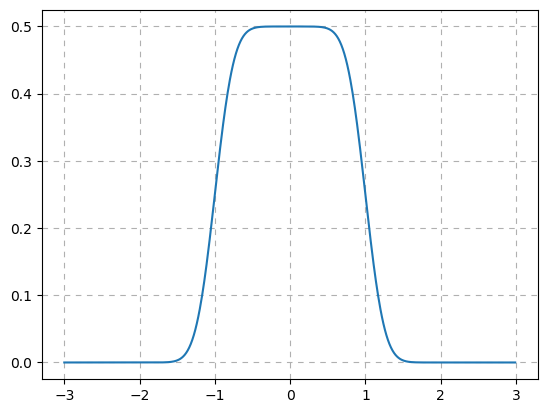

In [66]:
n=300
oom=int(10**round(np.log10(n)))
x=np.arange(-n,n)/oom
plt.plot(x,smooth_uniform(x,min_SV,max_SV,smooth_factor_SV))
plt.grid(linestyle="--", dashes=(5, 5))
plt.show()

In [67]:
def logprior_SV_uniform(delta_SV):
    return np.sum(np.log(smooth_uniform(delta_SV,min_SV,max_SV,smooth_factor_SV)))

In [68]:
delta_SV = np.ones(nnuis_SV)
logprior_SV_uniform(delta_SV)

-23.56700413903814

### $\alpha_{S}$ uncertainty

#### Select PDF replicas

In [69]:
X_aplhaS_replicas_Ik=Replicas_Ik[:,:,alphaS_replicas]
print(X_aplhaS_replicas_Ik.shape)
X_alphaS_0_Ik = X_0_Ik
print(X_alphaS_0_Ik.shape)

(17, 6, 2)
(17, 6)


#### Max/Min Mean/Variance

In [70]:
X_alphaS_min_Ik = np.min(X_aplhaS_replicas_Ik,axis=2)
print(X_alphaS_min_Ik.shape)
X_alphaS_max_Ik = np.max(X_aplhaS_replicas_Ik,axis=2)
print(X_alphaS_max_Ik.shape)
X_alphaS_mu_Ik = np.mean(X_aplhaS_replicas_Ik,axis=2)
print(X_alphaS_mu_Ik.shape)
X_alphaS_0_Ik = X_0_Ik
print(X_alphaS_0_Ik.shape)

(17, 6)
(17, 6)
(17, 6)
(17, 6)


In [71]:
DataFrame(X_alphaS_min_Ik)

0             1             2             3             4  \
0   0.183223  1.517039e+05  1.065179e+05  2.753845e+05 -3.781728e+05   
1   0.138265  1.845874e+05  1.309293e+05  3.397114e+05 -4.612620e+05   
2   0.109779  2.289204e+05  1.639240e+05  4.272525e+05 -5.734957e+05   
3   0.072695  2.883896e+05  2.076399e+05  5.437171e+05 -7.237781e+05   
4   0.050910  3.646910e+05  2.648776e+05  6.957522e+05 -9.158613e+05   
5   0.033768  4.675130e+05  3.402270e+05  8.962702e+05 -1.173832e+06   
6   0.023294  6.082020e+05  4.462251e+05  1.182610e+06 -1.532075e+06   
7   0.014334  8.116445e+05  5.979057e+05  1.589507e+06 -2.044505e+06   
8   0.007721  1.085138e+06  7.999218e+05  2.137351e+06 -2.742340e+06   
9   0.004855  1.457890e+06  1.080919e+06  2.910850e+06 -3.695780e+06   
10  0.002498  2.011203e+06  1.494359e+06  4.046076e+06 -5.112153e+06   
11  0.001275  2.801006e+06  2.085517e+06  5.683682e+06 -7.129828e+06   
12  0.000581  3.969959e+06  2.967314e+06  8.149241e+06 -1.014151e+07   
13  0.000231  5.675482e+06  4.249732e+06  1.178842e+07 -1.458187e+07   
14  0.000087  8.149597e+06  6.131661e+06  1.721716e+07 -2.101399e+07   
15  0.000027  1.187985e+07  8.992558e+06  2.571384e+07 -3.083026e+07   
16  0.000006  1.742769e+07  1.329044e+07  3.896214e+07 -4.569460e+07   

               5  
0   7.555166e+04  
1   9.066200e+04  
2   1.150388e+05  
3   1.403597e+05  
4   1.862674e+05  
5   2.307904e+05  
6   3.107424e+05  
7   4.231288e+05  
8   5.107784e+05  
9   7.191217e+05  
10  9.587974e+05  
11  1.333446e+06  
12  1.880945e+06  
13  2.464593e+06  
14  3.698262e+06  
15  5.229939e+06  
16  7.192630e+06

In [72]:
sigma_SM_alphaS_min_I = X_alphaS_min_Ik[:,0]
print(sigma_SM_alphaS_min_I.shape)
sigma_SM_alphaS_max_I = X_alphaS_max_Ik[:,0]
print(sigma_SM_alphaS_max_I.shape)
sigma_SM_alphaS_mu_I = X_alphaS_mu_Ik[:,0]
print(sigma_SM_alphaS_mu_I.shape)
sigma_SM_0_I = X_SV_0_Ik[:,0]
print(sigma_SM_0_I.shape)

(17,)
(17,)
(17,)
(17,)


In [73]:
sigma_SM_alphaS_max_I

array([1.86001776e-01, 1.40205081e-01, 1.11178972e-01, 7.35166795e-02,
       5.14101271e-02, 3.40461610e-02, 2.34438356e-02, 1.43976339e-02,
       7.73888325e-03, 4.85622086e-03, 2.50383290e-03, 1.28094725e-03,
       5.85456470e-04, 2.33557548e-04, 8.80839657e-05, 2.70967827e-05,
       6.60666461e-06])

In [74]:
var_alphaS_I = np.max([np.abs(sigma_SM_alphaS_max_I-sigma_SM_0_I),np.abs(sigma_SM_alphaS_min_I-sigma_SM_0_I)],axis=0)**2
print(var_alphaS_I.shape)

(17,)


In [75]:
var_alphaS_I

array([3.18731273e-06, 1.58374571e-06, 8.42307333e-07, 3.07218513e-07,
       1.21823253e-07, 4.16142931e-08, 1.44903215e-08, 3.57747549e-09,
       6.04891412e-10, 1.03309957e-10, 6.91965904e-11, 3.80843319e-11,
       1.51041434e-11, 4.27817741e-12, 1.01181330e-12, 1.49175017e-13,
       1.26532492e-14])

#### Nuisance parametrization Gaussian

In [76]:
nnuis_alphaS = 1

In [77]:
k_alphaS_I = np.sqrt(var_alphaS_I)/sigma_SM_0_I
print(k_alphaS_I.shape)
k_alphaS_I

(17,)


array([0.00969134, 0.00905722, 0.00832363, 0.00759669, 0.00683557,
       0.00602786, 0.00516114, 0.00417162, 0.00318818, 0.00209741,
       0.00333336, 0.00484105, 0.00668261, 0.00893509, 0.01155158,
       0.0144599 , 0.01732115])

In [78]:
def Factor_alphaS_I(delta_alphaS):
    return (1+k_alphaS_I*delta_alphaS)

In [79]:
delta_alphaS = 1
Factor_alphaS_I(delta_alphaS)

array([1.00969134, 1.00905722, 1.00832363, 1.00759669, 1.00683557,
       1.00602786, 1.00516114, 1.00417162, 1.00318818, 1.00209741,
       1.00333336, 1.00484105, 1.00668261, 1.00893509, 1.01155158,
       1.0144599 , 1.01732115])

#### Nuisance pdf Gaussian

In [80]:
def logprior_alphaS(delta_alphaS):
    return -np.log(np.sqrt(2*np.pi))-1/2*delta_alphaS**2

In [81]:
delta_alphaS = 1#np.arange(1,18) #
logprior_alphaS(delta_alphaS)

-1.4189385332046727

### Experimental systematics

#### Nuisance parametrization Gaussian

In [82]:
nnuis_Syst = nbins

In [83]:
k_Syst_I = np.full(nnuis_Syst,0.02)
print(k_Syst_I.shape)
k_Syst_I

(17,)


array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

In [84]:
def Factor_Syst_I(delta_Syst):
    if len(delta_Syst) != nnuis_Syst:
        raise Exception("Incorrect number of experimental systematics nuisance parameters.")
    return (1+k_Syst_I*delta_Syst)

In [85]:
delta_Syst = np.ones(nnuis_Syst)
Factor_Syst_I(delta_Syst)

array([1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02,
       1.02, 1.02, 1.02, 1.02, 1.02, 1.02])

#### Nuisance pdf Gaussian

In [86]:
def logprior_Syst(delta_Syst):
    if len(delta_Syst) != nnuis_Syst:
        raise Exception(
            "Incorrect number of experimental systematics nuisance parameters.")
    return -np.log((2*np.pi)**(len(delta_Syst)/2))-1/2*np.sum(delta_Syst**2)

In [87]:
delta_Syst = np.ones(17)#np.arange(1,18) #
logprior_Syst(delta_Syst)

-24.121955064479437

### Observed and Expected Events

In [88]:
npoi = 2

In [89]:
N_obs_I = [18377, 13808, 11000, 7336, 5140, 3334, 2306, 1513, 775, 497, 250, 126, 57, 28, 6, 3, 2]

In [90]:
def sigma_exp_I(pars):
    if len(pars) != 2+nnuis_alphaS+nnuis_SV+nnuis_pdf+nnuis_Syst:
        raise Exception("Incorrect number of parameters.")
    cW = pars[0]*((0.65**2)/(80.385**2))/1000
    cY = pars[1]*((0.35**2)/(80.385**2))/1000
    delta_alphaS = pars[2]
    delta_SV = pars[3:20]
    delta_pdf = pars[20:38]
    delta_Syst = pars[38:55]
    sigma_SM_I = X_alpha(delta_pdf)[SM_indices]
    c1_I = X_alpha(delta_pdf)[c1_indices]
    c2_I = X_alpha(delta_pdf)[c2_indices]
    c3_I = X_alpha(delta_pdf)[c3_indices]
    c4_I = X_alpha(delta_pdf)[c4_indices]
    c5_I = X_alpha(delta_pdf)[c5_indices]
    factor_pdf=(1+
                (c1_I**2+c2_I**2)*cW**2+
                (c3_I**2+c4_I**2+c5_I**2)*cY**2+
                (2*c1_I*c3_I+2*c2_I*c4_I)*cW*cY+
                2*c1_I*cW+
                2*c3_I*cY)
    res = sigma_SM_I*factor_pdf*Factor_alphaS_I(delta_alphaS)*Factor_SV_Uniform_I(delta_SV)*Factor_Syst_I(delta_Syst)
    return res

In [91]:
def N_exp_I(pars):
    """
    Expected number of events with 100/fb.
    """
    return 100*1000*sigma_exp_I(pars)

In [92]:
WY = np.array([0,0])
delta_alphaS=np.array([0])
delta_SV=np.zeros(nnuis_SV)
delta_pdf=np.zeros(nnuis_pdf)
delta_Syst=np.zeros(nnuis_Syst)
pars = np.concatenate((WY,delta_alphaS,delta_SV,delta_pdf,delta_Syst))
pars

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [93]:
WY = np.array([0.1,0.1])
delta_alphaS=np.array([0.1])
delta_SV=np.full(nnuis_SV,0.1)
delta_pdf=np.full(nnuis_pdf,0.1)
delta_Syst=np.full(nnuis_Syst,0.1)
pars = np.concatenate((WY,delta_alphaS,delta_SV,delta_pdf,delta_Syst))
pars

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1])

In [94]:
N_exp_I(pars)

array([1.86179550e+04, 1.40489141e+04, 1.11557488e+04, 7.38884310e+03,
       5.17779223e+03, 3.43782318e+03, 2.37528386e+03, 1.46561969e+03,
       7.93465416e+02, 5.02132172e+02, 2.61748459e+02, 1.35919715e+02,
       6.35693296e+01, 2.62186918e+01, 1.03815861e+01, 3.43721342e+00,
       9.38971661e-01])

### LogLikelihood

In [95]:
def loglik_DY(pars, obs):
    """
    pars = poi and nuis parameters
    obs = np.array with observed XS in each bin (shape: (bin,))
    """
    exp = N_exp_I(pars)
    logfact = np.array(list(map(lambda x: np.math.lgamma(x+1), obs)))
    res = -1*logfact+obs*np.log(exp)-exp
    res = np.sum(res)
    if np.isnan(res):
        return -np.inf
    return res

def logprior_nuis_DY(pars):
    """
    pars = poi and nuis parameters
    obs = np.array with observed XS in each bin (shape: (bin,))
    obs_cov = np.array with XS covariance matrix (shape: (bin,bin))
    """
    delta_alphaS = pars[2]
    delta_SV = pars[3:20]
    delta_pdf = pars[20:38]
    delta_Syst = pars[38:55]
    logprior = logprior_alphaS(delta_alphaS) + logprior_SV_uniform(delta_SV)+logprior_pdf(delta_pdf)+logprior_Syst(delta_Syst)
    return logprior

min_WY, max_WY = [-5., 5.]
smooth_factor_WY = 1/5.
def logprior_poi_DY(pars):
    WY = pars[0:2]
    return np.sum(np.log(smooth_uniform(WY, min_WY, max_WY, smooth_factor_WY)))

def logpdf_DY(pars, obs):
    return loglik_DY(pars, obs)+logprior_nuis_DY(pars)+logprior_poi_DY(pars)

In [98]:
start=timer()
res = logpdf_DY(pars,N_obs_I)
end=timer()
print(end-start,res)

0.0023109999999988418 -128.38050061167104


In [97]:
[r"$\delta^{\rm pdf}_{%s}$"%str(i) for i in range(1,19)]

['$\\delta^{\\rm pdf}_{1}$',
 '$\\delta^{\\rm pdf}_{2}$',
 '$\\delta^{\\rm pdf}_{3}$',
 '$\\delta^{\\rm pdf}_{4}$',
 '$\\delta^{\\rm pdf}_{5}$',
 '$\\delta^{\\rm pdf}_{6}$',
 '$\\delta^{\\rm pdf}_{7}$',
 '$\\delta^{\\rm pdf}_{8}$',
 '$\\delta^{\\rm pdf}_{9}$',
 '$\\delta^{\\rm pdf}_{10}$',
 '$\\delta^{\\rm pdf}_{11}$',
 '$\\delta^{\\rm pdf}_{12}$',
 '$\\delta^{\\rm pdf}_{13}$',
 '$\\delta^{\\rm pdf}_{14}$',
 '$\\delta^{\\rm pdf}_{15}$',
 '$\\delta^{\\rm pdf}_{16}$',
 '$\\delta^{\\rm pdf}_{17}$',
 '$\\delta^{\\rm pdf}_{18}$']